In [2]:
import numpy as np
import pandas as pd

sand = pd.read_csv('230509 sand test after preprocessing to the end.csv')



In [3]:
print(sand.shape)
sand

(822692, 43)


Time2    Time              Source.Name  y    color  Q_liq, BPD  \
0         0.000278       1       07182022_sand test  0  1000000    2593.381   
1         0.000556       2       07182022_sand test  0  1000000    2597.466   
2         0.000833       3       07182022_sand test  0  1000000    2598.315   
3         0.001111       4       07182022_sand test  0  1000000    2594.207   
4         0.001389       5       07182022_sand test  0  1000000    2593.730   
...            ...     ...                      ... ..      ...         ...   
822687  228.524444  822688  09302022_sand test_1506  1  1000000    1161.851   
822688  228.524722  822689  09302022_sand test_1506  1  1000000    1173.274   
822689  228.525000  822690  09302022_sand test_1506  1  1000000    1179.460   
822690  228.525278  822691  09302022_sand test_1506  1  1000000    1175.660   
822691  228.525556  822692  09302022_sand test_1506  1  1000000    1159.356   

             Q,m3d       Q,avg  Q_gas, lbm/min  P_in, psi  ...  Vib, out  \
0       412.088241  412.088241             0.0     -6.010  ...     0.029   
1       412.737347  412.412794             0.0     -6.014  ...     0.029   
2       412.872253  412.804800             0.0     -6.013  ...     0.029   
3       412.219492  412.545873             0.0     -6.013  ...     0.029   
4       412.143697  412.181595             0.0     -6.014  ...     0.029   
...            ...         ...             ...        ...  ...       ...   
822687  184.618124  178.037678             0.0      0.506  ...     0.031   
822688  186.433239  185.525681             0.0      0.501  ...     0.031   
822689  187.416194  186.924716             0.0      0.637  ...     0.029   
822690  186.812374  187.114284             0.0      0.498  ...     0.031   
822691  184.221668  185.517021             0.0      0.926  ...     0.031   

        Vib, out2    Vo_ms  Gas_Temp  Vib, middle  Vib, middle2   Vmd_ms  \
0         0.28449  284.403    18.410        0.023       0.22563  225.561   
1         0.28449  284.403    18.409        0.023       0.22563  225.561   
2         0.28449  284.403    18.409        0.023       0.22563  225.561   
3         0.28449  284.403    18.407        0.023       0.22563  225.561   
4         0.28449  284.403    18.412        0.023       0.22563  225.561   
...           ...      ...       ...          ...           ...      ...   
822687    0.30411  304.017     6.443        0.021       0.20601  205.947   
822688    0.30411  304.017     9.582        0.020       0.19620  196.140   
822689    0.28449  284.403     0.028        0.021       0.20601  205.947   
822690    0.30411  304.017     9.474        0.020       0.19620  196.140   
822691    0.30411  304.017     0.005        0.020       0.19620  196.140   

        Fluid_temp  Bearing_temp  Winding_temp  
0           19.455       197.586        30.141  
1           19.458       197.585        29.400  
2           19.556       197.589        29.745  
3           19.511       197.588        30.159  
4           19.453       197.586        30.066  
...            ...           ...           ...  
822687      20.344        32.949        23.741  
822688      20.355        32.949        23.843  
822689      20.345        32.943        23.553  
822690      20.347        32.947        23.868  
822691      20.341        32.847        23.496  

[822692 rows x 43 columns]

In [4]:
labels = ['Normal', "Failure"]

sand.head()

Time2  Time         Source.Name  y    color  Q_liq, BPD       Q,m3d  \
0  0.000278     1  07182022_sand test  0  1000000    2593.381  412.088241   
1  0.000556     2  07182022_sand test  0  1000000    2597.466  412.737347   
2  0.000833     3  07182022_sand test  0  1000000    2598.315  412.872253   
3  0.001111     4  07182022_sand test  0  1000000    2594.207  412.219492   
4  0.001389     5  07182022_sand test  0  1000000    2593.730  412.143697   

        Q,avg  Q_gas, lbm/min  P_in, psi  ...  Vib, out  Vib, out2    Vo_ms  \
0  412.088241             0.0     -6.010  ...     0.029    0.28449  284.403   
1  412.412794             0.0     -6.014  ...     0.029    0.28449  284.403   
2  412.804800             0.0     -6.013  ...     0.029    0.28449  284.403   
3  412.545873             0.0     -6.013  ...     0.029    0.28449  284.403   
4  412.181595             0.0     -6.014  ...     0.029    0.28449  284.403   

   Gas_Temp  Vib, middle  Vib, middle2   Vmd_ms  Fluid_temp  Bearing_temp  \
0    18.410        0.023       0.22563  225.561      19.455       197.586   
1    18.409        0.023       0.22563  225.561      19.458       197.585   
2    18.409        0.023       0.22563  225.561      19.556       197.589   
3    18.407        0.023       0.22563  225.561      19.511       197.588   
4    18.412        0.023       0.22563  225.561      19.453       197.586   

   Winding_temp  
0        30.141  
1        29.400  
2        29.745  
3        30.159  
4        30.066  

[5 rows x 43 columns]

In [5]:
# 1st sp_data = sp[['Date', 'Pin, psi', 'Pdis, psi', 'L_sep, in', 'P_sep, psi', 'Acoustic', 'T_m_suf', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs', 
#               'T_bearing', 'T_winding', 'label']]
sand_data = sand[['Time2', 'y','color','Q,m3d', 'Pin_mpa', 'Pout_mpa',  
                  'Horizon_DP','Vertical_DP', 'Acoustic', 'Motor temp', 'Vib,motor2', 'Vib, out2', 
               'Vib, middle2', 'Winding_temp']]
sand_data.head()


Time2  y    color       Q,m3d   Pin_mpa  Pout_mpa  Horizon_DP  \
0  0.000278  0  1000000  412.088241  1.198351  4.808297  100.129190   
1  0.000556  0  1000000  412.737347  1.197799  4.663916  100.218825   
2  0.000833  0  1000000  412.872253  1.197937  4.710940  100.225720   
3  0.001111  0  1000000  412.219492  1.197937  4.708044  100.260195   
4  0.001389  0  1000000  412.143697  1.197799  4.488783  100.267090   

   Vertical_DP  Acoustic  Motor temp  Vib,motor2  Vib, out2  Vib, middle2  \
0   105.134960     0.243      25.245     0.41202    0.28449       0.22563   
1   104.983270     0.243      25.247     0.41202    0.28449       0.22563   
2   104.886740     0.243      25.249     0.40221    0.28449       0.22563   
3   105.072905     0.243      25.248     0.41202    0.28449       0.22563   
4   104.907425     0.244      25.246     0.40221    0.28449       0.22563   

   Winding_temp  
0        30.141  
1        29.400  
2        29.745  
3        30.159  
4        30.066

In [6]:
# x, y
#input_x = shifted_df.drop('y', axis=1)
# input_x = sand_data.drop(['Time', 'y'], axis = 1).values
# input_y = sand_data['y'].values

# train_normal = sand_data[:773200]
input_x = sand_data.drop(['Time2', 'y', 'color'], axis = 1).values
input_y = sand_data['y'].values

n_features = input_x.shape[1]
input_y.shape

(822692,)

In [7]:
def temporalize(X, y, timesteps):
	output_X = []
	output_y = []
	for i in range(len(X) - timesteps - 1):
		t = []
		for j in range(1, timesteps + 1):
			# Gather the past records upto the lookback period
			t.append(X[[(i + j + 1)], :])
		output_X.append(t)
		output_y.append(y[i + timesteps + 1])
	return np.squeeze(np.array(output_X)), np.array(output_y)
timesteps = 2

# Temporalize
x, y = temporalize(input_x, input_y, timesteps)
print(x.shape) # (772602, 30, 16)

(822689, 2, 11)


In [1]:
from sklearn.model_selection import train_test_split
# Split into train, valid, and test 
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = seed)

print(len(x_train))  # 11691
print(len(x_valid))  # 2923
print(len(x_test))   # 3654
print(len(y_valid))

NameError: name 'x' is not defined

In [ ]:
x_train_y0 = x_train[y_train == 0]
x_train_y1 = x_train[y_train == 1]

x_valid_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]

print(len(x_train_y0))
print(len(x_train_y1))
print(len(x_valid_y0))
print(len(x_valid_y1))

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X
scaler = RobustScaler().fit(flatten(x_train_y0))

x_train_y0_scaled = scale(x_train_y0, scaler)
x_valid_scaled = scale(x_valid, scaler)
x_valid_y0_scaled = scale(x_valid_y0, scaler)
x_test_scaled = scale(x_test, scaler)

NameError: name 'x_train_y0' is not defined

In [3]:
from tensorflow.keras import Model, models, layers, optimizers, regularizers

epochs = 300
batch = 32
lr = 0.001 ##########
# 학습률은 0.00001 부터 10씩 곱해가면서 하고 배치사이즈는 32가 이상적인 숫자라함. 이에 대한 근거를 대던지, 나중에
# 그리드 서칭을 하던지 해야할듯.
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(8, activation='relu', input_shape=(timesteps, n_features), return_sequences=True)) # what is n_feature ?
# lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(128, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

NameError: name 'timesteps' is not defined

In [ ]:
### from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# compile
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
# fit
history = lstm_ae.fit(x_train_y0_scaled, x_train_y0_scaled,
                     epochs=epochs, batch_size=batch, callbacks = callbacks,
                     validation_data=(x_valid_y0_scaled, x_valid_y0_scaled))

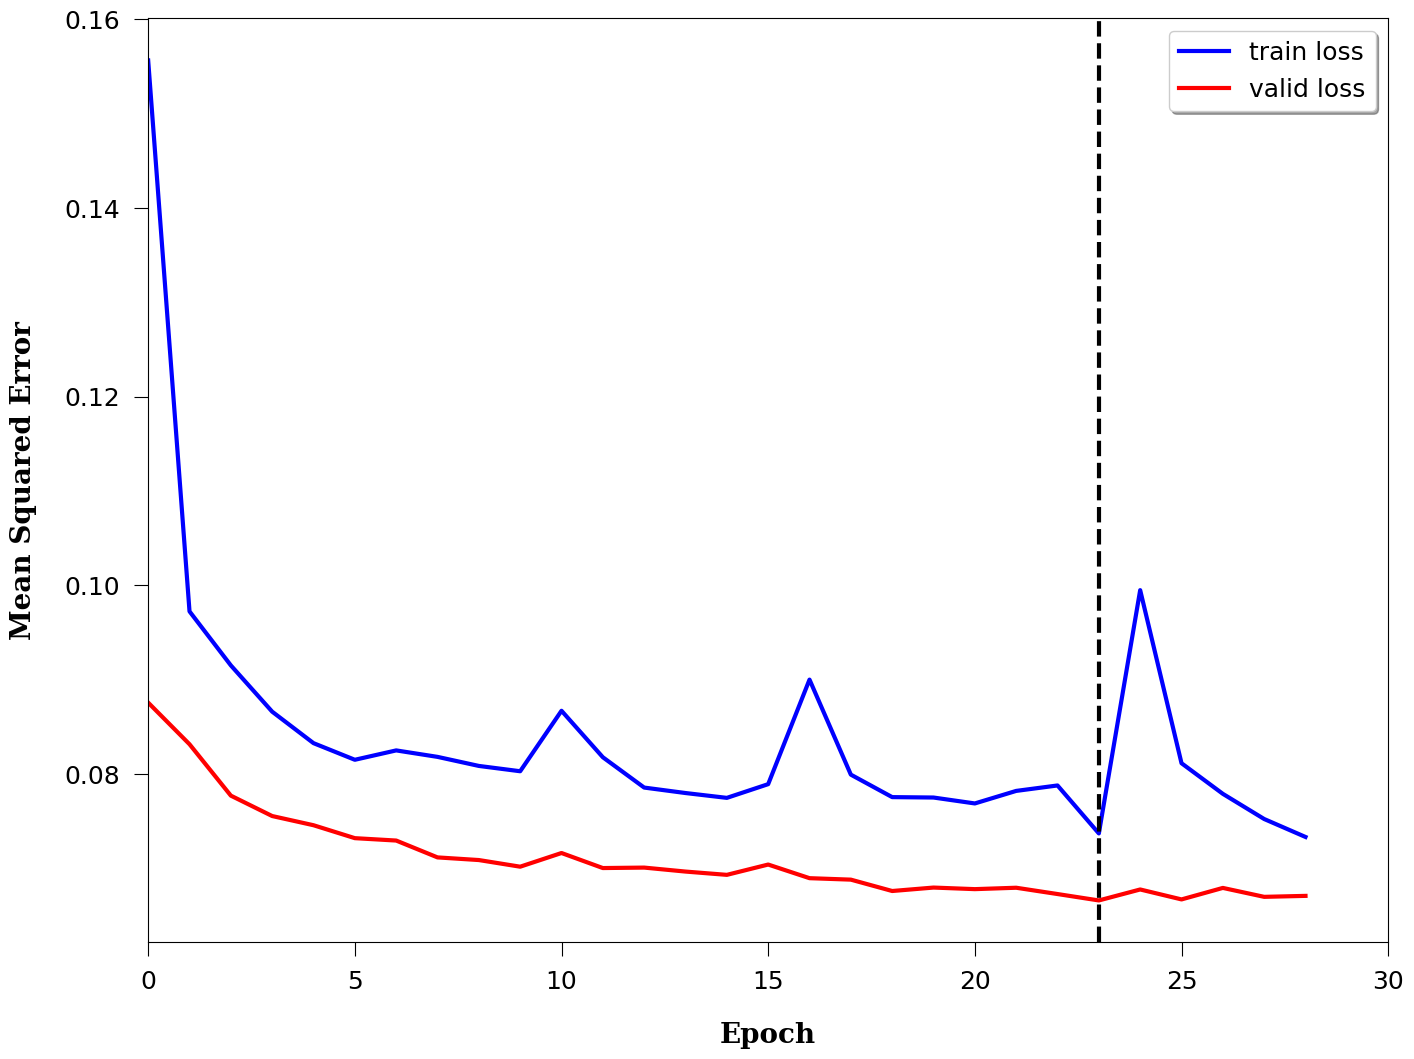

In [38]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16,12)

plt.plot(history.history['loss'],color = "blue", linewidth = 3, linestyle = 'solid', label='train loss')
plt.plot(history.history['val_loss'], color = "red", linewidth = 3, linestyle = 'solid', label='valid loss')
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)

plt.xlabel('Epoch', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Mean Squared Error', fontsize = 20, labelpad = 20, fontdict={'family': 'serif', 'weight': 'bold'})
plt.xlim(0,30)
plt.axvline(23, 0, 1, color='black', linestyle='--', linewidth=3)
# plt.xticks([1,5,10,15,20,25,30])

plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5) #edgecolor = 'green',
plt.show()

---
- 위의 합쳐진 데이터 스케일링 필요
- 그 후에 아래 코드 실행해서 검증 결과 확인
- 고장 데이터 안 합치고 결과를 정밀도 재현율 그래프를 한번 확인이 필요
- 만약 일반적인 결과가 나온다면, 정상상태만 학습해놔서, 고장상태가 갑자기 들어오니 값이 튀는걸로 예상됨.

- 또, 고장 데이터를 순서대로 나누는게 아니고, 이것도 반반으로 랜덤하게 나누기 해보자

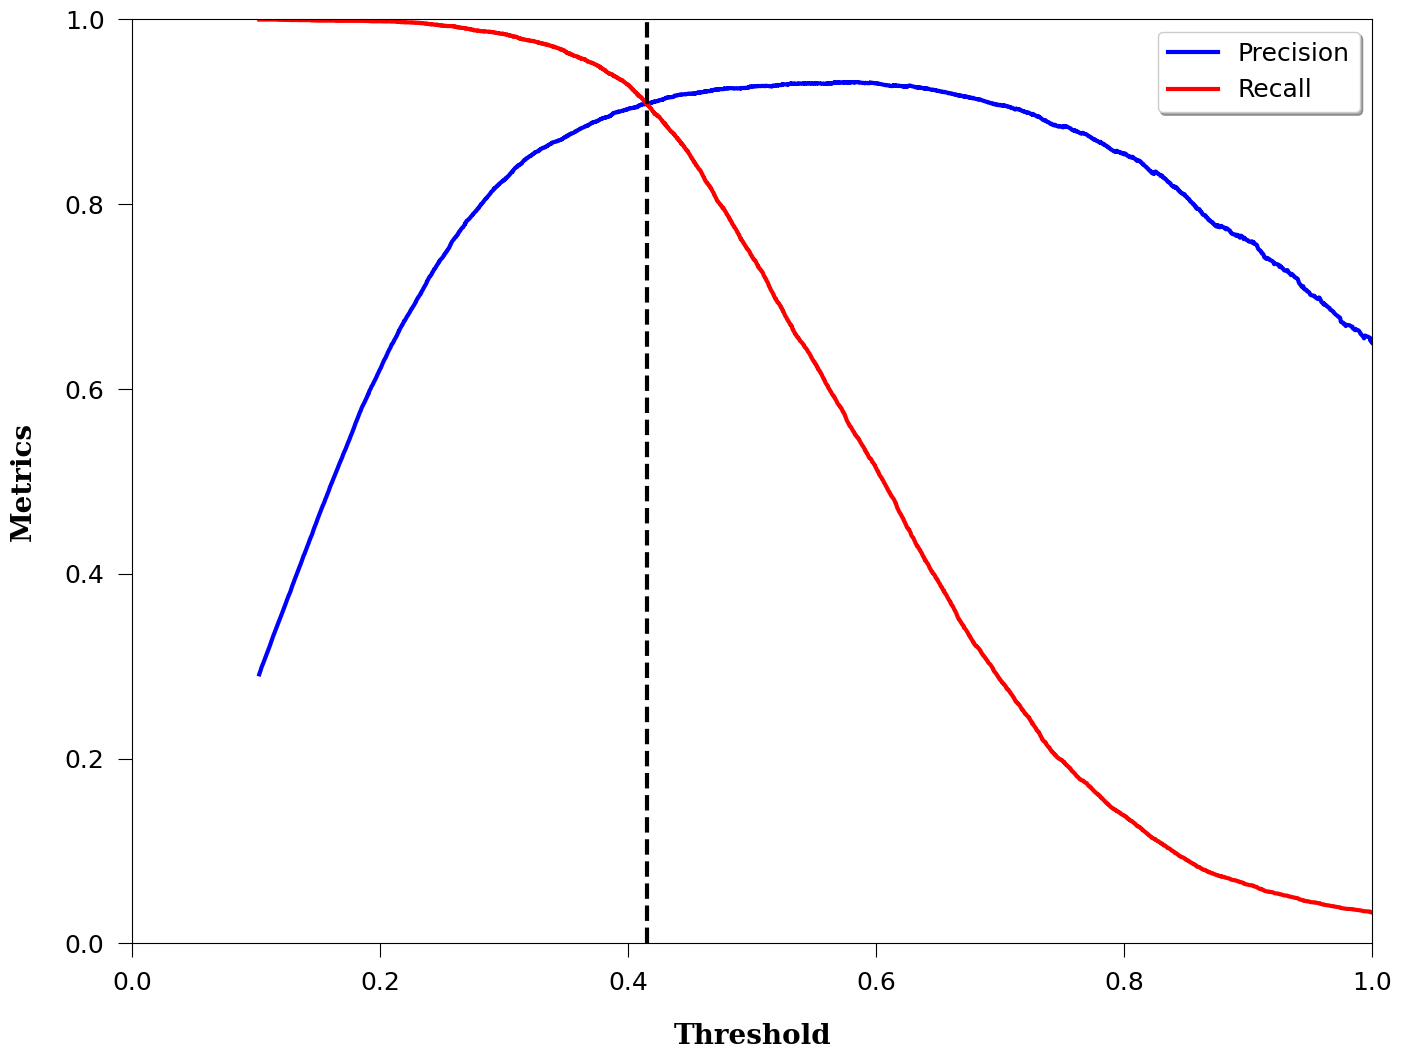

In [46]:
from sklearn import metrics

valid_x_predictions = lstm_ae.predict(x_valid_scaled)
mse = np.mean(np.power(flatten(x_valid_scaled) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 
                         'True_class':list(y_valid)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

plt.figure(figsize=(16,12))
plt.plot(threshold_rt, precision_rt[1:],color = "blue", linewidth = 3, linestyle = 'solid', label='Precision')
plt.plot(threshold_rt, recall_rt[1:],color = "red", linewidth = 3, linestyle = 'solid',label='Recall')
plt.xlabel('Threshold', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Metrics', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
plt.axvline(0.41508550970007557, 0, 1, color='black', linestyle='--', linewidth=3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
plt.show()

In [15]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.9087820835430297 , recall:  0.9087820835430297
threshold:  0.41508550970007557


<Figure size 1600x1200 with 0 Axes>

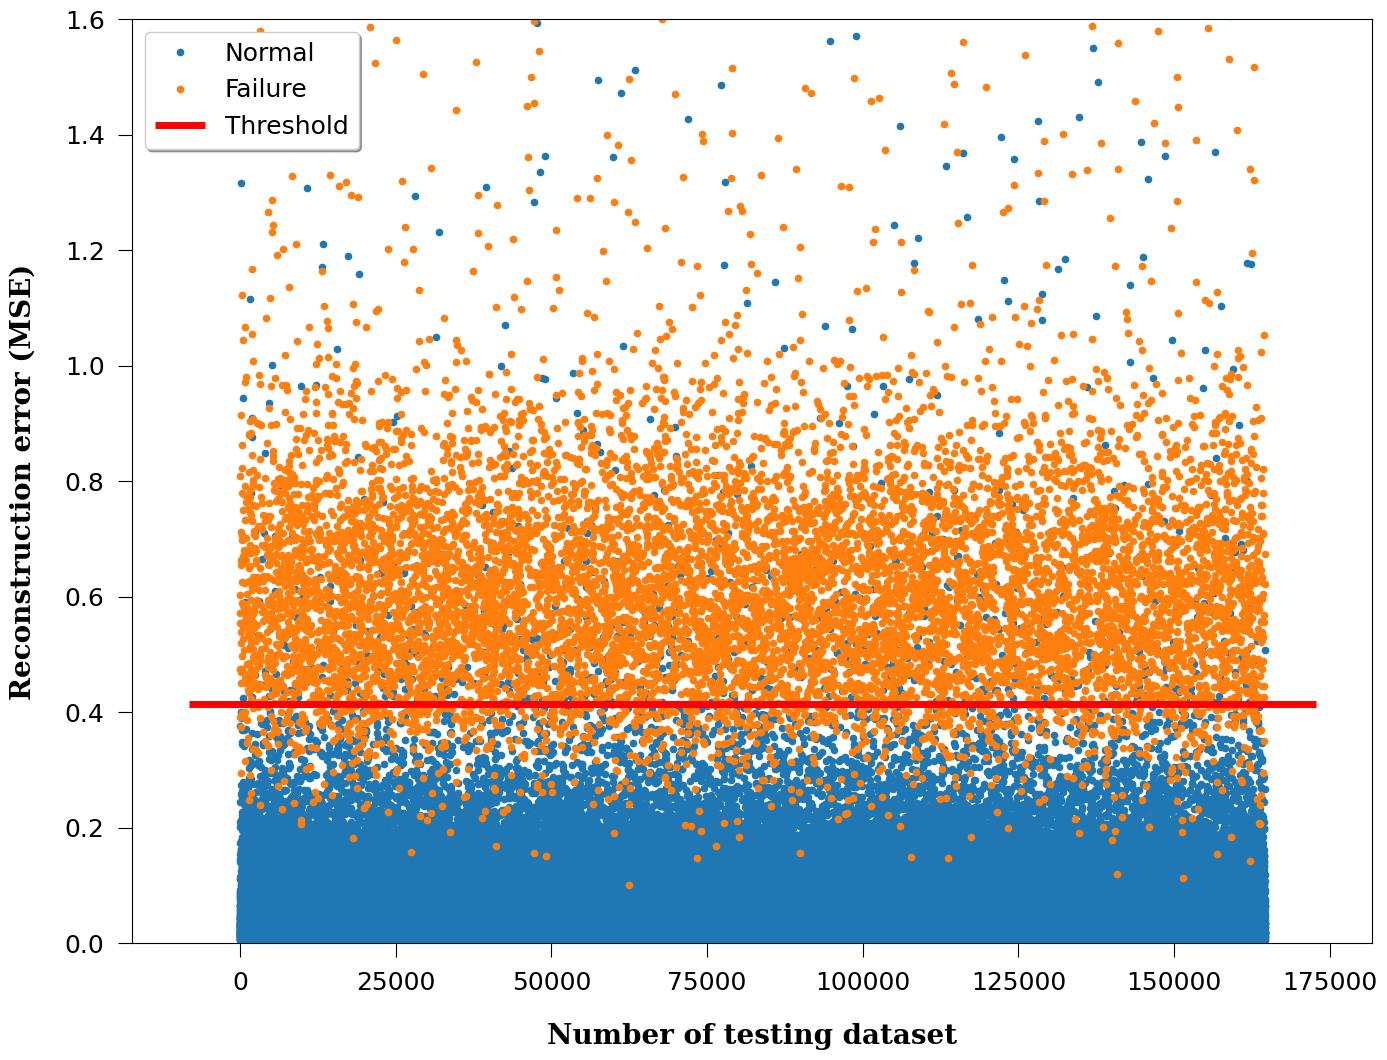

In [65]:
test_x_predictions = lstm_ae.predict(x_test_scaled)
mse = np.mean(np.power(flatten(x_test_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test.tolist()})

groups = error_df.groupby('True_class')
plt.figure(figsize=(16,12))

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=4.5, linestyle='',
            label = "Failure" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", linewidth = 5, zorder=100, label='Threshold')
ax.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
ax.set_ylabel("Reconstruction error (MSE)", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
ax.set_xlabel("Number of testing dataset", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
ax.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
ax.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
ax.set_ylim([0,1.6])
# plt.title("Reconstruction error for different classes")


# plt.ylabel("Reconstruction error", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
# plt.xlabel("Data point index", fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})

# plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
# plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)

# plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)

plt.show();

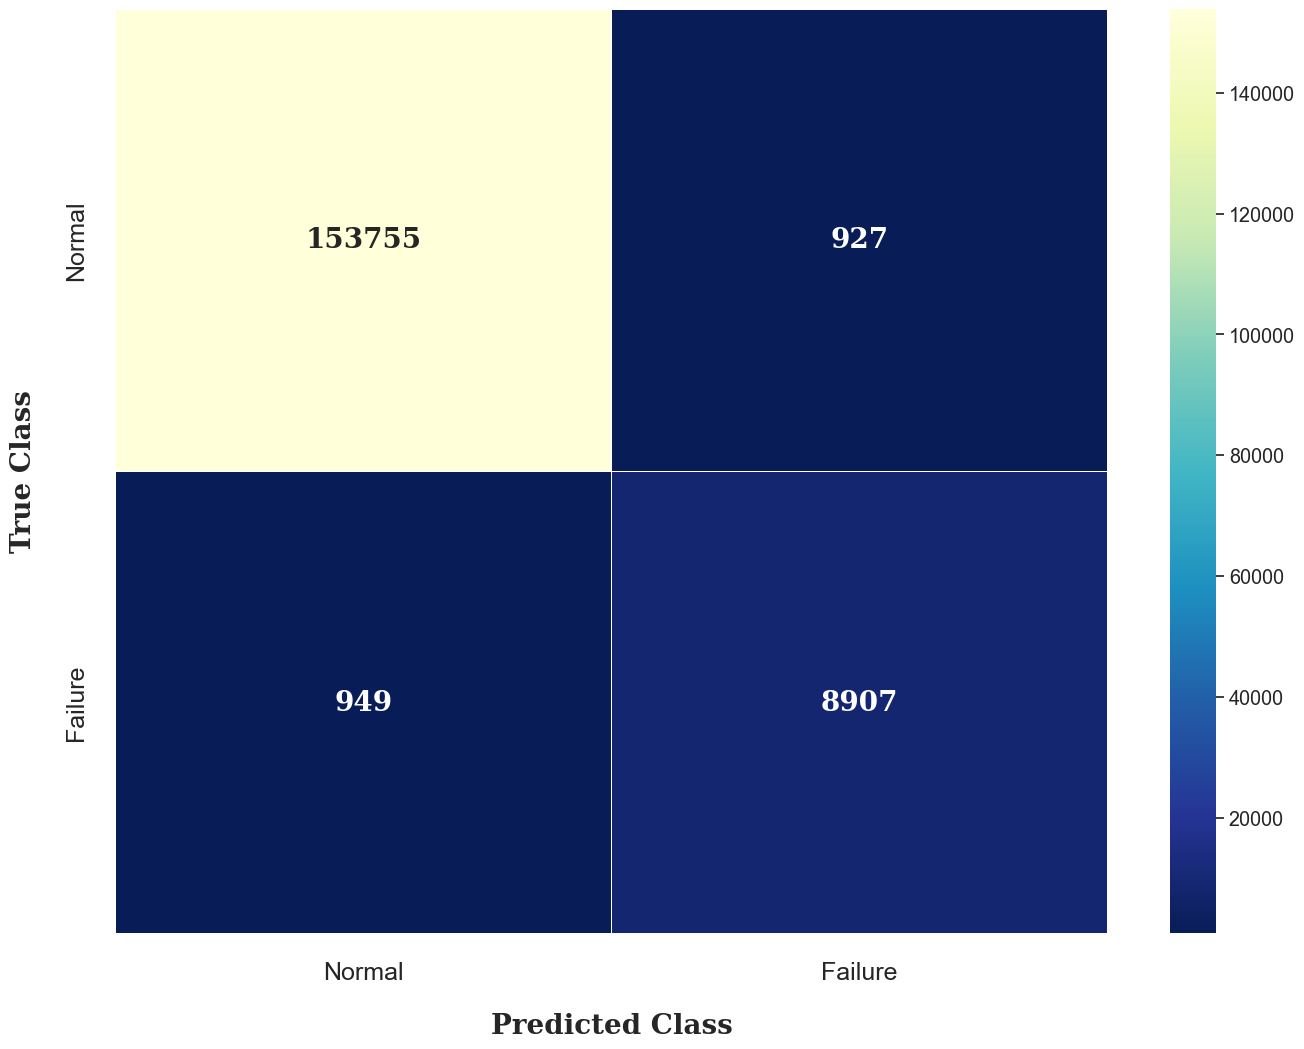

In [106]:
import seaborn as sns

# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(16, 12))
# sns. set(font_scale=1.3)
sns.heatmap(conf_matrix, cmap = 'YlGnBu_r', linewidths = 0.5, 
            xticklabels=labels, yticklabels=labels, annot=True, fmt='d', 
            annot_kws={'family': 'serif', "size": 20, 'weight': 'bold'}, cbar_kws={'shrink': 1})
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Class', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('True Class', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
# cbar = plt.collections[0].colorbar
# cbar.plt.tick_params(labelsize = 20)
plt.show()

# plt.xlabel('Threshold', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
# plt.ylabel('Metrics', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})


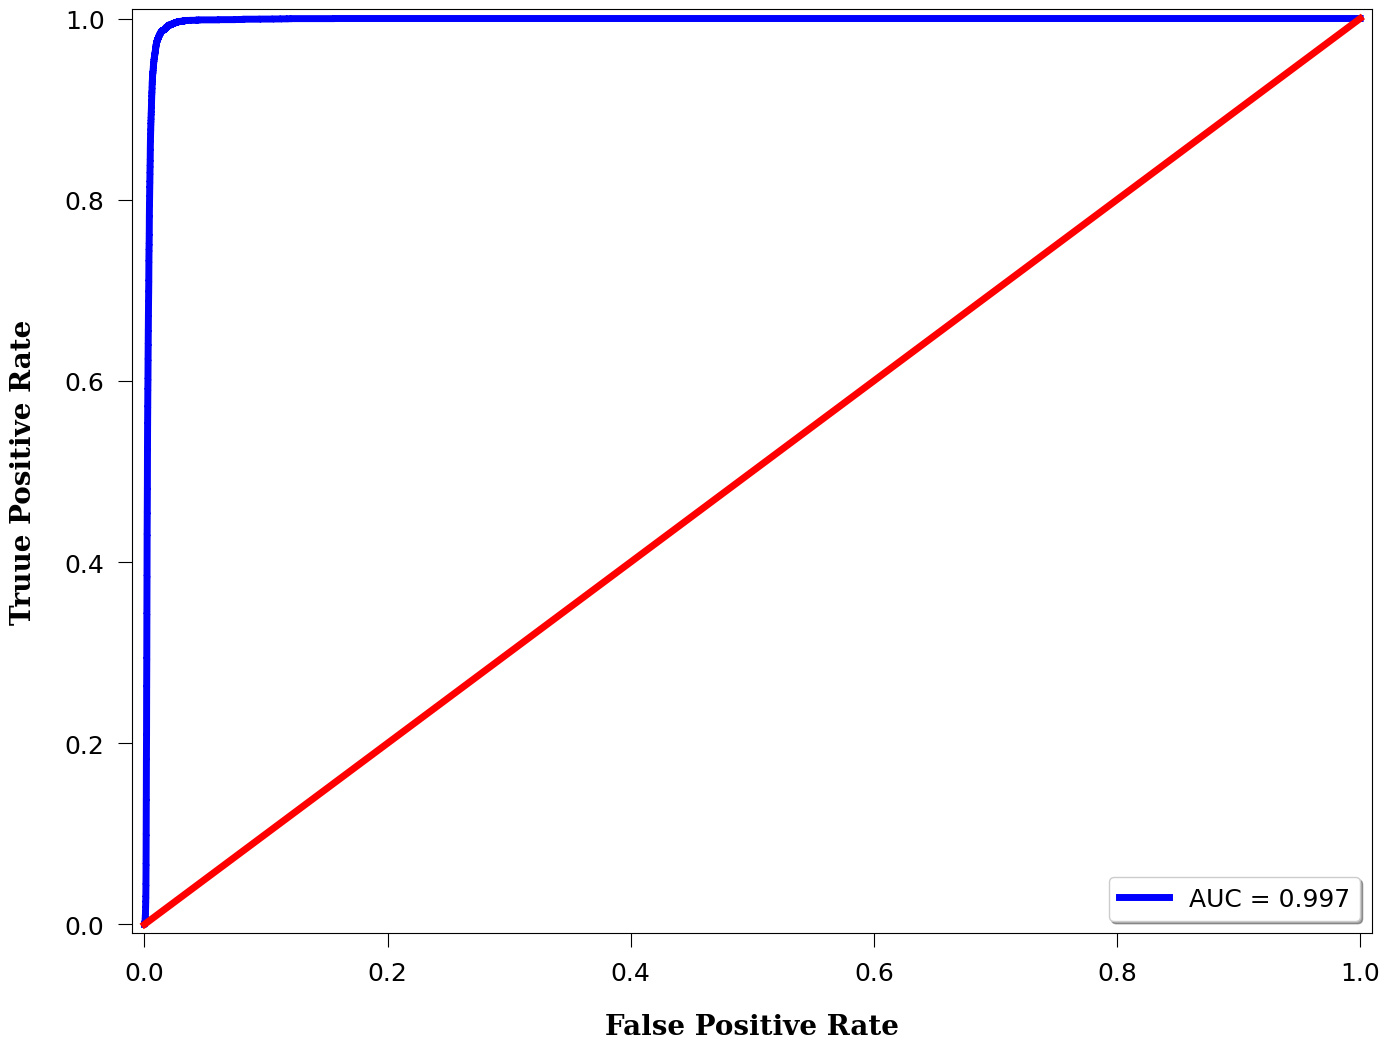

In [53]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.figure(figsize=(16,12))
plt.plot(false_pos_rate, true_pos_rate, color = 'blue', linewidth=5, linestyle = 'solid', label='AUC = %0.3f'% roc_auc)

plt.plot([0,1],[0,1], linewidth=5, color = 'red', linestyle = 'solid')

plt.xlabel('False Positive Rate', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.ylabel('Truue Positive Rate', fontsize = 20, labelpad = 20,  fontdict={'family': 'serif', 'weight': 'bold'})
plt.tick_params(axis = 'x', labelsize = 18, pad = 10, length = 10)
plt.tick_params(axis = 'y', labelsize = 18, pad = 10, length = 10)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.legend(loc='best', ncol=1, fontsize=18, frameon=True, shadow=True, labelspacing = .5)
# plt.title('Receiver operating characteristic curve (ROC)')
# plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()



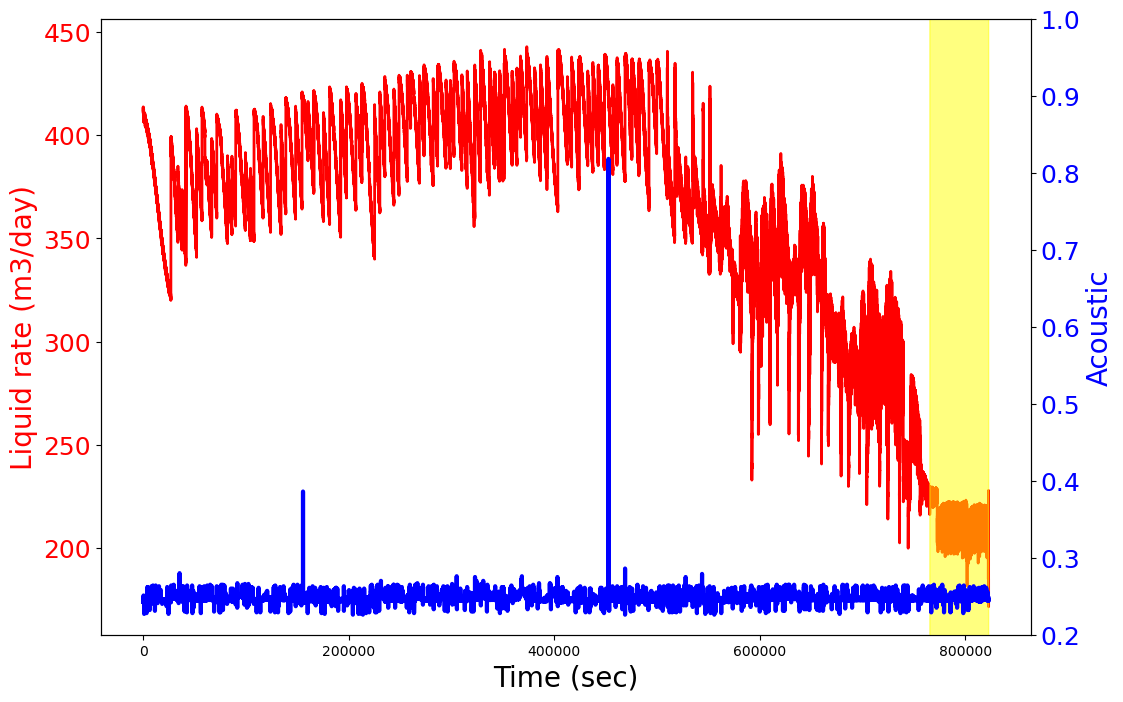

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Time']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q,m3d']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 2)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_xlabel('Time (sec)', fontsize = 20)
ax1.set_ylabel('Liquid rate (m3/day)', fontsize = 20, color = 'red')

#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Acoustic']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Acoustic', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
ax2.set_ylim([0.2, 1.0])

# y3 = sand_data['Motor temp']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green', linewidth = 3)
# ax3.set_ylabel('Motor Temp (C)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])

plt.fill_between(x[765512:], y[765512:], color = 'yellow',alpha = .5)

plt.show()




In [6]:
print(sand_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822692 entries, 0 to 822691
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          822692 non-null  int64  
 1   y             822692 non-null  int64  
 2   Q_liq, BPD    822692 non-null  float64
 3   P_in, psi     822692 non-null  float64
 4   P_out, psi    822692 non-null  float64
 5   Horizon DP    822692 non-null  float64
 6   Vertical DP   822692 non-null  float64
 7   Acoustic      822692 non-null  float64
 8   Motor temp    822692 non-null  float64
 9   Vib,motor     822692 non-null  float64
 10  Vib, out      822692 non-null  float64
 11  Vib, middle   822692 non-null  float64
 12  Winding_temp  822692 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 81.6 MB
None


In [15]:
print('유량 최대값 ->', sand_data['Q_liq, BPD'].max())
print('유량 최소값 ->',sand_data['Q_liq, BPD'].min())
print('유량 평균값 ->',sand_data['Q_liq, BPD'].mean())
print('유량 표준편차값 ->',sand_data['Q_liq, BPD'].std())

유량 최대값 -> 2787.103
유량 최대값 -> 1079.026
유량 최대값 -> 2271.665955714924
유량 최대값 -> 383.2634838341815


In [21]:
print(sand_data['Q_liq, BPD'].describe(percentiles = [.05, .25, .50, .75, .95]))

count    822692.000000
mean       2271.665956
std         383.263484
min        1079.026000
5%         1373.552000
25%        2119.397500
50%        2386.077000
75%        2555.468500
95%        2700.870900
max        2787.103000
Name: Q_liq, BPD, dtype: float64


No handles with labels found to put in legend.


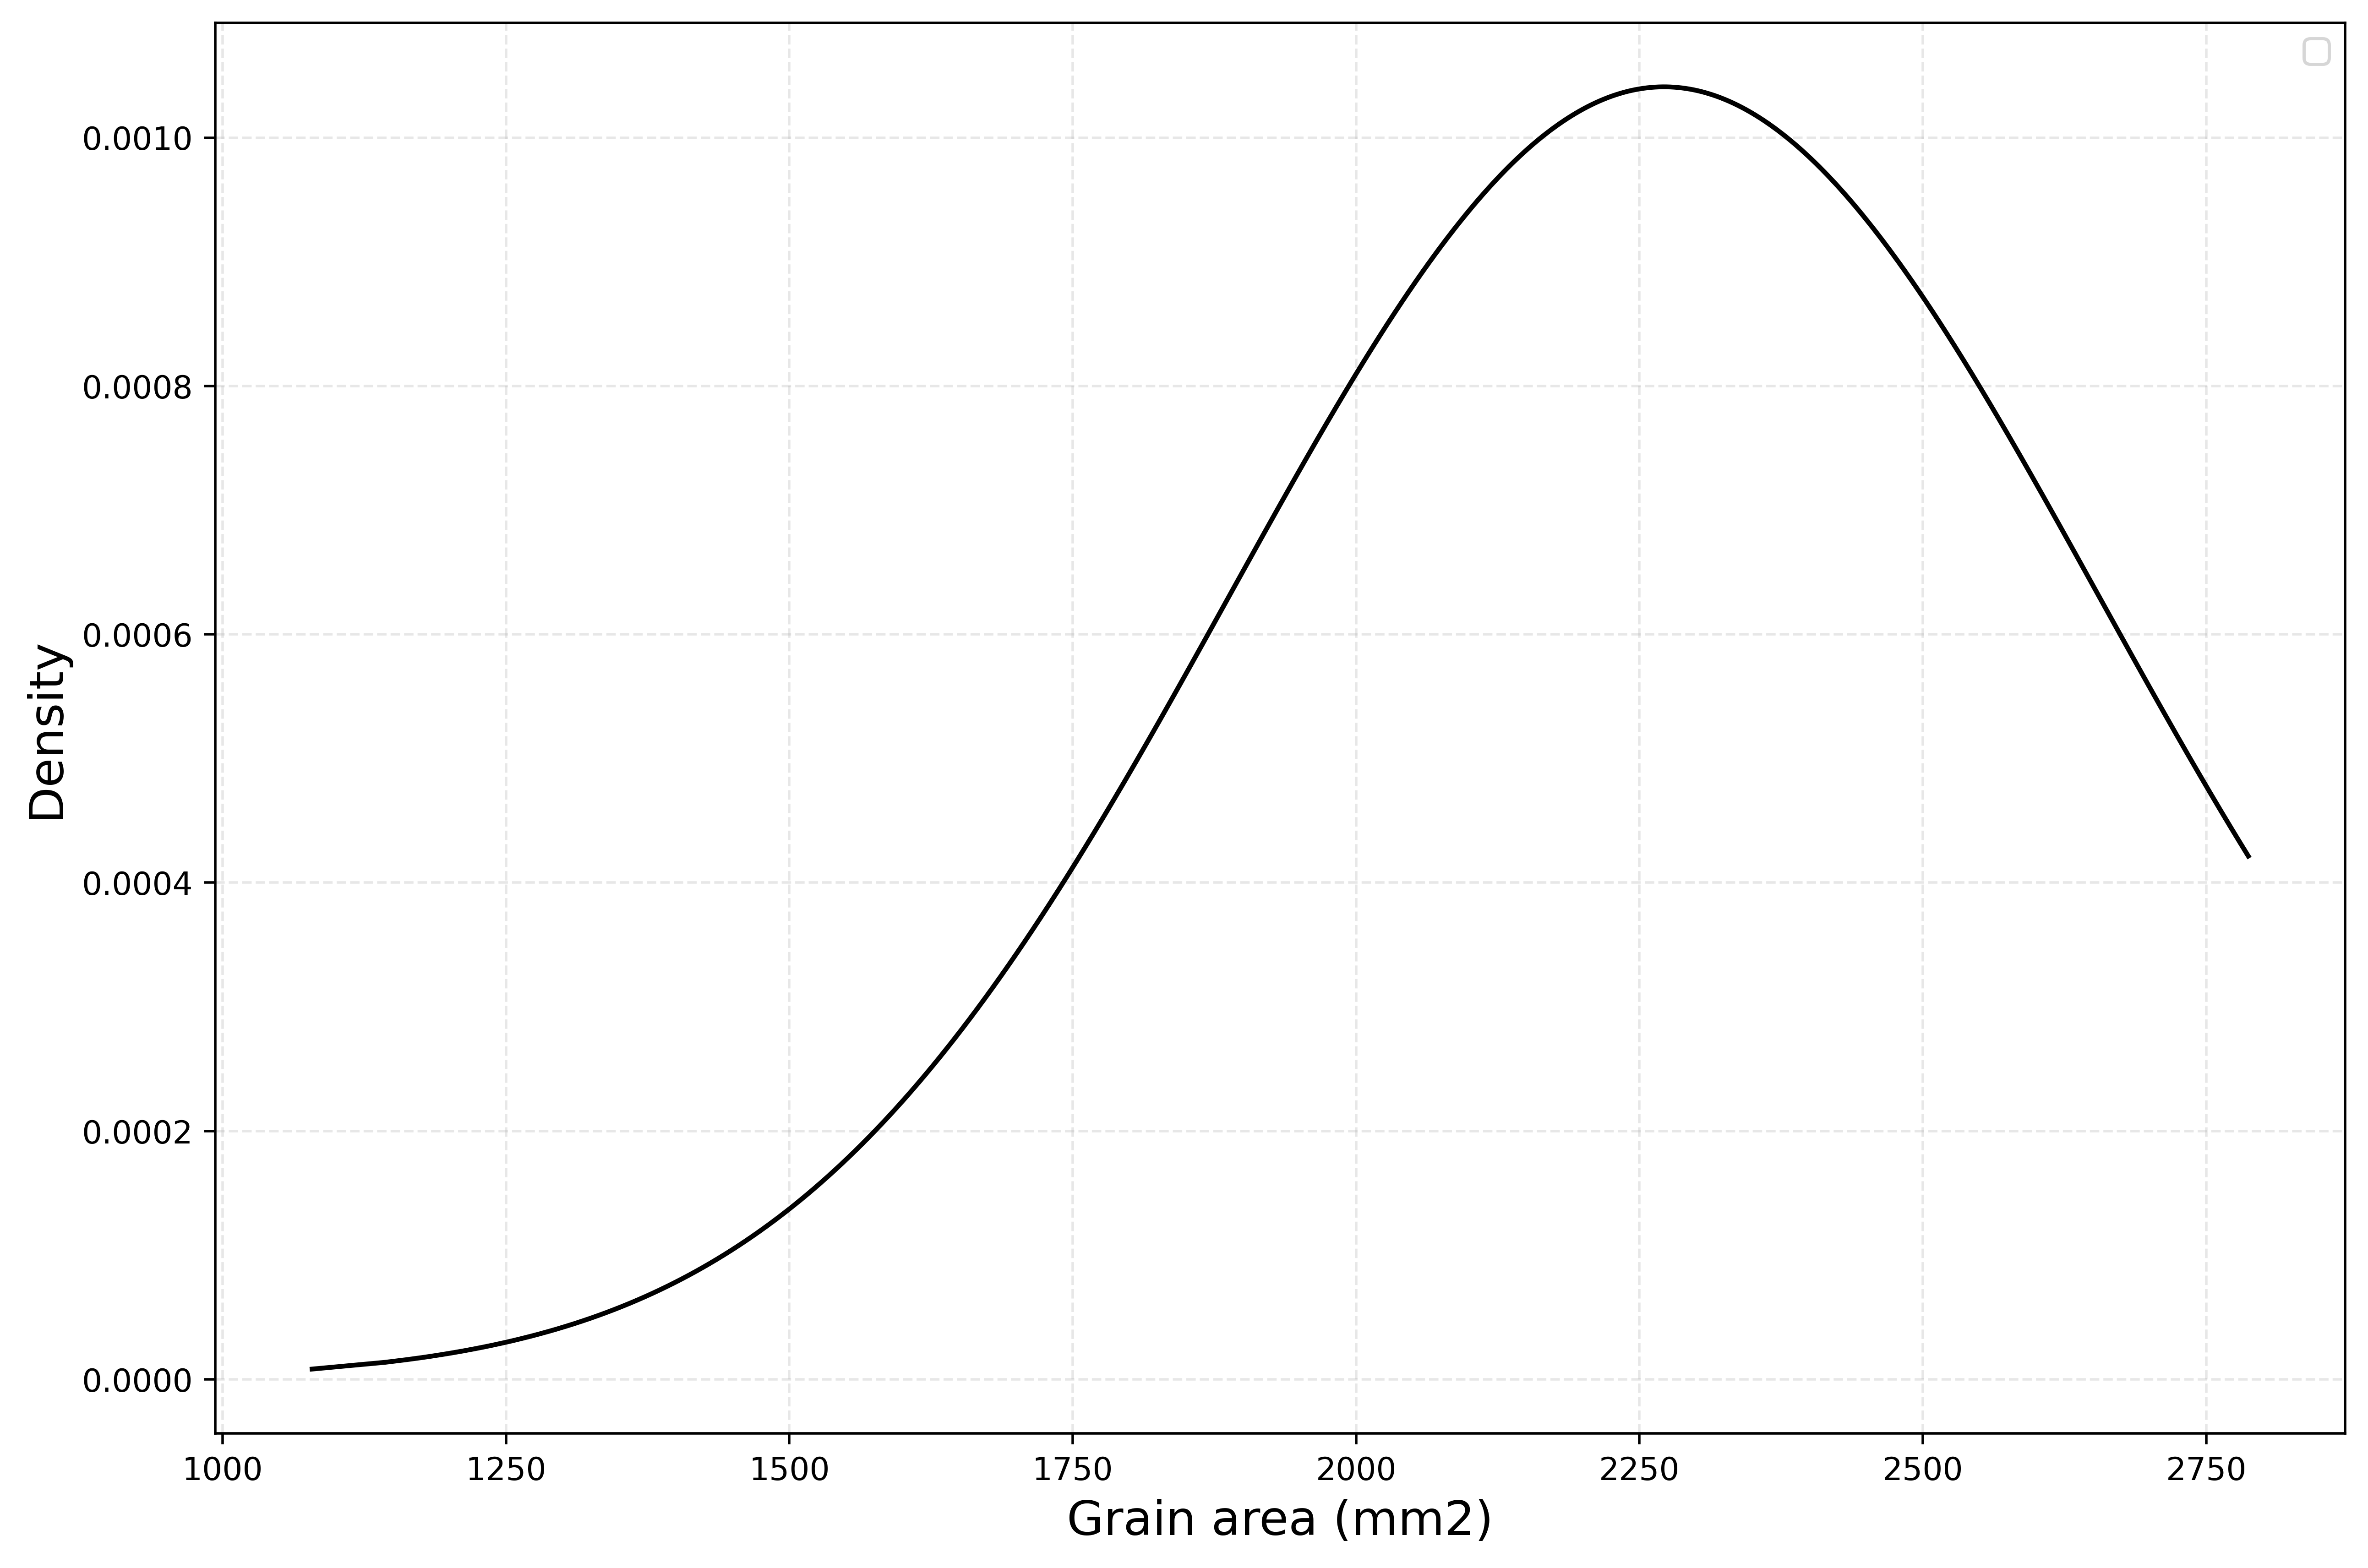

In [68]:
import scipy.stats as stats

liquid_rate_mean = np.mean(sand_data["Q_liq, BPD"])
liquid_rate_std = np.std(sand_data["Q_liq, BPD"])
cv1_pdf = stats.norm.pdf(sand_data["Q_liq, BPD"].sort_values(), liquid_rate_mean, liquid_rate_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["Q_liq, BPD"].sort_values(), cv1_pdf, color="Black")
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Grain area (mm2)", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

No handles with labels found to put in legend.


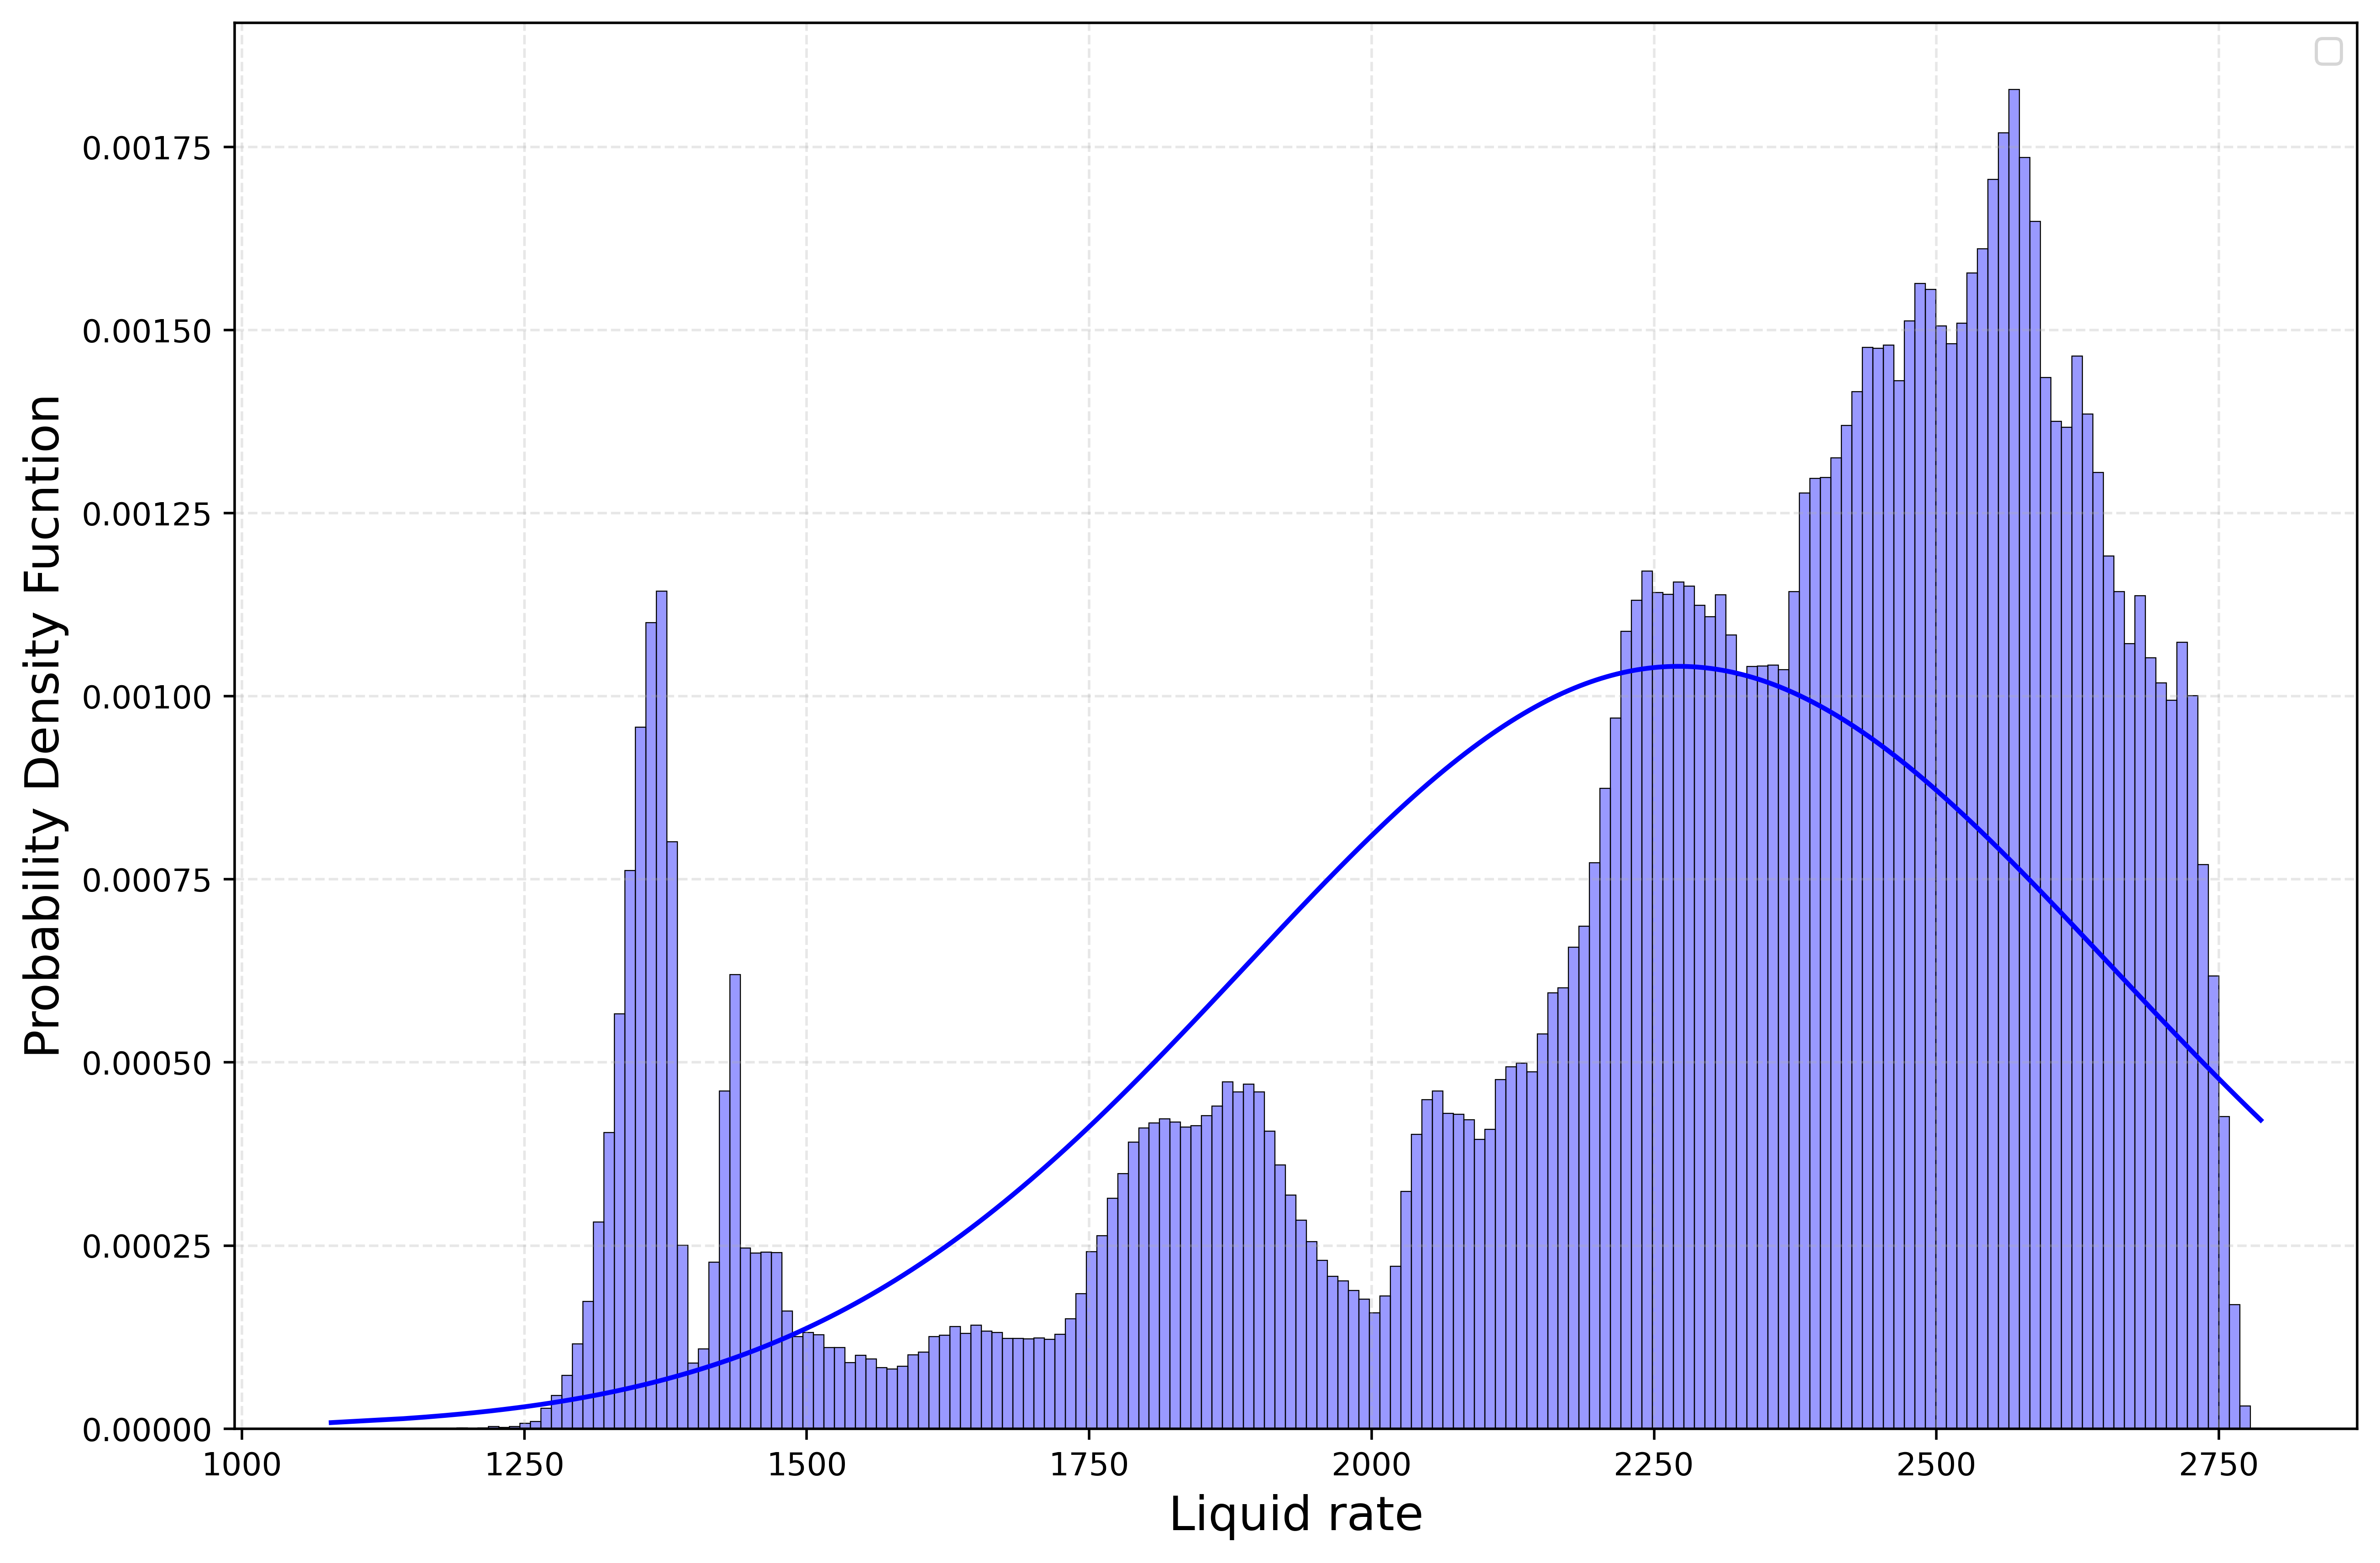

In [87]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

plt.plot(sand_data["Q_liq, BPD"].sort_values(), cv1_pdf, color="Blue")
# sns.histplot(data = sand_data["Q_liq, BPD"], color = "Blue", stat = "probability", alpha = .3)
sns.histplot(data = sand_data["Q_liq, BPD"], color = "Blue",  stat = "density", alpha = .4)
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Liquid rate", size=15)
plt.ylabel("Probability Density Fucntion", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

In [16]:
print('입력압 최대값 ->', sand_data['P_in, psi'].max())
print('입력압 최소값 ->', sand_data['P_in, psi'].min())
print('입력압 평균값 ->', sand_data['P_in, psi'].mean())
print('입력압 표준편차값 ->', sand_data['P_in, psi'].std())


입력압 최대값 -> 1.37
입력압 최소값 -> -6.02
입력압 평균값 -> -4.339224598027249
입력압 표준편차값 -> 1.9145964339979333


In [18]:
print(sand_data['P_in, psi'].describe(percentiles = [.05, .25, .50, .75, .95]))

count    822692.000000
mean         -4.339225
std           1.914596
min          -6.020000
5%           -6.003000
25%          -5.919000
50%          -5.117000
75%          -3.342000
95%          -0.018000
max           1.370000
Name: P_in, psi, dtype: float64


No handles with labels found to put in legend.


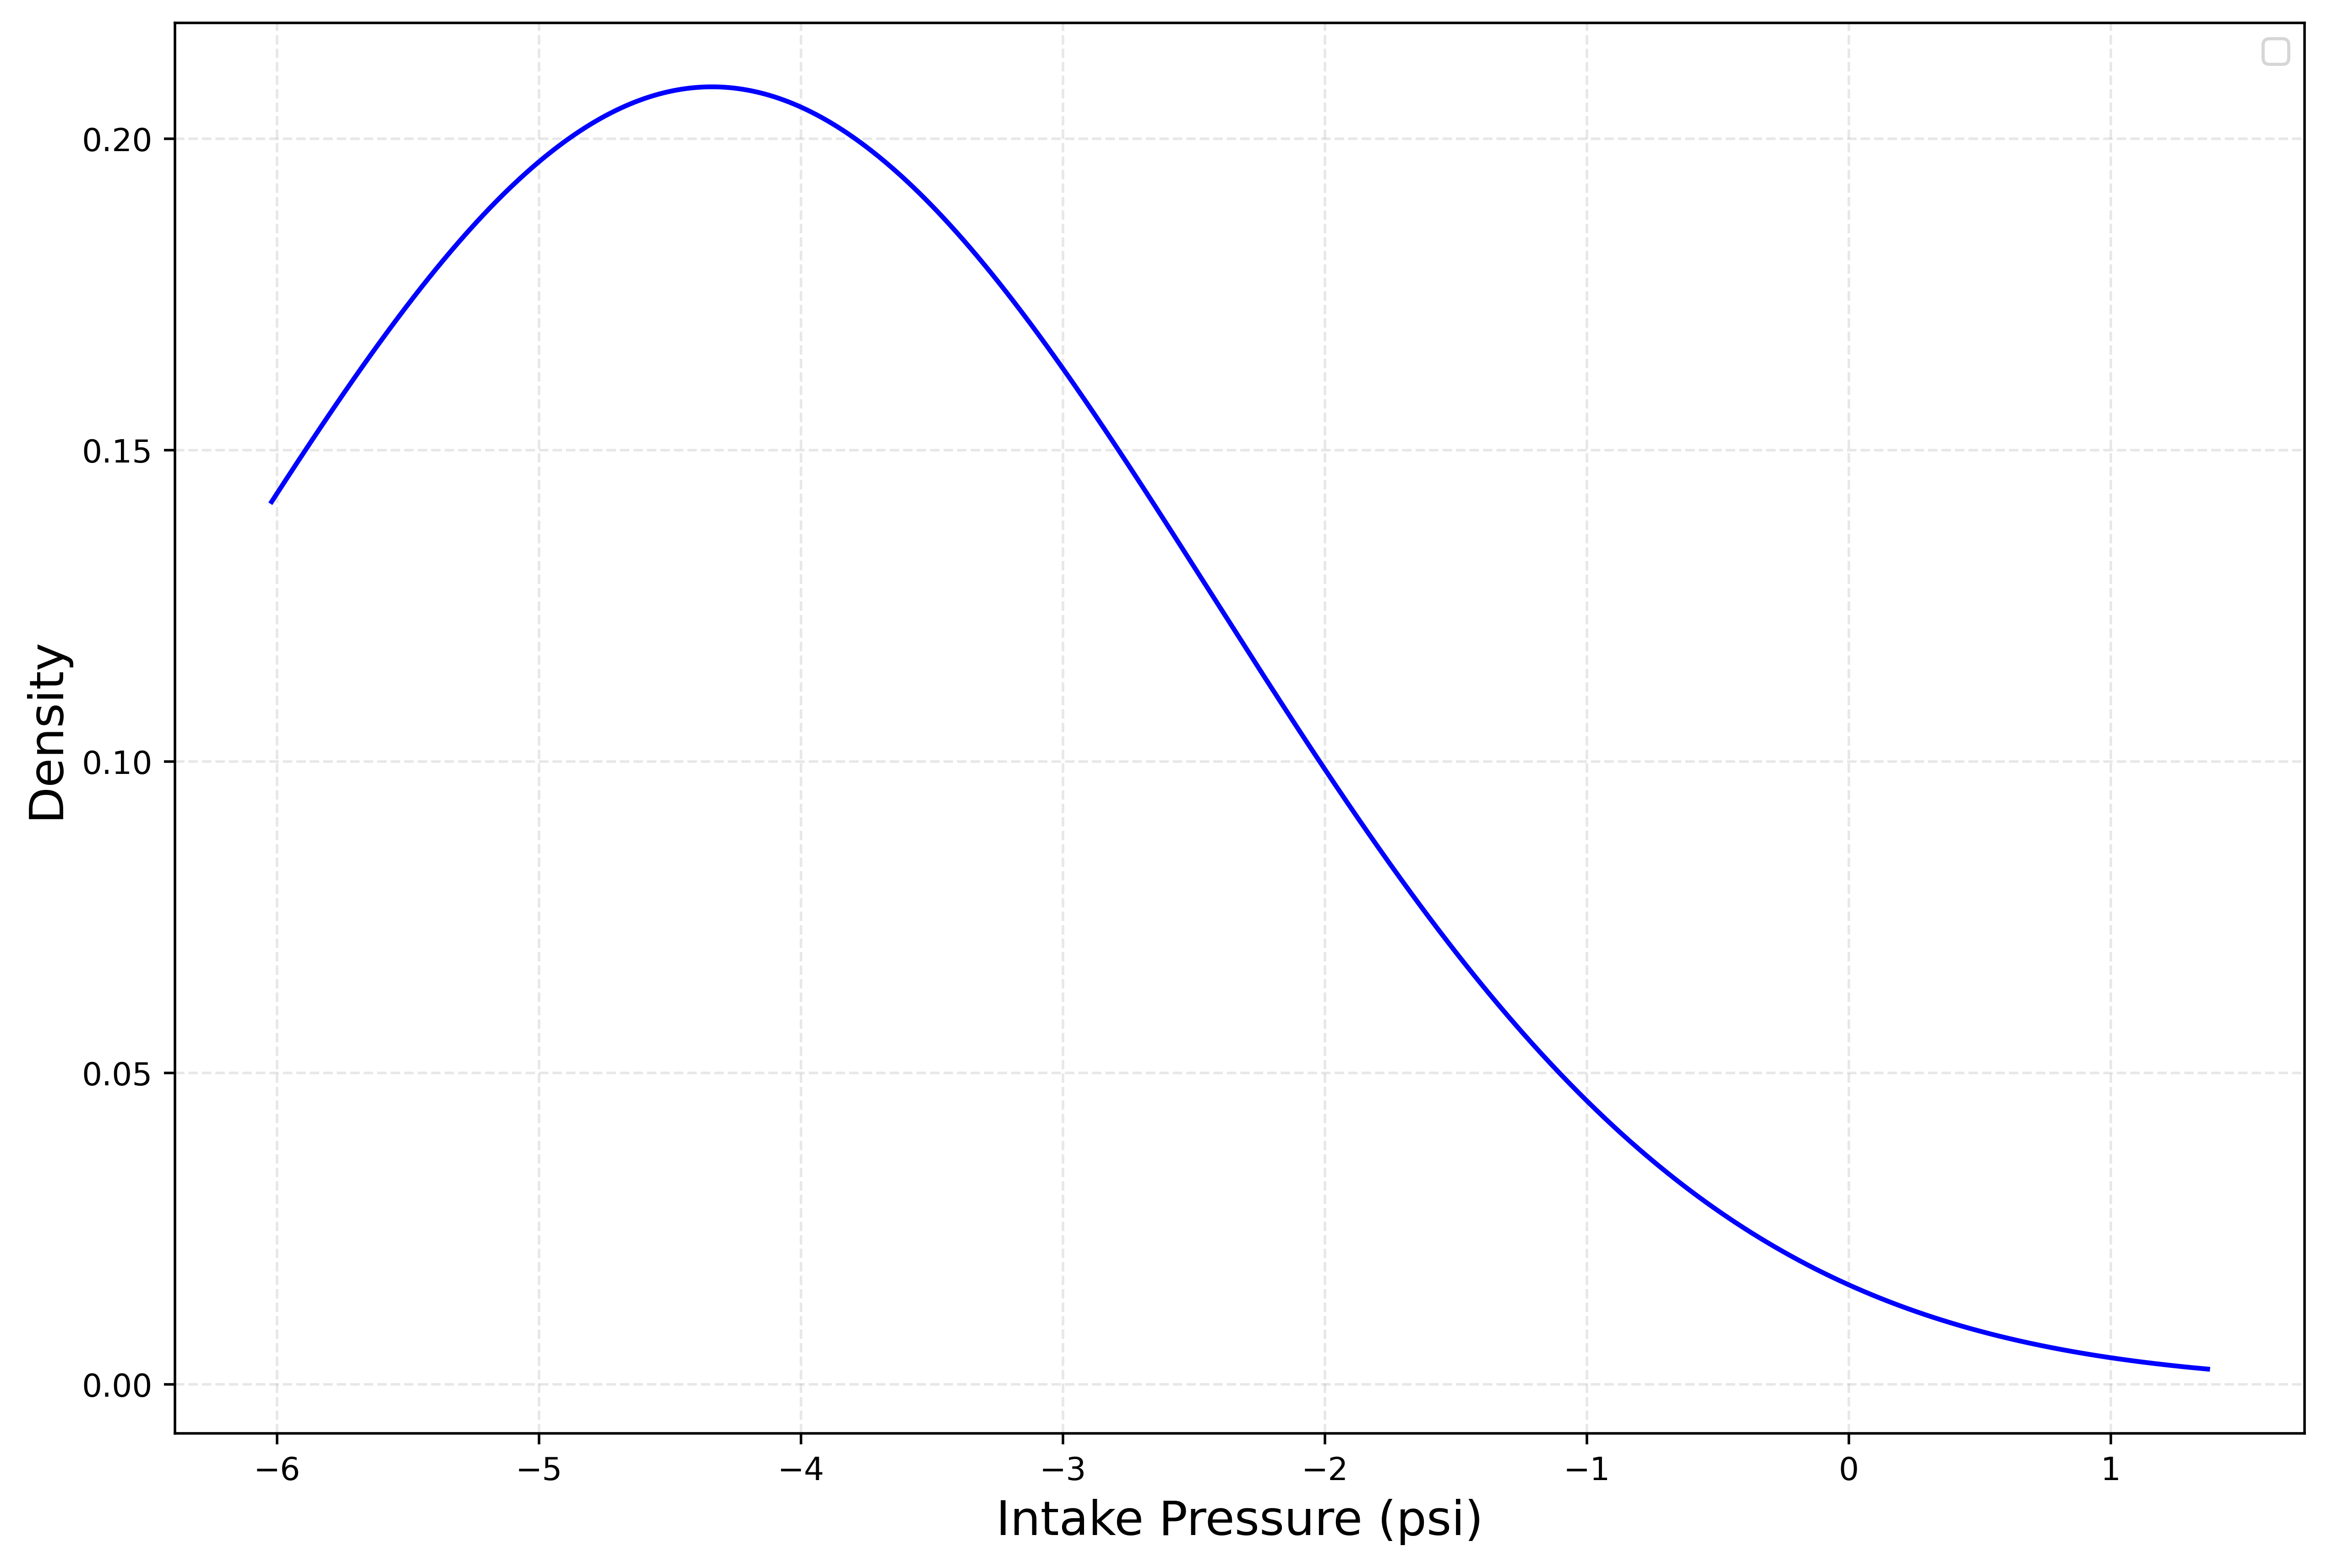

In [74]:
import scipy.stats as stats

P_in_mean = np.mean(sand_data["P_in, psi"])
P_in_std = np.std(sand_data["P_in, psi"])
cv2_pdf = stats.norm.pdf(sand_data["P_in, psi"].sort_values(), P_in_mean, P_in_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["P_in, psi"].sort_values(), cv2_pdf, color="Blue")
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Intake Pressure (psi)", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

No handles with labels found to put in legend.


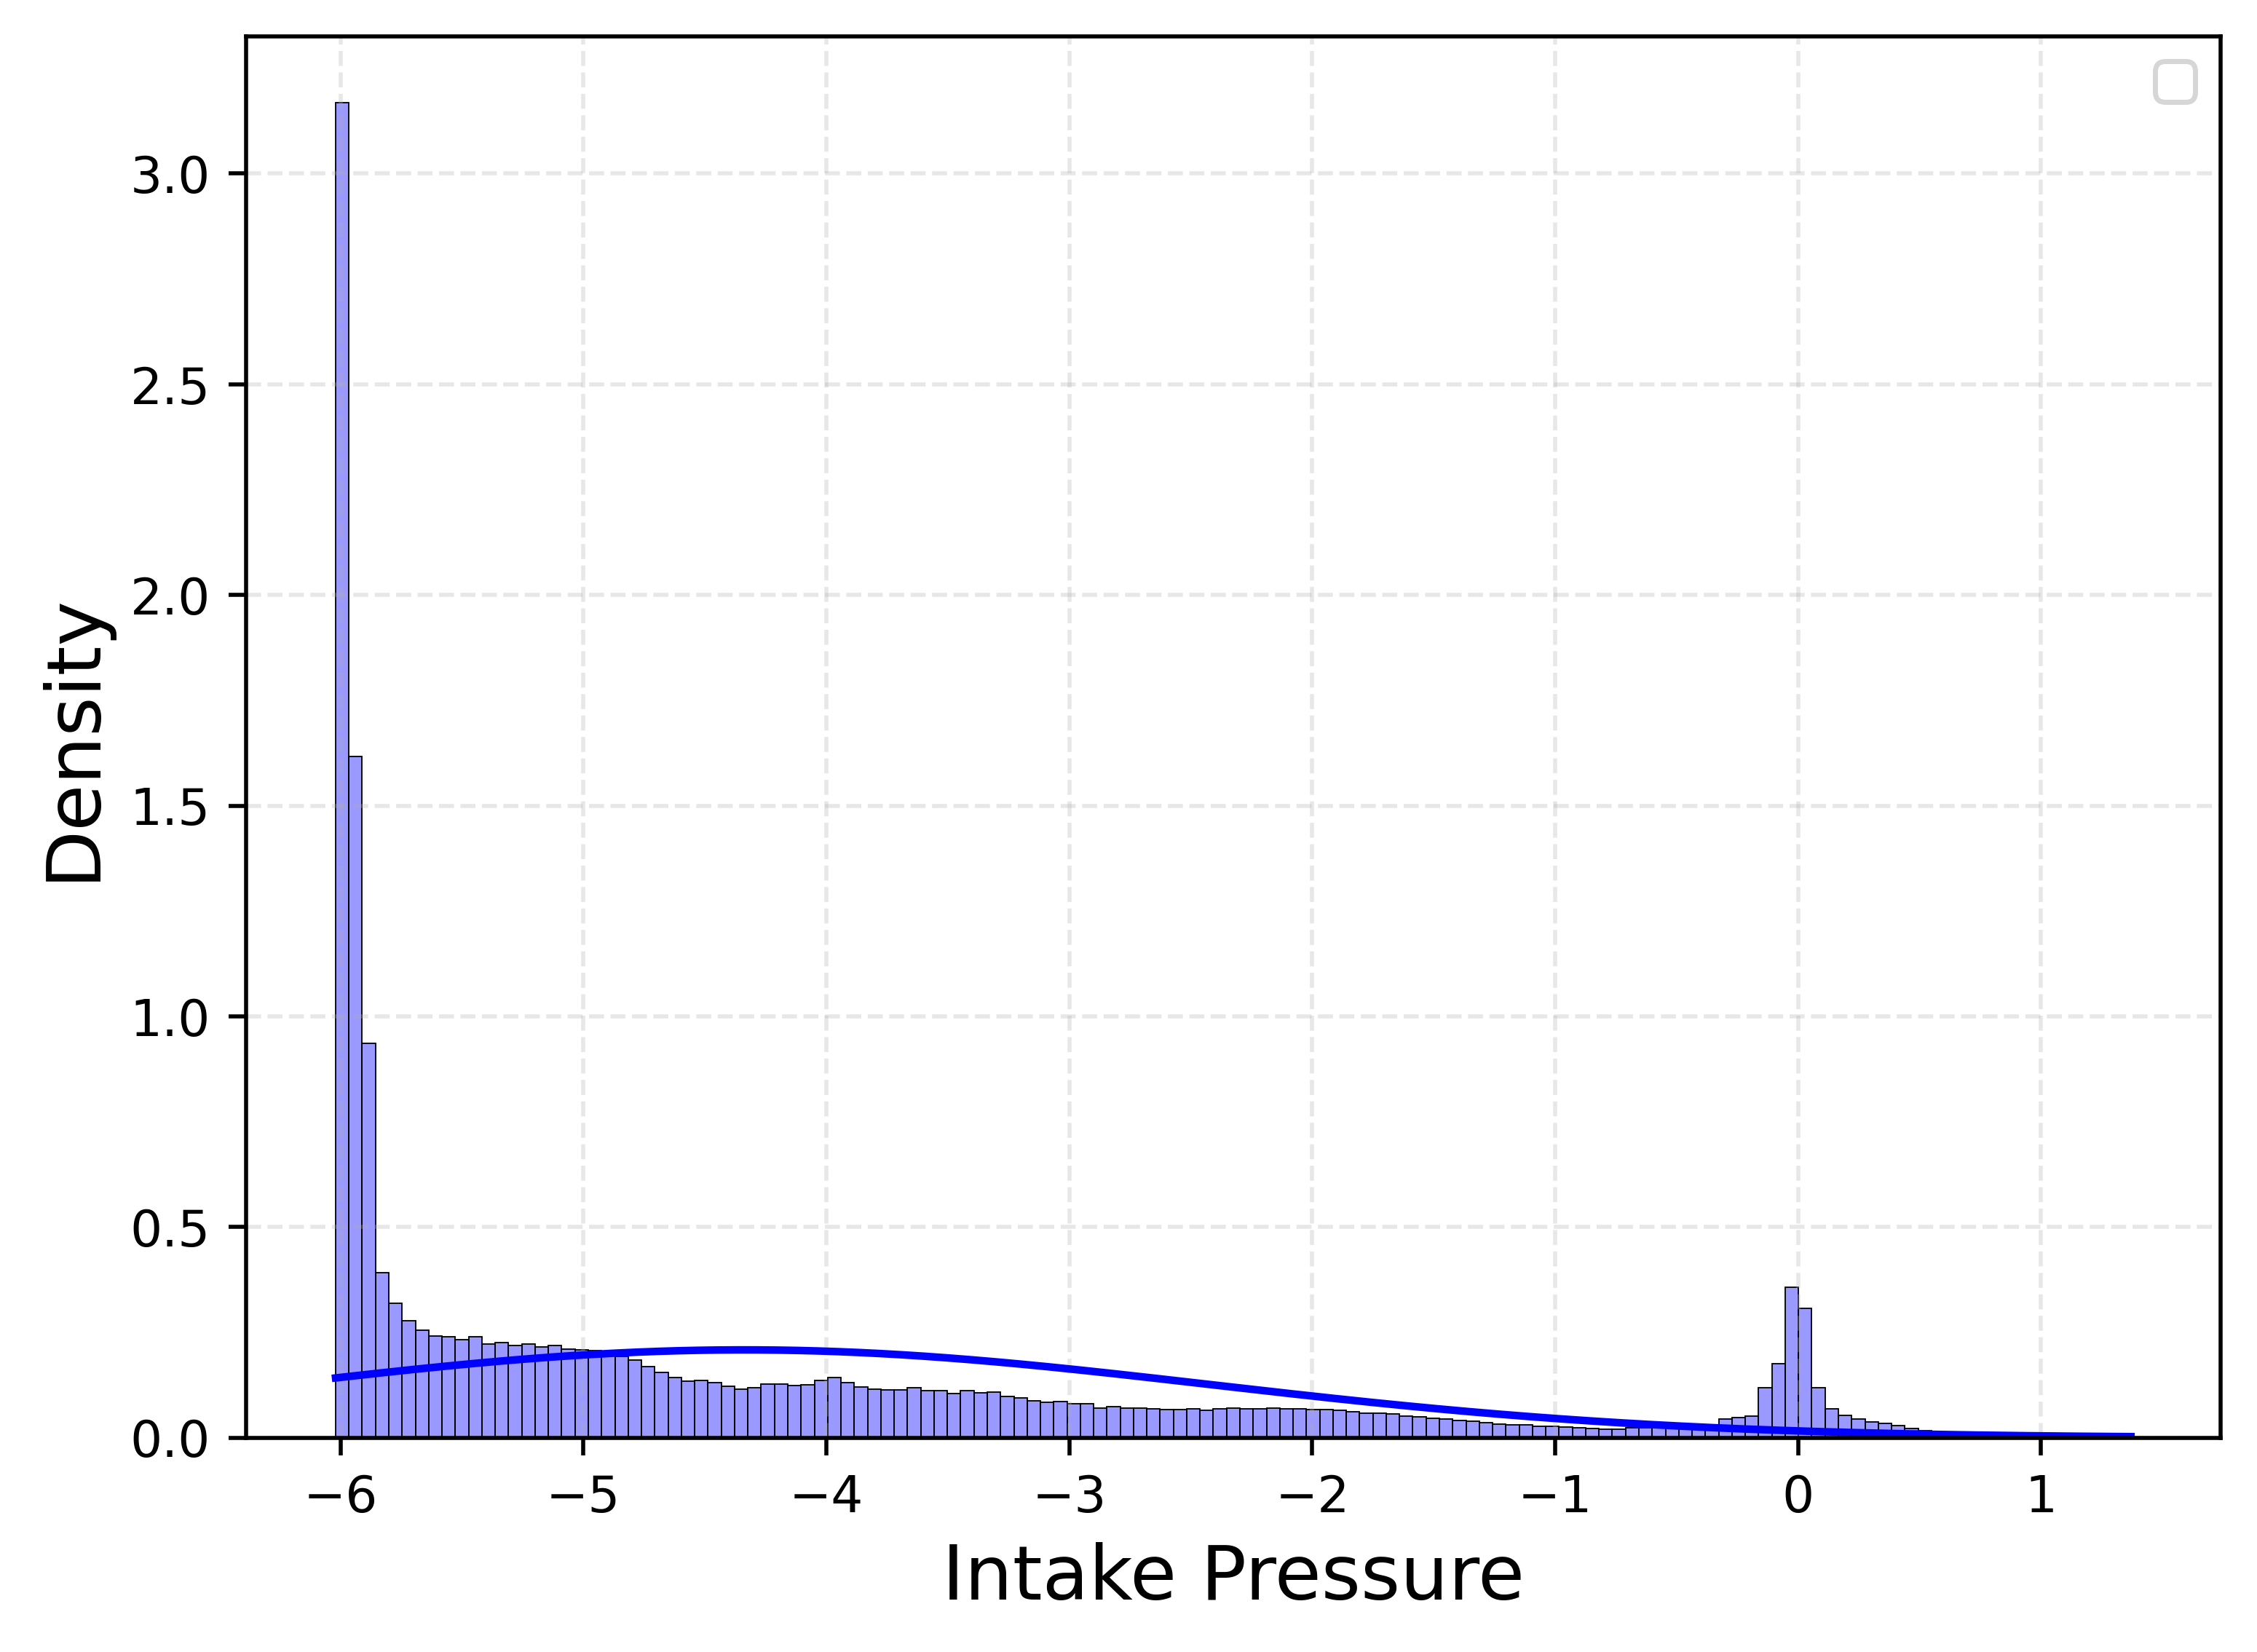

In [75]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

plt.plot(sand_data["P_in, psi"].sort_values(), cv2_pdf, color="Blue")
sns.histplot(data = sand_data["P_in, psi"], color = "Blue", stat = "density", alpha = .4)
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Intake Pressure", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

출력압 최대값 -> 27.24
출력압 최소값 -> 1.236
출력압 평균값 -> 13.396882118703303
출력압 표준편차값 -> 3.116209045004094
count    822692.000000
mean         13.396882
std           3.116209
min           1.236000
5%            6.215000
25%          12.158000
50%          13.807000
75%          15.547000
95%          17.509000
max          27.240000
Name: P_out, psi, dtype: float64


No handles with labels found to put in legend.


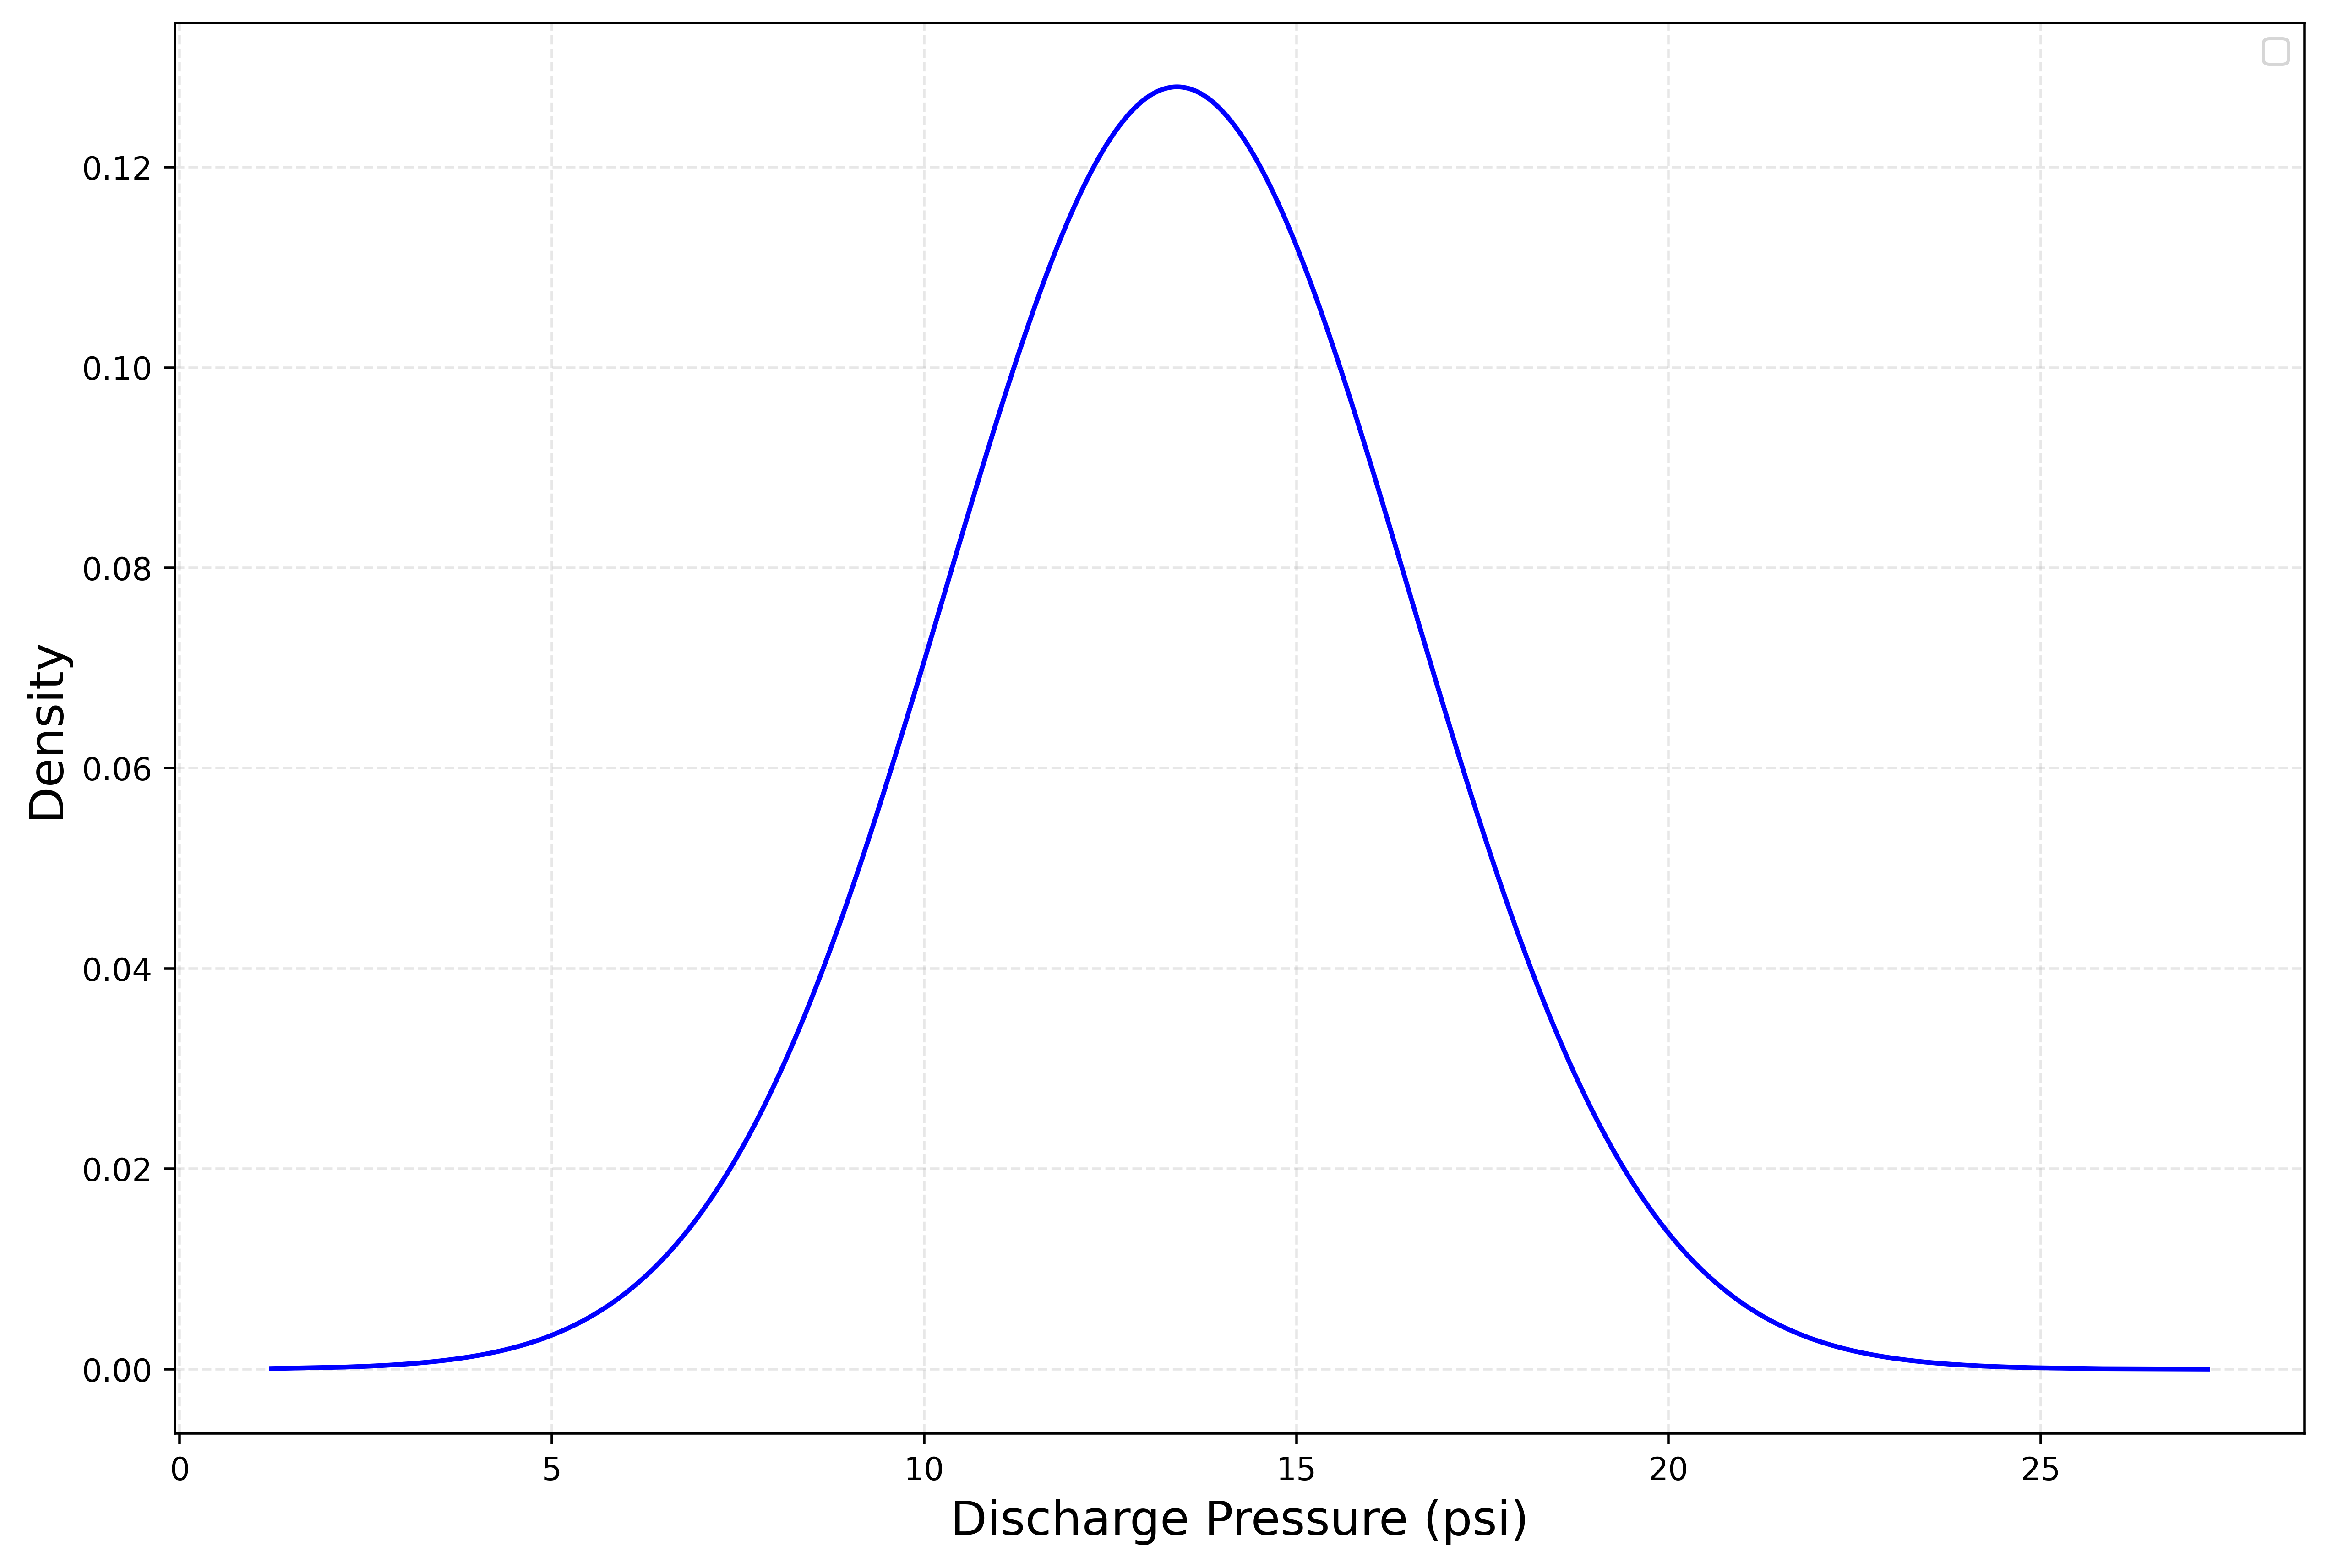

In [76]:
print('출력압 최대값 ->', sand_data['P_out, psi'].max())
print('출력압 최소값 ->', sand_data['P_out, psi'].min())
print('출력압 평균값 ->', sand_data['P_out, psi'].mean())
print('출력압 표준편차값 ->', sand_data['P_out, psi'].std())

print(sand_data['P_out, psi'].describe(percentiles = [.05, .25, .50, .75, .95]))

import scipy.stats as stats

P_out_mean = np.mean(sand_data["P_out, psi"])
P_out_std = np.std(sand_data["P_out, psi"])
cv3_pdf = stats.norm.pdf(sand_data["P_out, psi"].sort_values(), P_out_mean, P_out_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["P_out, psi"].sort_values(), cv3_pdf, color="Blue")
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Discharge Pressure (psi)", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

No handles with labels found to put in legend.


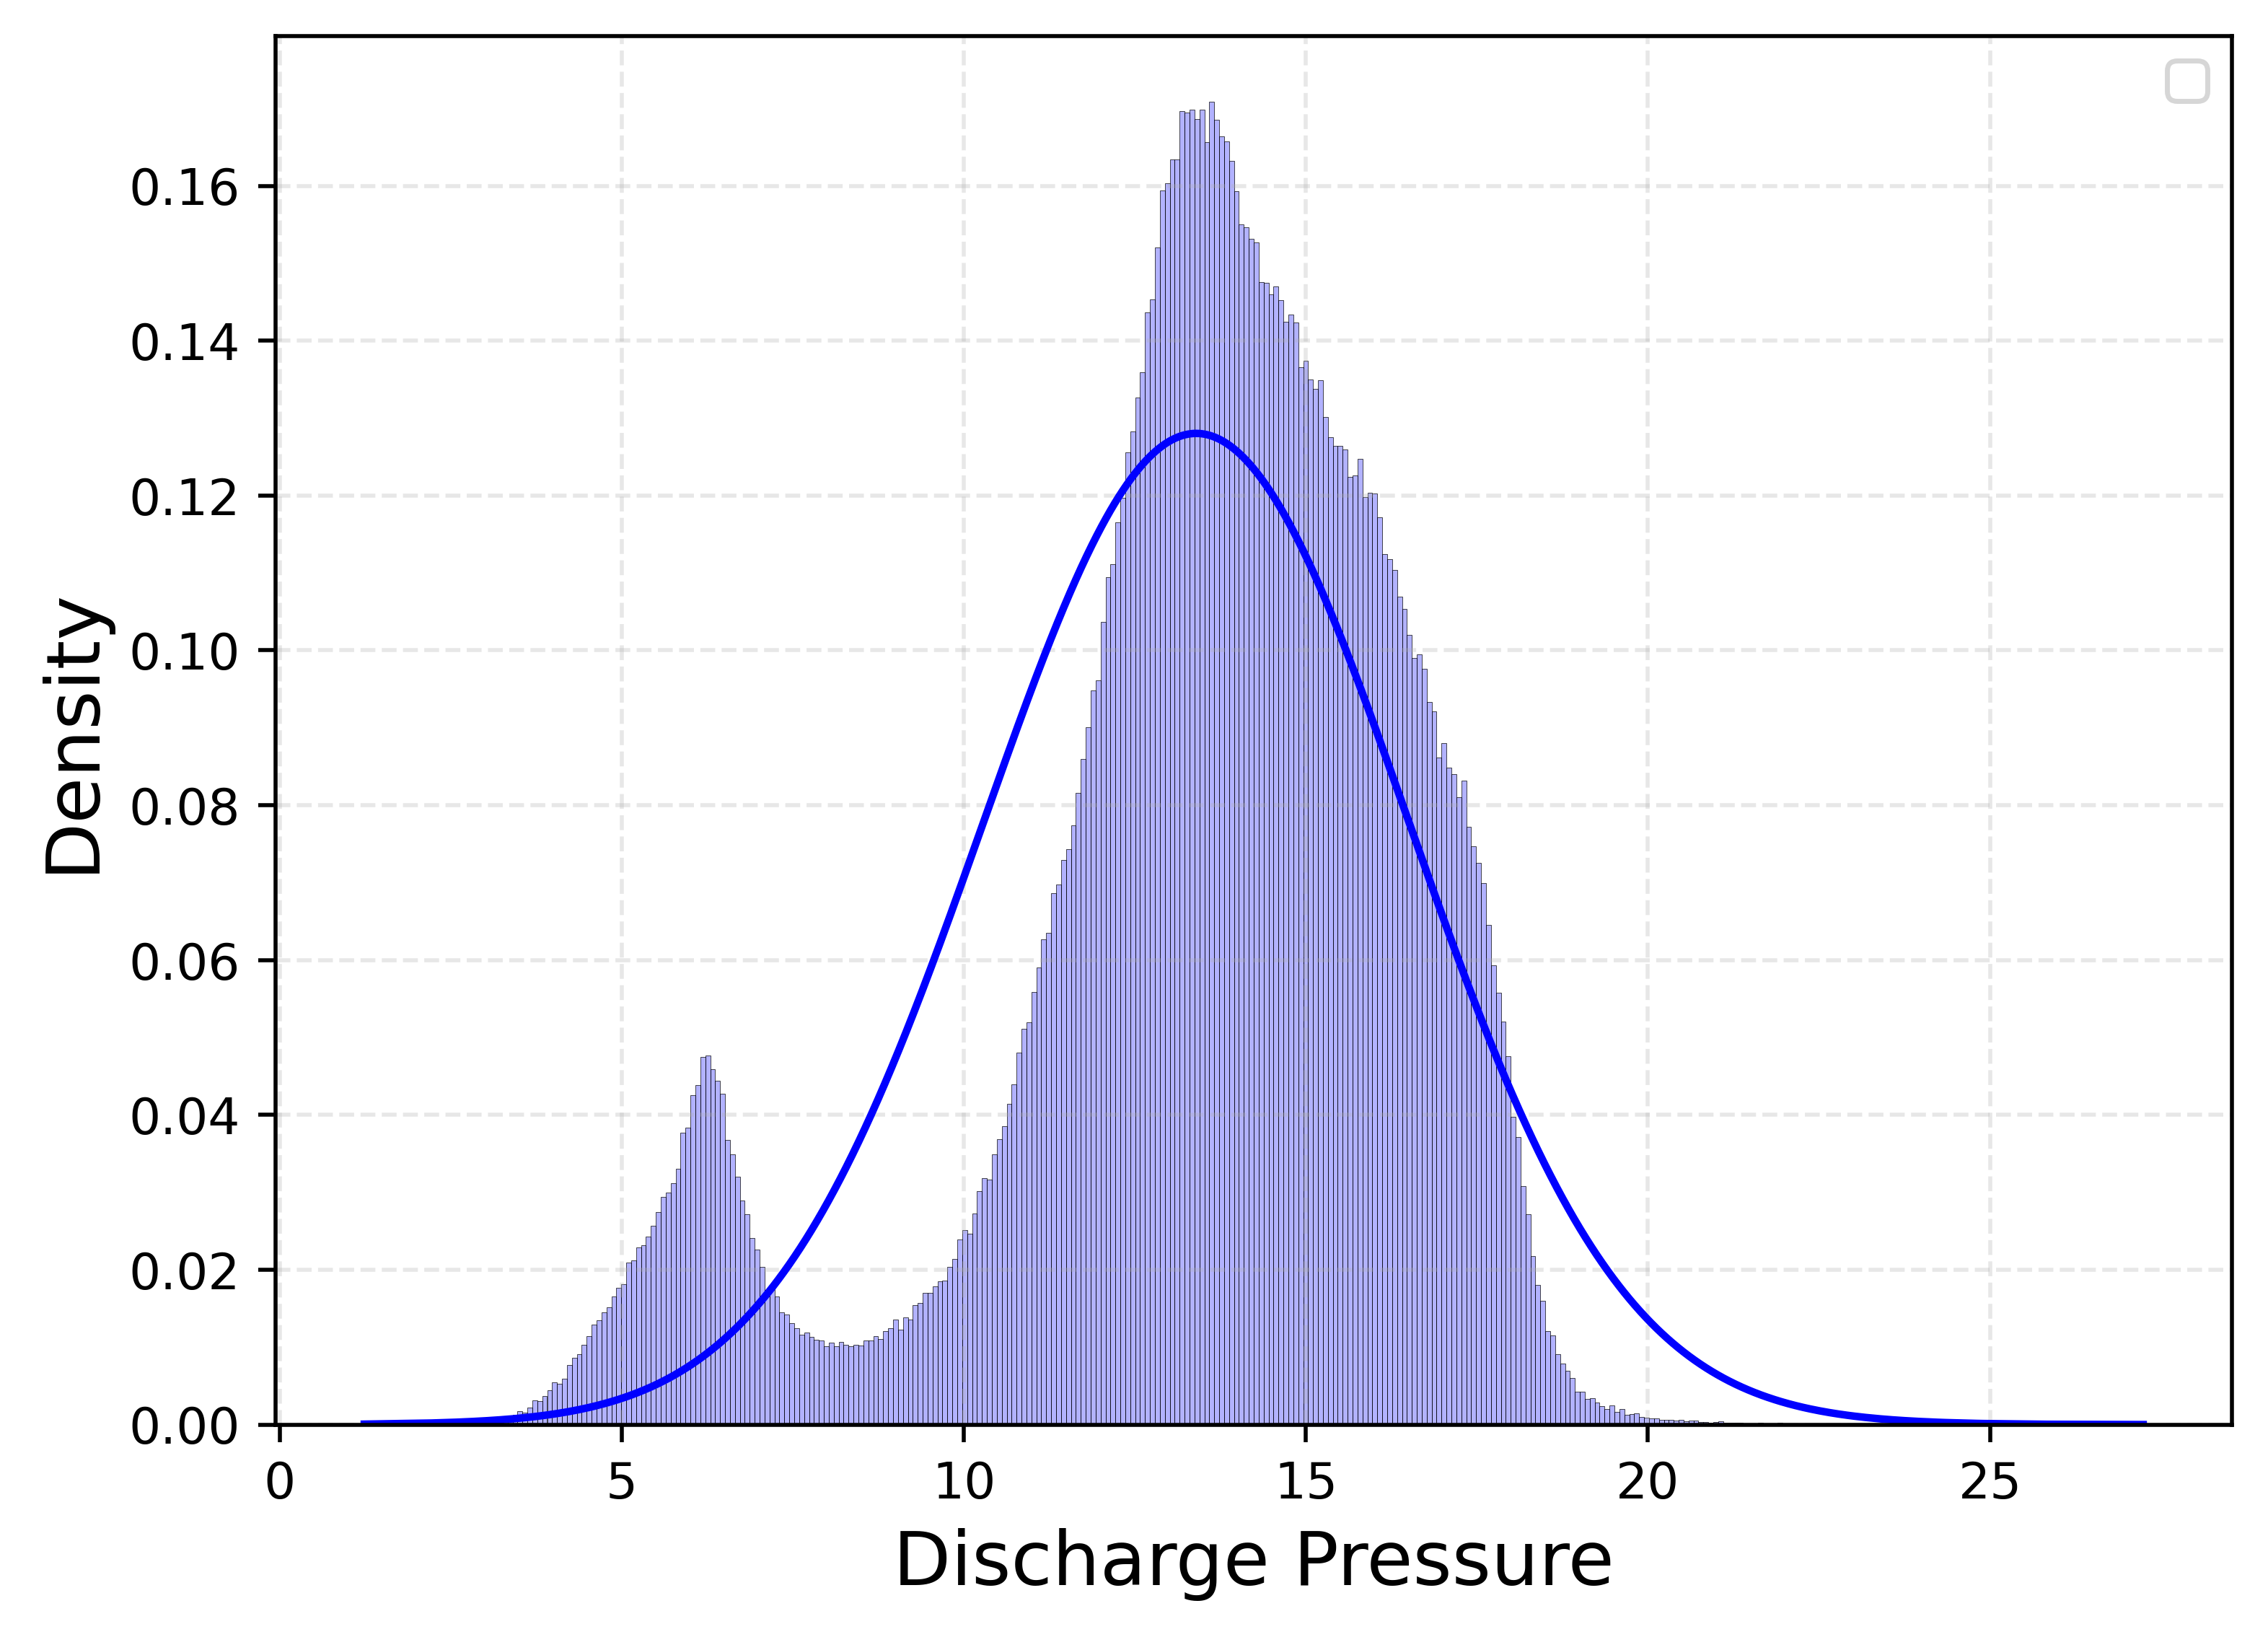

In [77]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

plt.plot(sand_data["P_out, psi"].sort_values(), cv3_pdf, color="Blue")
sns.histplot(data = sand_data["P_out, psi"], color = "Blue", stat = "density", alpha = .3)
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Discharge Pressure", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

수평압력차 최대값 -> 0.914
수평압력차 최소값 -> -0.867
수평압력차 평균값 -> -0.10582595916817734
수평압력차 표준편차값 -> 0.1212143054098015
count    822692.000000
mean         -0.105826
std           0.121214
min          -0.867000
5%           -0.280000
25%          -0.207000
50%          -0.089000
75%          -0.016000
95%           0.069000
max           0.914000
Name: Horizon DP, dtype: float64
수직압력차 최대값 -> 1.929
수직압력차 최소값 -> -0.128
수직압력차 평균값 -> 0.4552165208850054
수직압력차 표준편차값 -> 0.28508405434167405
count    822692.000000
mean          0.455217
std           0.285084
min          -0.128000
5%            0.217000
25%           0.318000
50%           0.382000
75%           0.481000
95%           1.191000
max           1.929000
Name: Vertical DP, dtype: float64


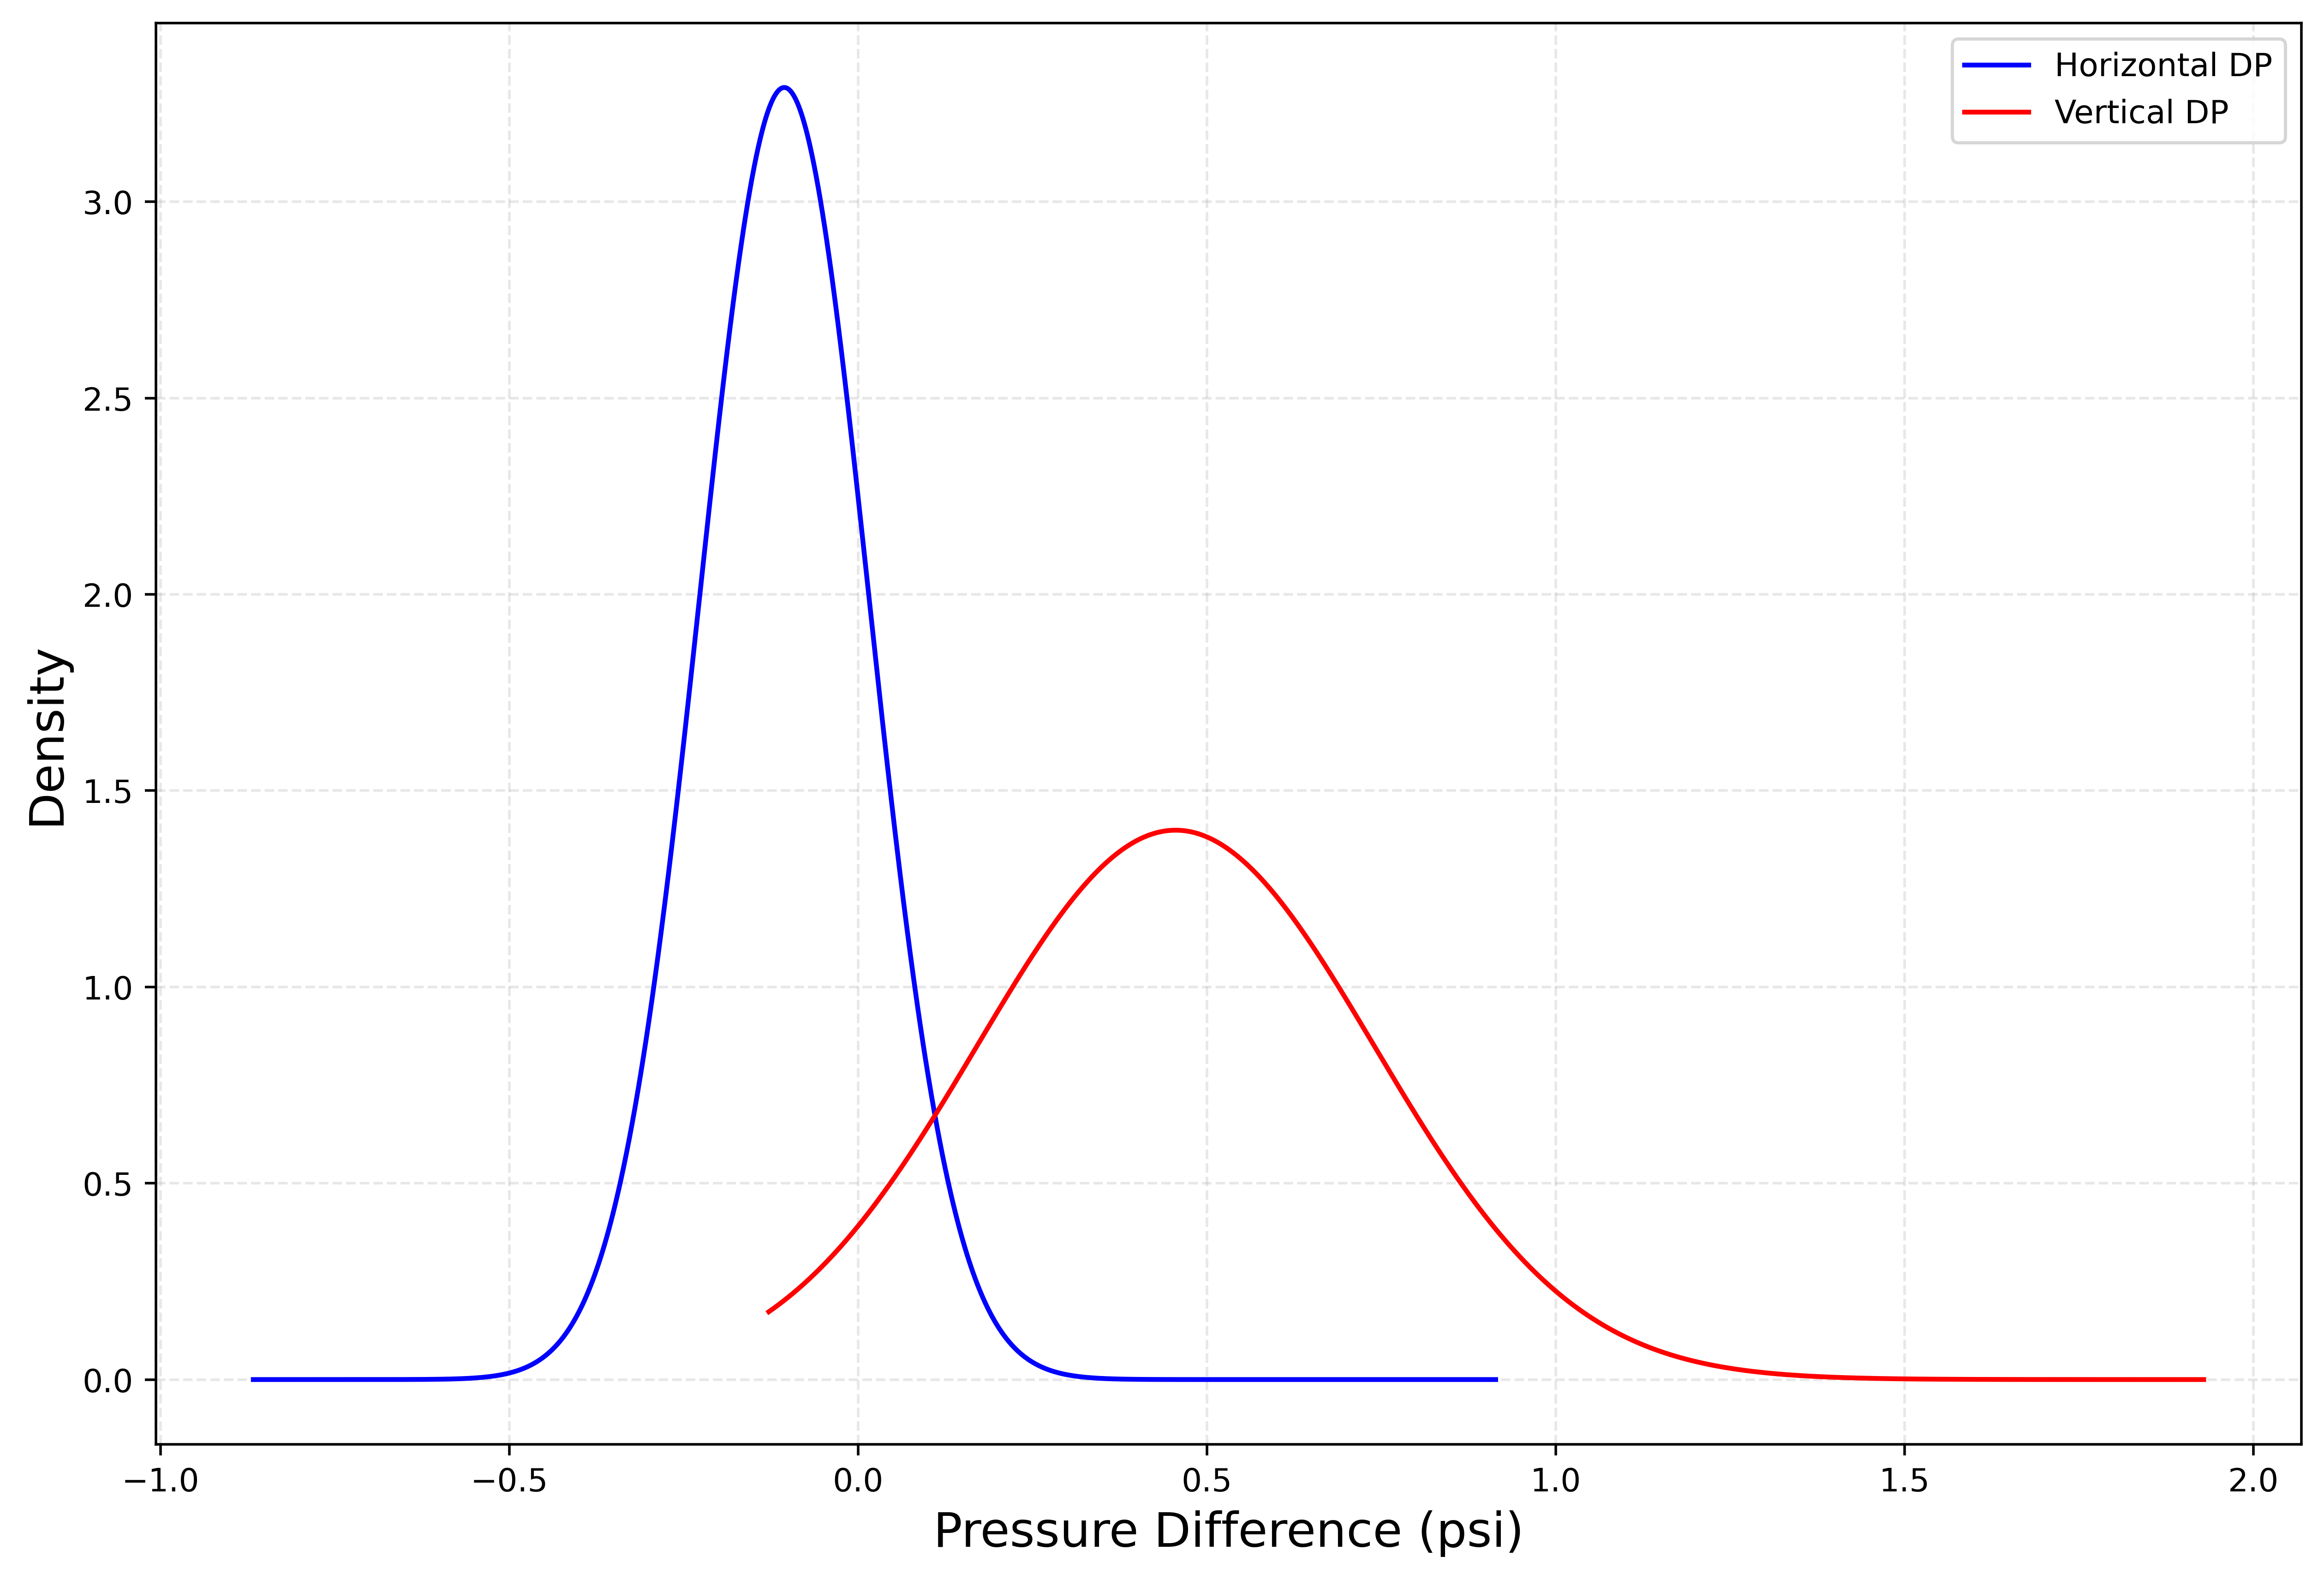

In [78]:
print('수평압력차 최대값 ->', sand_data['Horizon DP'].max())
print('수평압력차 최소값 ->', sand_data['Horizon DP'].min())
print('수평압력차 평균값 ->', sand_data['Horizon DP'].mean())
print('수평압력차 표준편차값 ->', sand_data['Horizon DP'].std())

print(sand_data['Horizon DP'].describe(percentiles = [.05, .25, .50, .75, .95]))

print('수직압력차 최대값 ->', sand_data['Vertical DP'].max())
print('수직압력차 최소값 ->', sand_data['Vertical DP'].min())
print('수직압력차 평균값 ->', sand_data['Vertical DP'].mean())
print('수직압력차 표준편차값 ->', sand_data['Vertical DP'].std())

print(sand_data['Vertical DP'].describe(percentiles = [.05, .25, .50, .75, .95]))

import scipy.stats as stats

DP_H_mean = np.mean(sand_data["Horizon DP"])
DP_H_std = np.std(sand_data["Horizon DP"])
cv4_pdf = stats.norm.pdf(sand_data["Horizon DP"].sort_values(), DP_H_mean, DP_H_std)

DP_V_mean = np.mean(sand_data["Vertical DP"])
DP_V_std = np.std(sand_data["Vertical DP"])
cv5_pdf = stats.norm.pdf(sand_data["Vertical DP"].sort_values(), DP_V_mean, DP_V_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["Horizon DP"].sort_values(), cv4_pdf, color="Blue", label = 'Horizontal DP')
plt.plot(sand_data["Vertical DP"].sort_values(), cv5_pdf, color="Red", label = 'Vertical DP')
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Pressure Difference (psi)", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

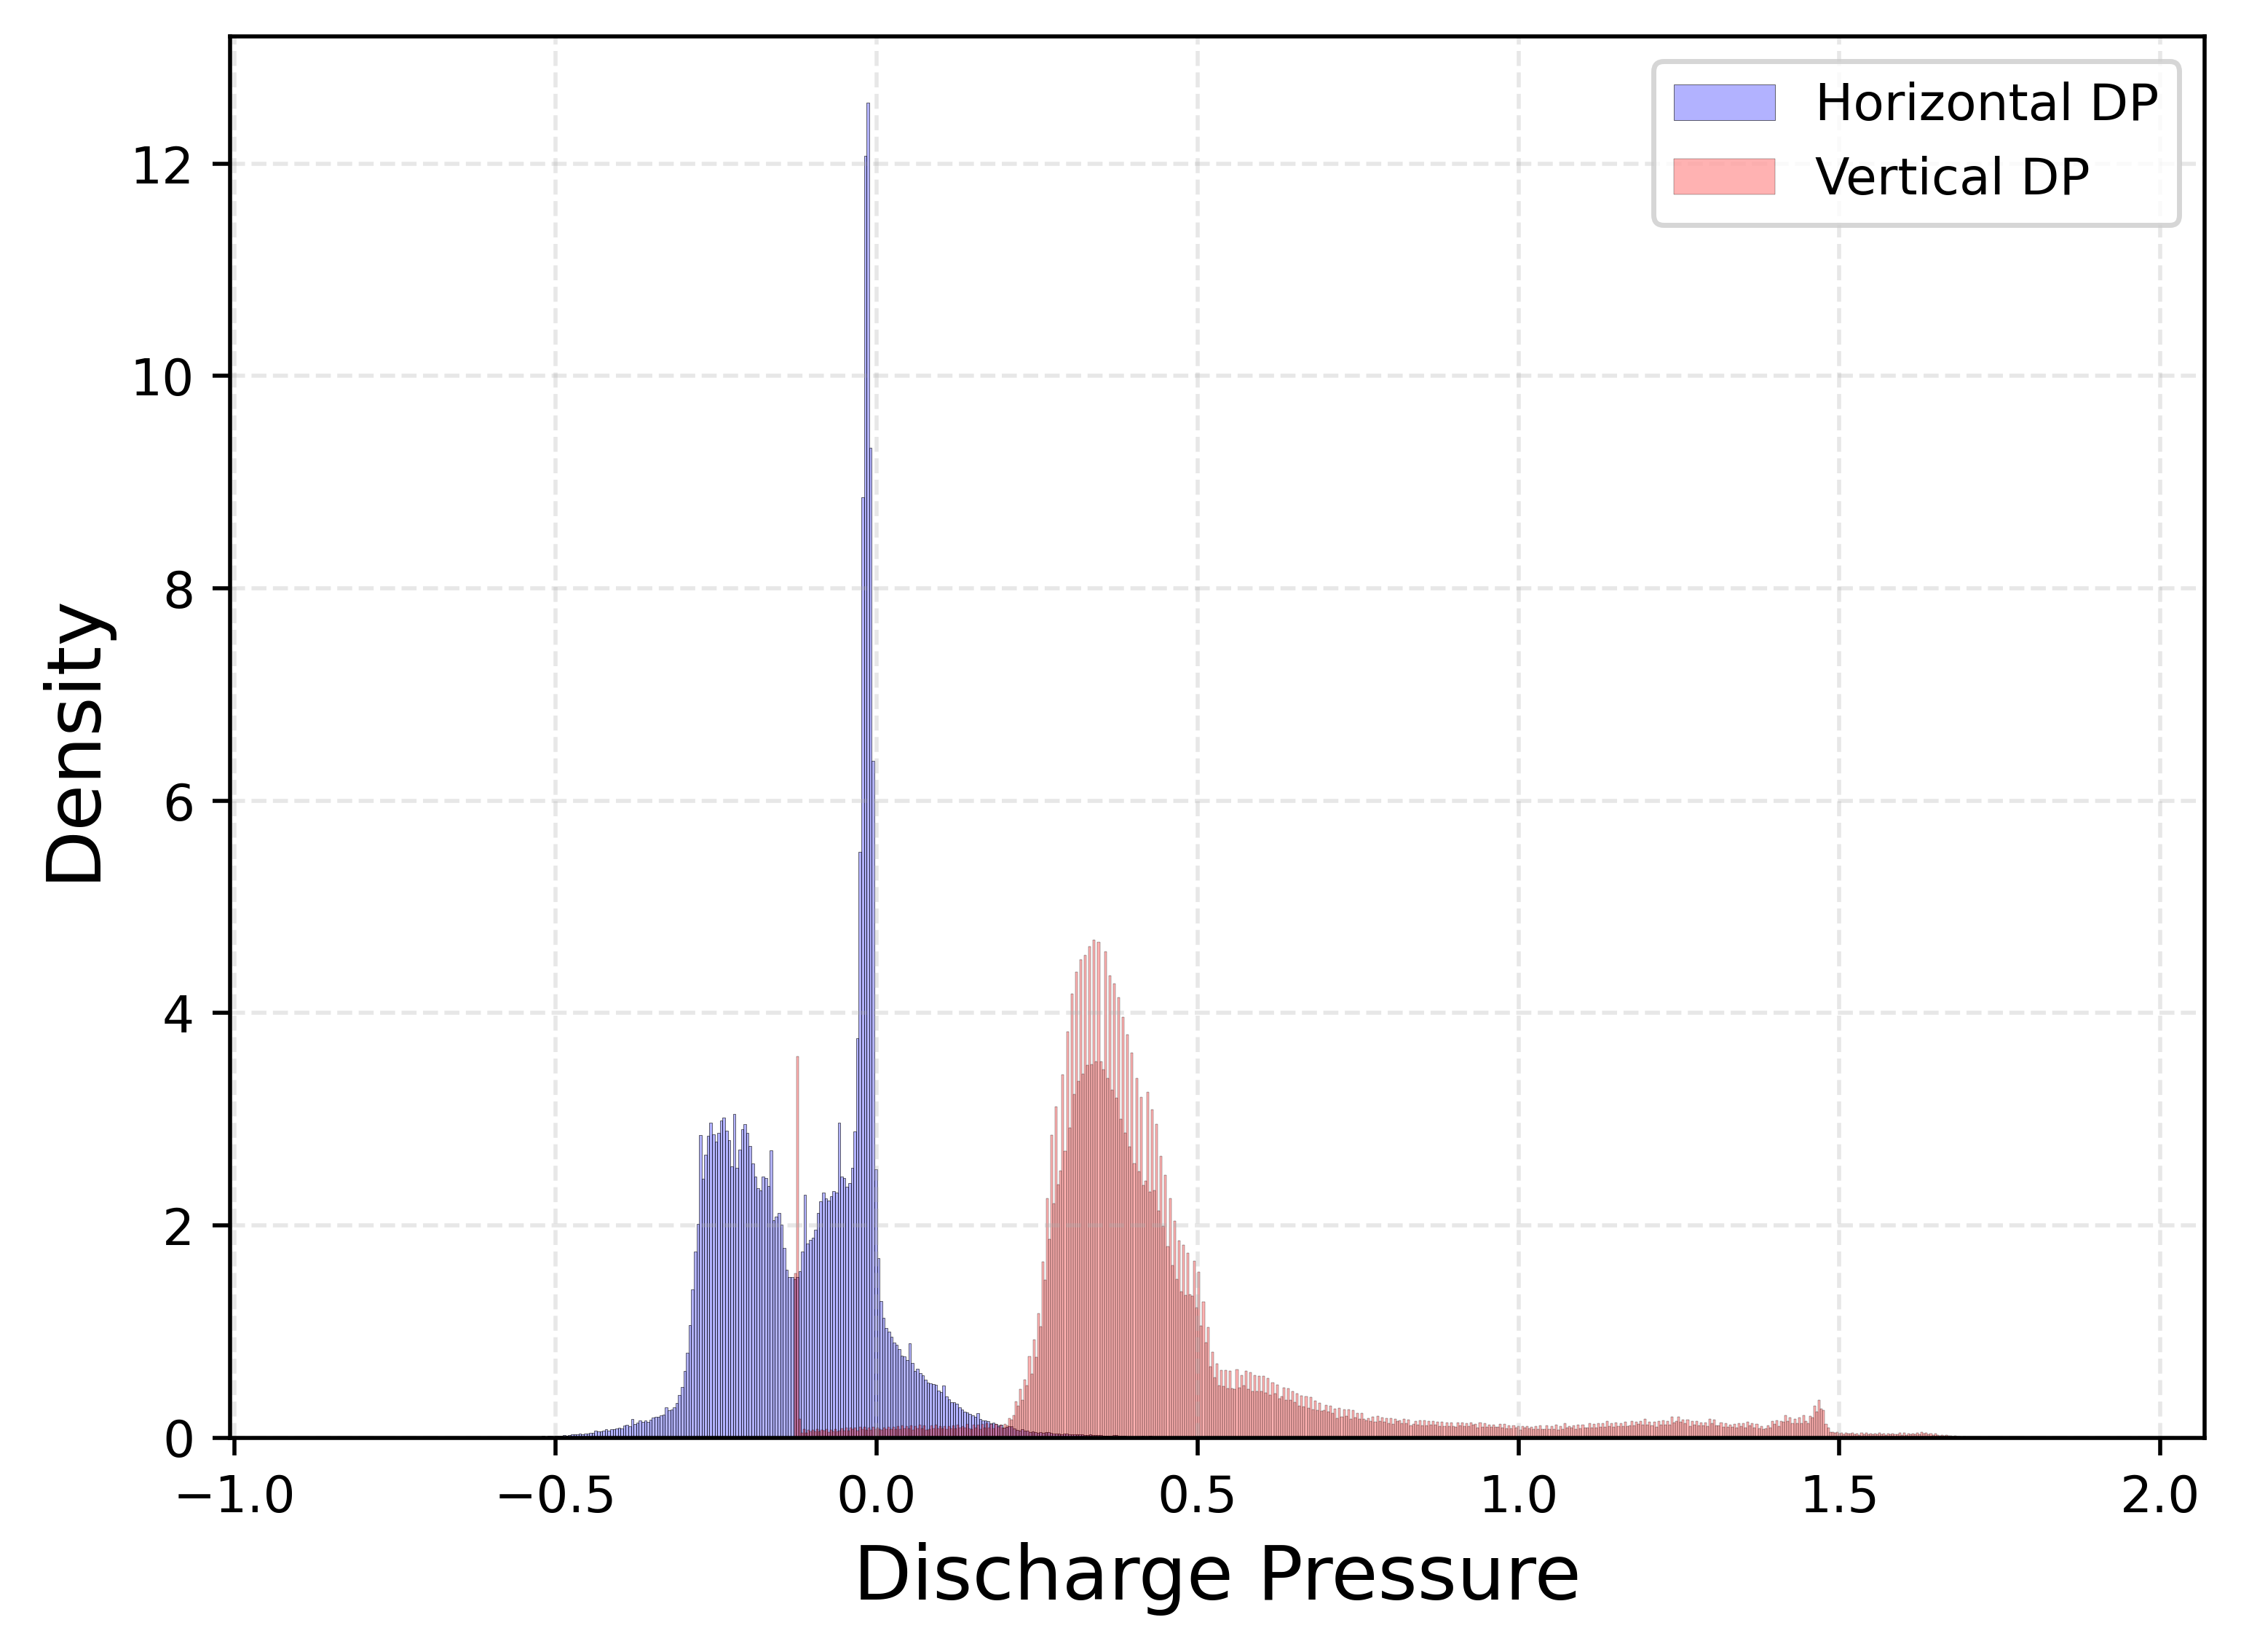

In [80]:
# plt.plot(sand_data["Horizon DP"].sort_values(), cv4_pdf, color="Blue", label = 'Horizontal DP')
# plt.plot(sand_data["Vertical DP"].sort_values(), cv5_pdf, color="Red", label = 'Vertical DP')

sns.histplot(data = sand_data["Horizon DP"], color = "Blue", stat = "density", alpha = .3, label = 'Horizontal DP')
sns.histplot(data = sand_data["Vertical DP"], color = "Red", stat = "density", alpha = .3, label = 'Vertical DP')
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Discharge Pressure", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

모터온도 최대값 -> 45.381
모터온도 최소값 -> 17.212
모터온도 평균값 -> 35.9201809887552
모터온도 표준편차값 -> 4.188301531858512
count    822692.000000
mean         35.920181
std           4.188302
min          17.212000
5%           27.738000
25%          34.247000
50%          36.857000
75%          38.664000
95%          40.976000
max          45.381000
Name: Motor temp, dtype: float64
와인딩 최대값 -> 56.523
와인딩 최소값 -> 18.347
와인딩 평균값 -> 45.74807251559475
와인딩 표준편차값 -> 5.9747571856317
count    822692.000000
mean         45.748073
std           5.974757
min          18.347000
5%           33.472000
25%          43.494000
50%          47.282000
75%          49.725000
95%          52.279000
max          56.523000
Name: Winding_temp, dtype: float64


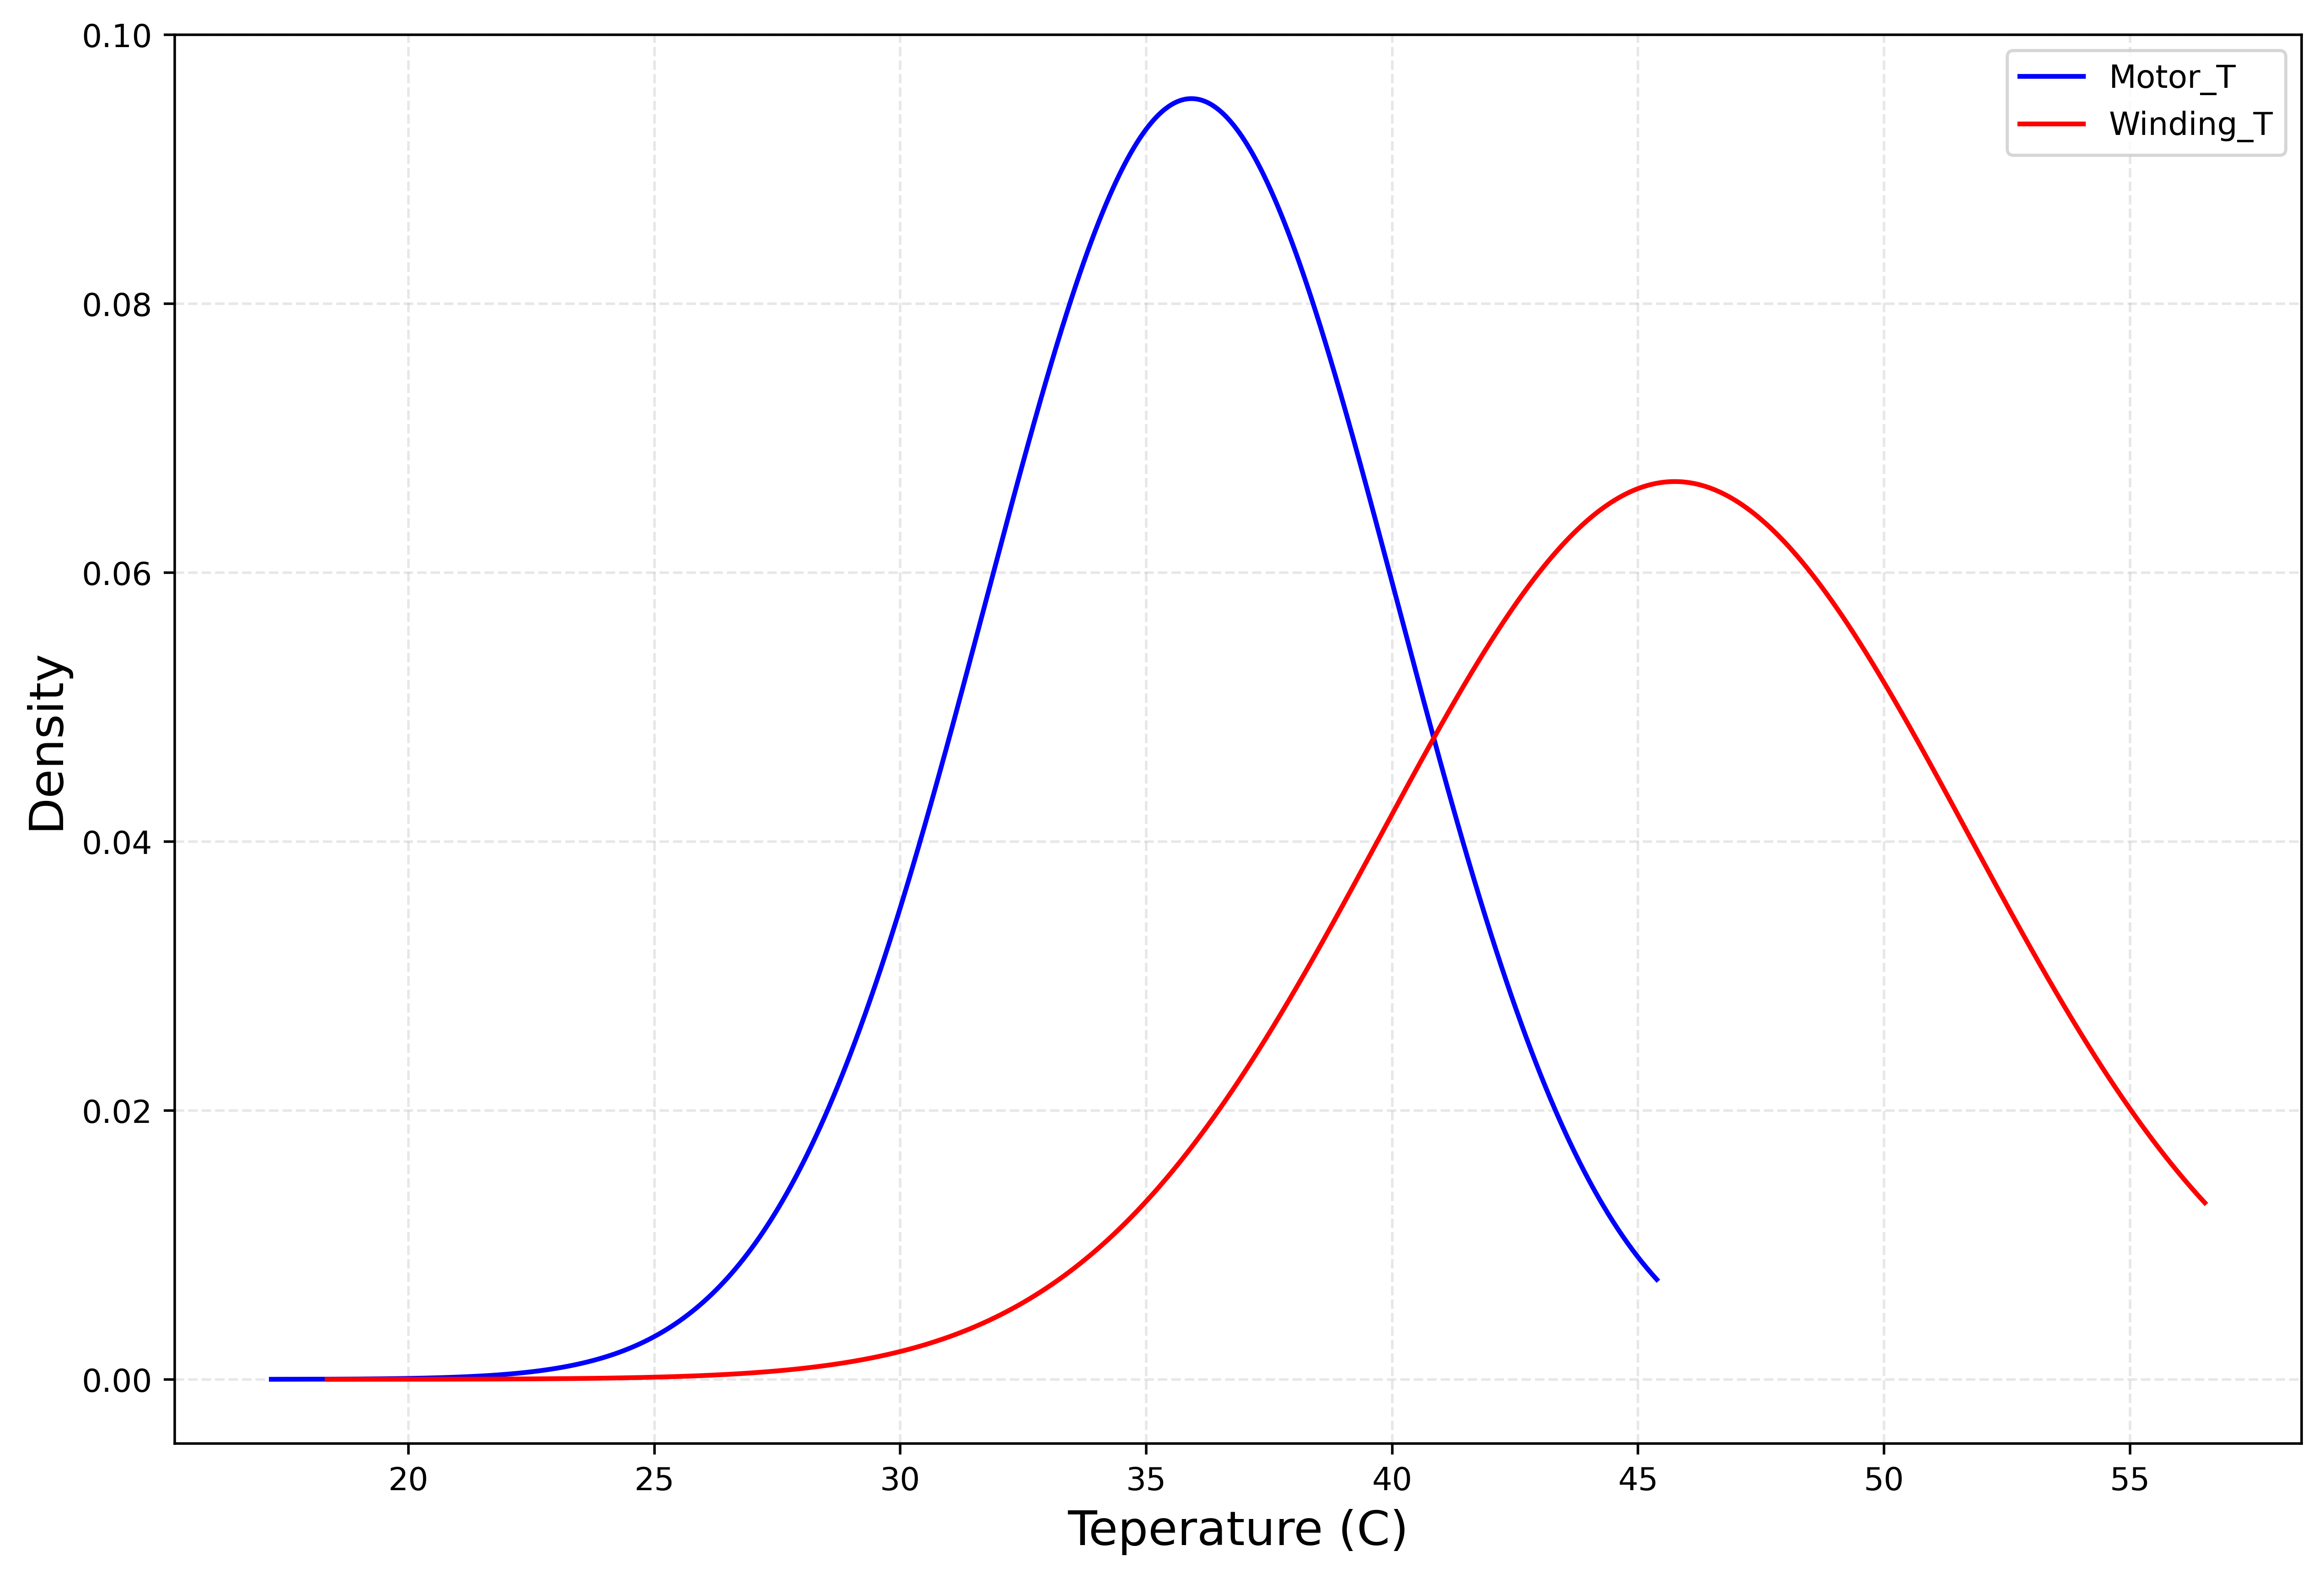

In [81]:
print('모터온도 최대값 ->', sand_data['Motor temp'].max())
print('모터온도 최소값 ->', sand_data['Motor temp'].min())
print('모터온도 평균값 ->', sand_data['Motor temp'].mean())
print('모터온도 표준편차값 ->', sand_data['Motor temp'].std())

print(sand_data['Motor temp'].describe(percentiles = [.05, .25, .50, .75, .95]))

print('와인딩 최대값 ->', sand_data['Winding_temp'].max())
print('와인딩 최소값 ->', sand_data['Winding_temp'].min())
print('와인딩 평균값 ->', sand_data['Winding_temp'].mean())
print('와인딩 표준편차값 ->', sand_data['Winding_temp'].std())

print(sand_data['Winding_temp'].describe(percentiles = [.05, .25, .50, .75, .95]))

import scipy.stats as stats

Motor_T_mean = np.mean(sand_data["Motor temp"])
Motor_T_std = np.std(sand_data["Motor temp"])
cv6_pdf = stats.norm.pdf(sand_data["Motor temp"].sort_values(), Motor_T_mean, Motor_T_std)

Wind_T_mean = np.mean(sand_data["Winding_temp"])
Wind_T_std = np.std(sand_data["Winding_temp"])
cv7_pdf = stats.norm.pdf(sand_data["Winding_temp"].sort_values(), Wind_T_mean, Wind_T_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["Motor temp"].sort_values(), cv6_pdf, color="Blue", label = 'Motor_T')
plt.plot(sand_data["Winding_temp"].sort_values(), cv7_pdf, color="Red", label = 'Winding_T')
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Teperature (C)", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [7,5]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

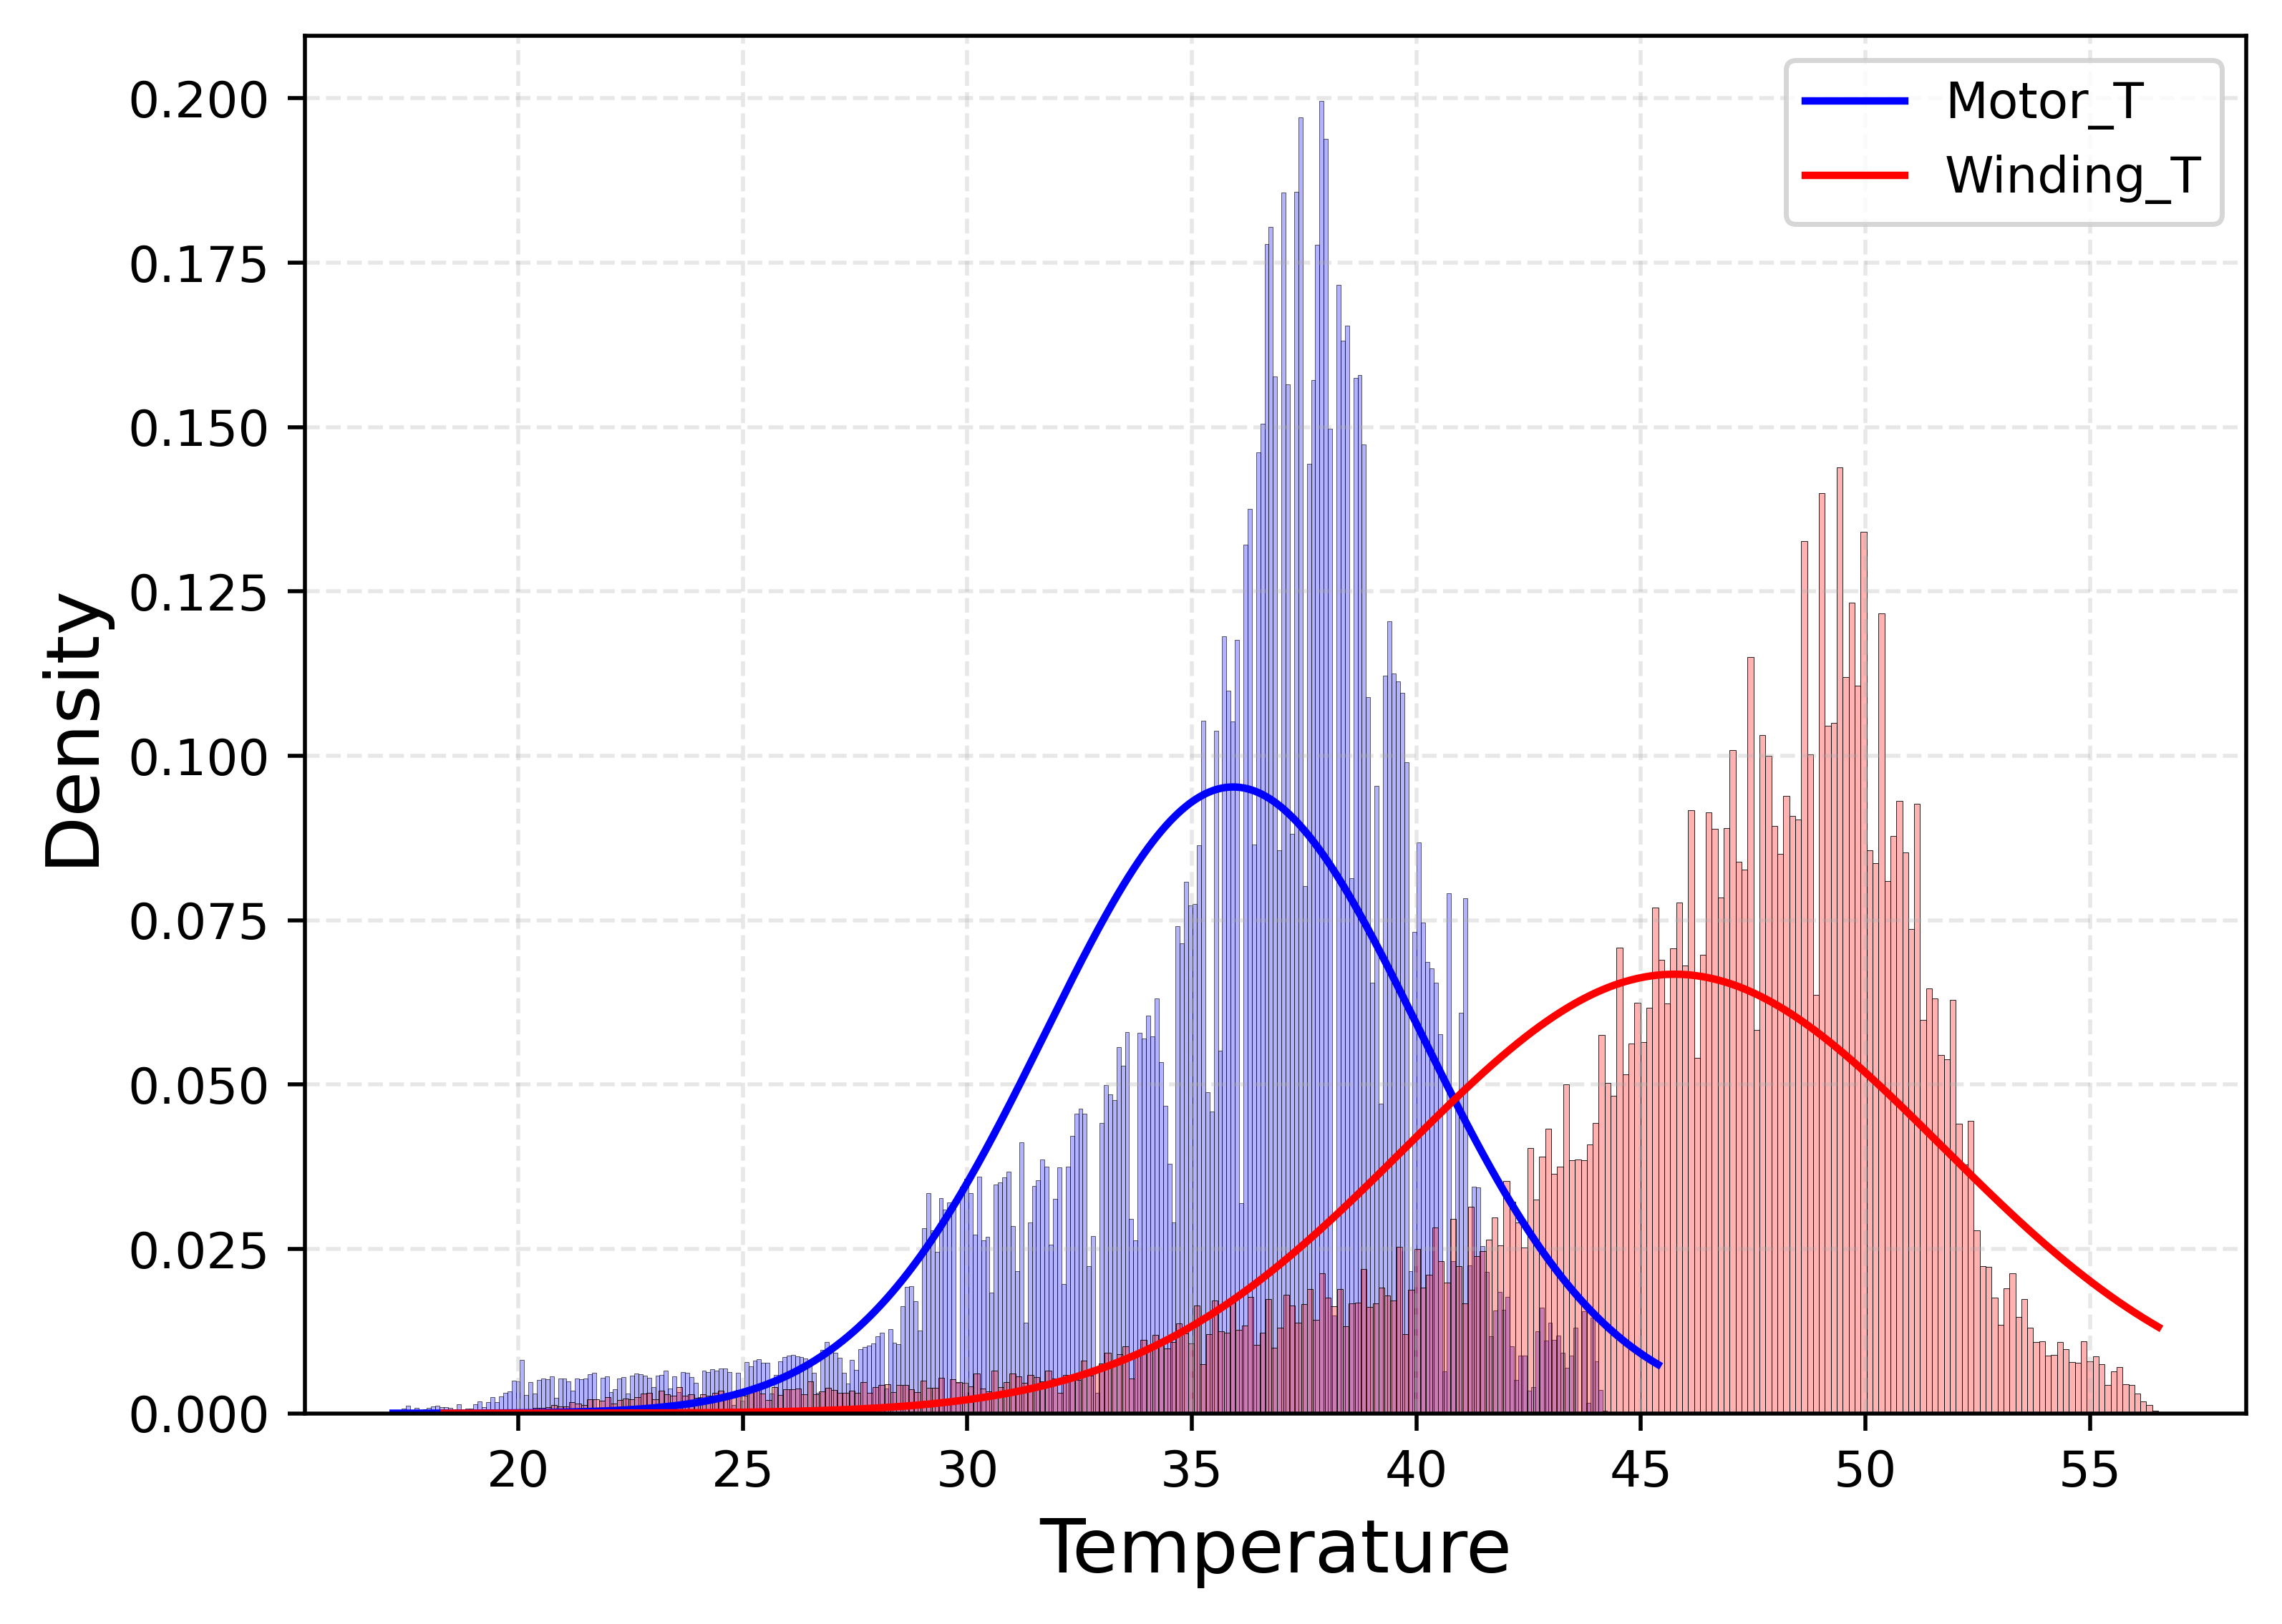

In [82]:
plt.plot(sand_data["Motor temp"].sort_values(), cv6_pdf, color="Blue", label = 'Motor_T')
plt.plot(sand_data["Winding_temp"].sort_values(), cv7_pdf, color="Red", label = 'Winding_T')

sns.histplot(data = sand_data["Motor temp"], color = "Blue", stat = "density", alpha = .3)
sns.histplot(data = sand_data["Winding_temp"], color = "Red", stat = "density", alpha = .3)
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Temperature", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

모터진동 최대값 -> 0.09699999999999999
모터진동 최소값 -> 0.021
모터진동 평균값 -> 0.04051344245479459
모터진동 표준편차값 -> 0.006219504962924283
count    822692.000000
mean          0.040513
std           0.006220
min           0.021000
5%            0.032000
25%           0.036000
50%           0.040000
75%           0.044000
95%           0.051000
max           0.097000
Name: Vib,motor, dtype: float64
펌프아웃진동 최대값 -> 0.053
펌프아웃진동 최소값 -> 0.018000000000000002
펌프아웃진동 평균값 -> 0.03210743874985914
펌프아웃진동 표준편차값 -> 0.0052578903304444
count    822692.000000
mean          0.032107
std           0.005258
min           0.018000
5%            0.024000
25%           0.028000
50%           0.032000
75%           0.035000
95%           0.042000
max           0.053000
Name: Vib, out, dtype: float64


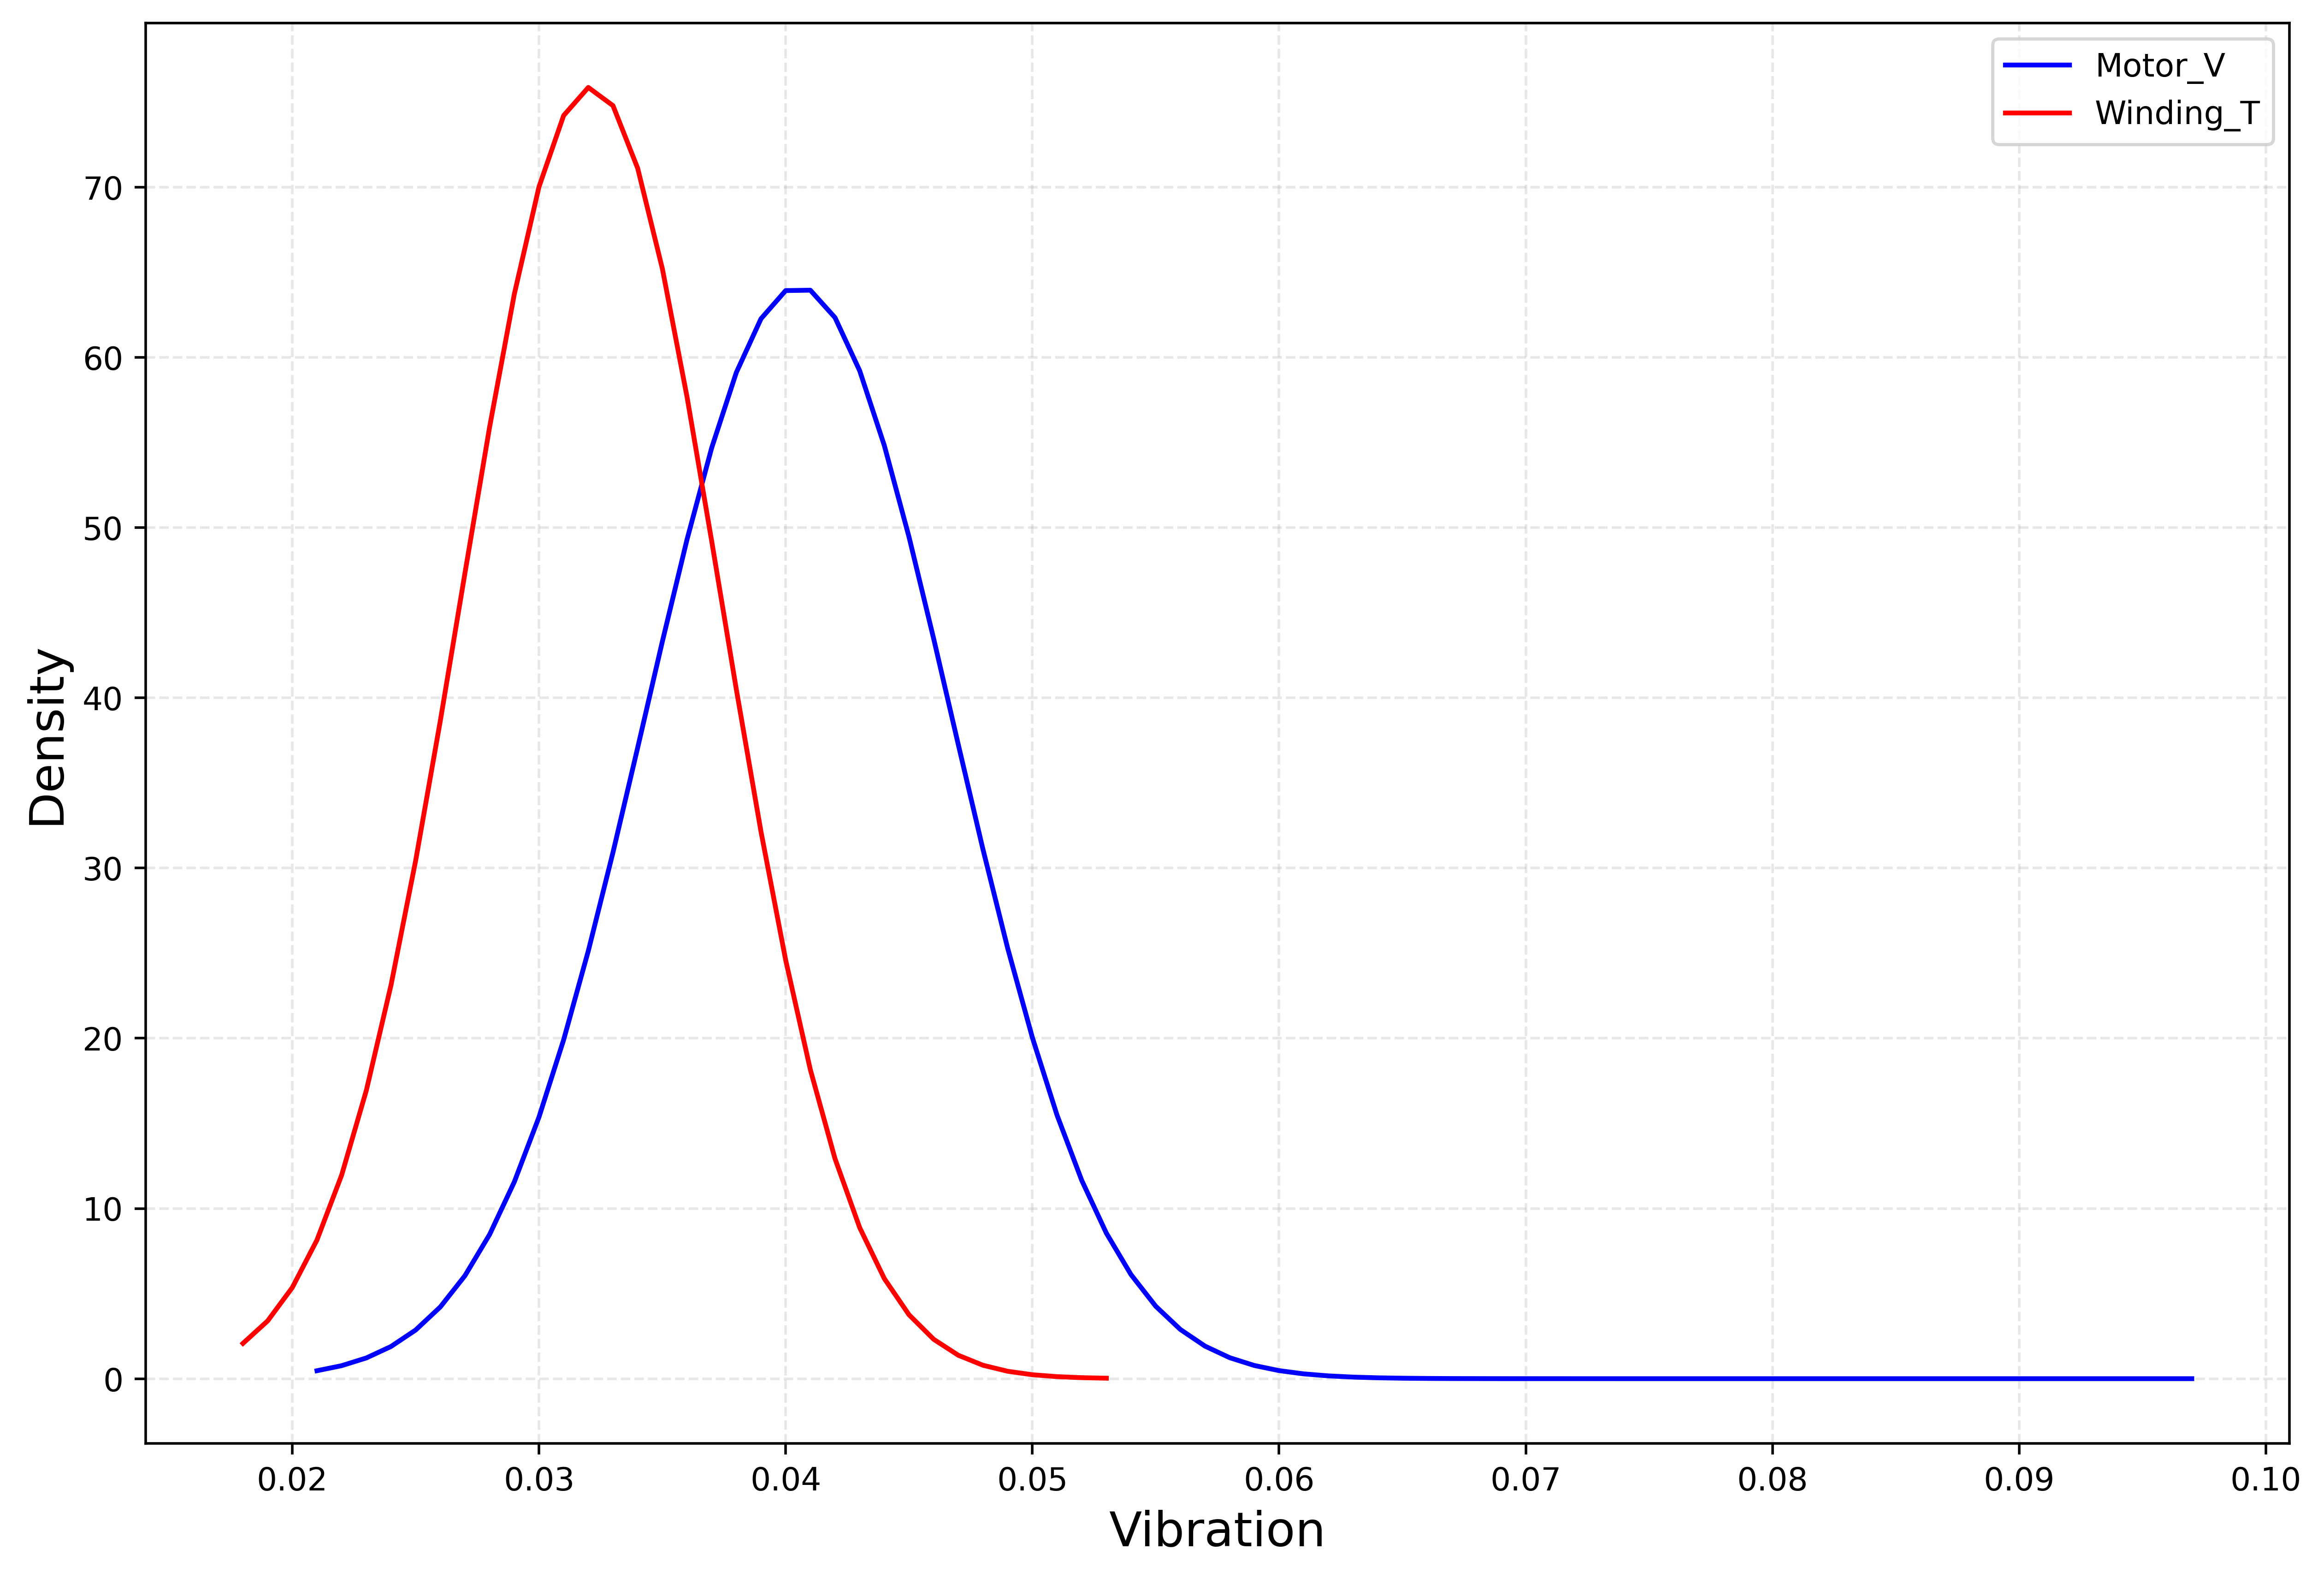

In [83]:
print('모터진동 최대값 ->', sand_data['Vib,motor'].max())
print('모터진동 최소값 ->', sand_data['Vib,motor'].min())
print('모터진동 평균값 ->', sand_data['Vib,motor'].mean())
print('모터진동 표준편차값 ->', sand_data['Vib,motor'].std())

print(sand_data['Vib,motor'].describe(percentiles = [.05, .25, .50, .75, .95]))

print('펌프아웃진동 최대값 ->', sand_data['Vib, out'].max())
print('펌프아웃진동 최소값 ->', sand_data['Vib, out'].min())
print('펌프아웃진동 평균값 ->', sand_data['Vib, out'].mean())
print('펌프아웃진동 표준편차값 ->', sand_data['Vib, out'].std())

print(sand_data['Vib, out'].describe(percentiles = [.05, .25, .50, .75, .95]))

import scipy.stats as stats

Motor_V_mean = np.mean(sand_data["Vib,motor"])
Motor_V_std = np.std(sand_data["Vib,motor"])
cv8_pdf = stats.norm.pdf(sand_data["Vib,motor"].sort_values(), Motor_V_mean, Motor_V_std)

Pump_outV_mean = np.mean(sand_data["Vib, out"])
Pump_outV_std = np.std(sand_data["Vib, out"])
cv9_pdf = stats.norm.pdf(sand_data["Vib, out"].sort_values(), Pump_outV_mean, Pump_outV_std)

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

plt.plot(sand_data["Vib,motor"].sort_values(), cv8_pdf, color="Blue", label = 'Motor_V')
plt.plot(sand_data["Vib, out"].sort_values(), cv9_pdf, color="Red", label = 'Winding_T')
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Vibration", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  # 가로, 세로 인치 조정
plt.rcParams["figure.dpi"] = 500   # 해상도 조정
plt.show()
# cv2_pdf = stats.norm.pdf(cv2["Area"].sort_values(), cv2_mean, cv2_std)

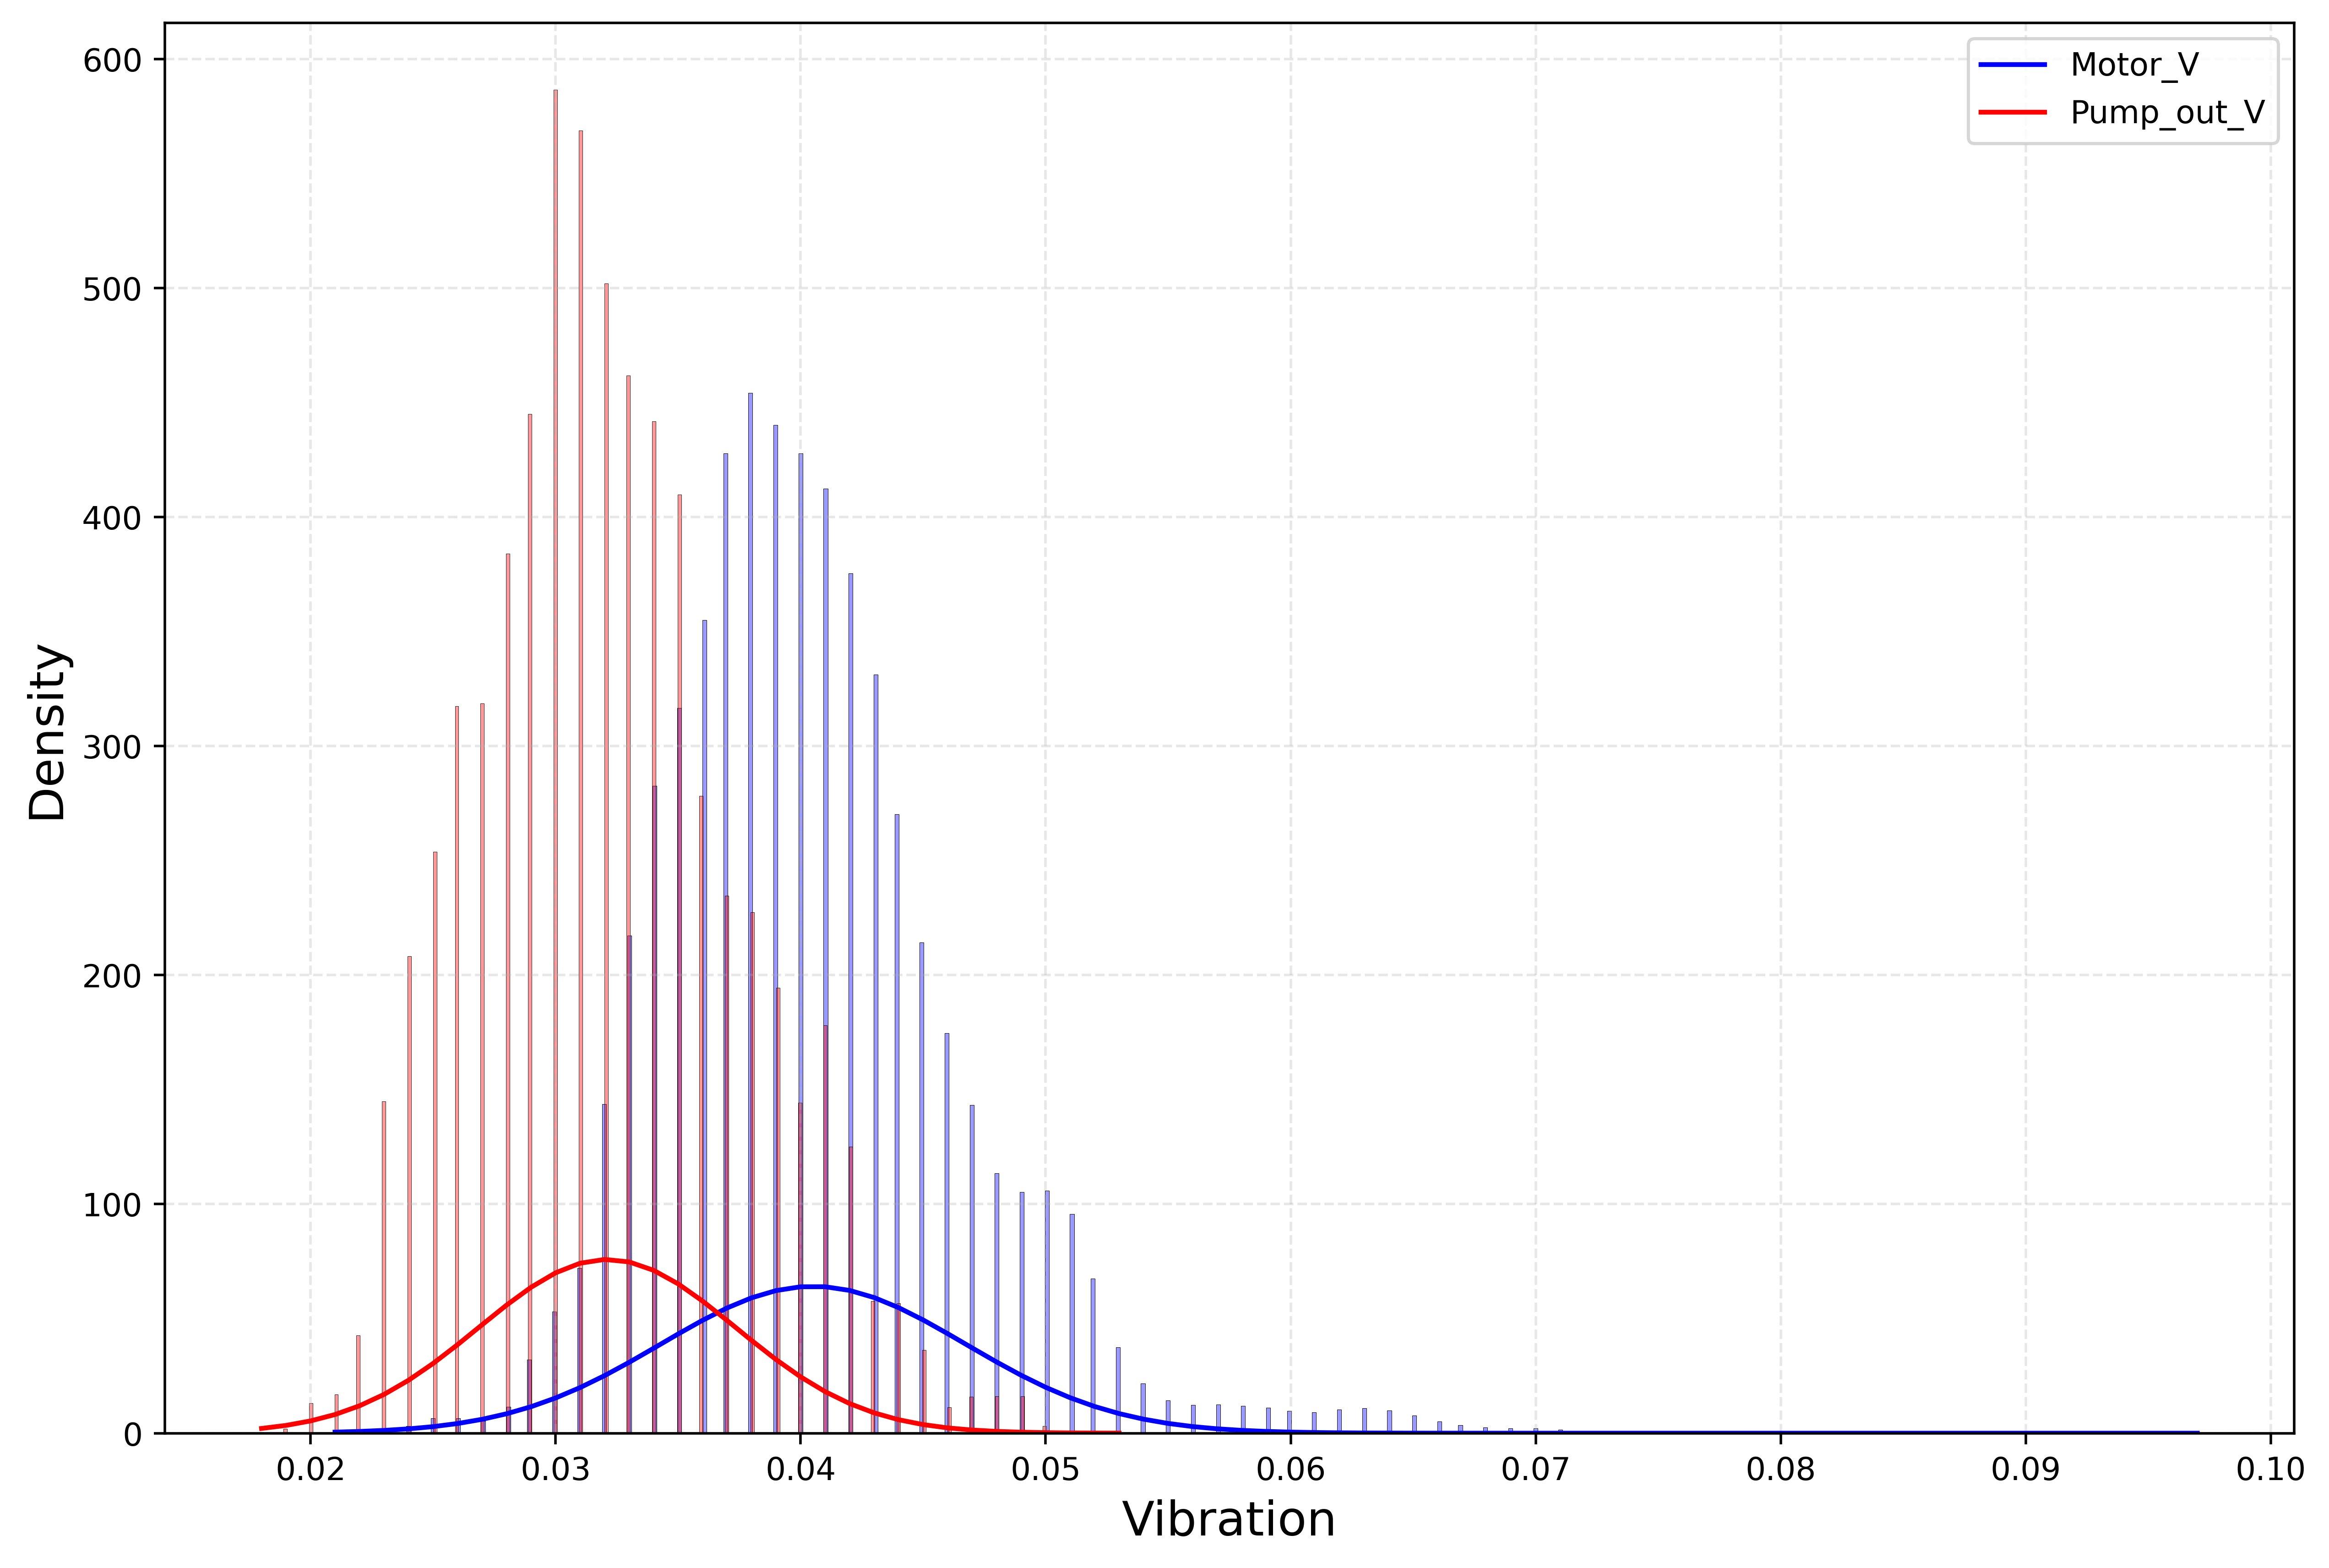

In [86]:
plt.plot(sand_data["Vib,motor"].sort_values(), cv8_pdf, color="Blue", label = 'Motor_V')
plt.plot(sand_data["Vib, out"].sort_values(), cv9_pdf, color="Red", label = 'Pump_out_V')

sns.histplot(data = sand_data["Vib,motor"], color = "Blue", stat = "density", alpha = .4)
sns.histplot(data = sand_data["Vib, out"], color = "Red", stat = "density", alpha = .4)
# plt.plot(cv2["Area"].sort_values(), cv2_pdf, color="Orange", label="Cultivar_B")
# plt.xlim([0,30])
# plt.ylim([0,0.15])
plt.legend()
plt.xlabel("Vibration", size=15)
plt.ylabel("Density", size=15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"] = [12,8]  
plt.rcParams["figure.dpi"] = 500 
plt.show()

In [19]:
train_normal

Time  y       Q,m3d    Pin,kpa   Pout,kpa  Horizon_DP  Vertical_DP  \
0            1  0  412.088241  1198.3510  4808.2972  100.129190   105.134960   
1            2  0  412.737347  1197.7994  4663.9159  100.218825   104.983270   
2            3  0  412.872253  1197.9373  4710.9398  100.225720   104.886740   
3            4  0  412.219492  1197.9373  4708.0439  100.260195   105.072905   
4            5  0  412.143697  1197.7994  4488.7829  100.267090   104.907425   
...        ... ..         ...        ...        ...         ...          ...   
765507  765508  0  221.880651  2031.2670  2917.5503  100.791110   111.368040   
765508  765509  0  222.933204  2031.1291  2778.8229  100.956590   111.326670   
765509  765510  0  223.249097  2042.8506  2820.7445  101.053120   111.347355   
765510  765511  0  221.435572  2030.0259  2924.3074  100.618735   111.374935   
765511  765512  0  222.113598  2025.7510  2784.3389  101.018645   111.436990   

        Acoustic  Motor temp  Vib,motor  Vib, out  Vib, middle  Winding_temp  
0          0.243      25.245      0.042     0.029        0.023        30.141  
1          0.243      25.247      0.042     0.029        0.023        29.400  
2          0.243      25.249      0.041     0.029        0.023        29.745  
3          0.243      25.248      0.042     0.029        0.023        30.159  
4          0.244      25.246      0.041     0.029        0.023        30.066  
...          ...         ...        ...       ...          ...           ...  
765507     0.246      41.075      0.030     0.046        0.024        51.917  
765508     0.246      41.074      0.029     0.044        0.025        51.798  
765509     0.247      41.074      0.029     0.044        0.024        51.910  
765510     0.245      41.074      0.029     0.044        0.025        51.729  
765511     0.247      41.076      0.029     0.044        0.025        52.014  

[765512 rows x 13 columns]

In [23]:
def temporalize(X, y, timesteps):
	output_X = []
	output_y = []
	for i in range(len(X) - timesteps - 1):
		t = []
		for j in range(1, timesteps + 1):
			# Gather the past records upto the lookback period
			t.append(X[[(i + j + 1)], :])
		output_X.append(t)
		output_y.append(y[i + timesteps + 1])
	return np.squeeze(np.array(output_X)), np.array(output_y)
timesteps = 30

# Temporalize
x, y = temporalize(input_x, input_y, timesteps)
print(x.shape) # (772602, 30, 16)

(765481, 30, 11)


In [65]:
from sklearn.model_selection import train_test_split
# Split into train, valid, and test 
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = seed)

print(len(x_train))  # 11691
print(len(x_valid))  # 2923
print(len(x_test))   # 3654
print(len(y_valid))

489907
122477
153097
122477


In [48]:
x_test.shape

(153097, 30, 11)

In [31]:
# 고장 데이터를 x_valid와 x_test에 붙이는 작업이 필요함
fail_valid = fail_data[:28590]
fail_test = fail_data[28590:]

fail_valid_np = fail_valid.values
fail_test_np = fail_test.values

In [42]:
input_x_valid = fail_valid.drop(['Time', 'y'], axis = 1).values
input_y_valid = fail_valid['y'].values

n_features2 = input_x_valid.shape[1]
input_y_valid.shape

input_x_test = fail_test.drop(['Time', 'y'], axis = 1).values
input_y_test = fail_test['y'].values

n_features3 = input_x_test.shape[1]
input_y_test.shape

(28590,)

In [43]:
# Temporalize
x_valid2, y_valid2 = temporalize(input_x_valid, input_y_valid, timesteps)
print(x_valid2.shape) # (772602, 30, 16)

# Temporalize
x_test2, y_test2 = temporalize(input_x_test, input_y_test, timesteps)
print(x_test2.shape) # (772602, 30, 16)

(28559, 30, 11)
(28559, 30, 11)


In [53]:
x_test_final = np.concatenate((x_test, x_test2))
print(x_test_final.shape)

x_valid_final = np.concatenate((x_valid, x_valid2))
print(x_valid_final.shape)

(181656, 30, 11)
(151036, 30, 11)


In [67]:
y_test_final = np.concatenate((y_test, y_test2))
print(y_test_final.shape)

y_valid_final = np.concatenate((y_valid, y_valid2))
print(y_valid_final.shape)

(181656,)
(151036,)


In [ ]:
# For training the autoencoder, split 0 / 1
# x_train_y0 = x_train[y_train == 0]
# x_train_y1 = x_train[y_train == 1]

x_valid_final_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]
x_test_y0 = x_test[y_test == 0]
x_test_y1 = x_test[y_test == 1]

In [54]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X
scaler = RobustScaler().fit(flatten(x_train))

x_train_scaled = scale(x_train, scaler)
x_valid_final_scaled = scale(x_valid_final, scaler)
# x_valid_y0_scaled = scale(x_valid_y0, scaler)
x_test_final_scaled = scale(x_test_final, scaler)

In [55]:
from tensorflow.keras import Model, models, layers, optimizers, regularizers

epochs = 300
batch = 32
lr = 0.001
# 학습률은 0.00001 부터 10씩 곱해가면서 하고 배치사이즈는 32가 이상적인 숫자라함. 이에 대한 근거를 대던지, 나중에
# 그리드 서칭을 하던지 해야할듯.
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(8, activation='relu', input_shape=(timesteps, n_features), return_sequences=True)) # what is n_feature ?
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(4, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(128, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 8)             640       
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 208       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 4)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 4)             144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 8)             416       
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 11)            99        
Total params: 1,507
Trainable params: 1,507
Non-trainable params: 0
______________________________________________________

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# compile
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
# fit
history = lstm_ae.fit(x_train_scaled, x_train_scaled,
                     epochs=epochs, batch_size=batch, callbacks = callbacks,
                     validation_data=(x_valid_final_scaled, x_valid_final_scaled))

Epoch 1/300
15310/15310 [==============================] - 211s 14ms/step - loss: 0.2590 - val_loss: 0.3125
Epoch 2/300
15310/15310 [==============================] - 214s 14ms/step - loss: 0.1393 - val_loss: 0.2840
Epoch 3/300
15310/15310 [==============================] - 213s 14ms/step - loss: 0.1206 - val_loss: 0.2952
Epoch 4/300
15310/15310 [==============================] - 224s 15ms/step - loss: 0.1239 - val_loss: 0.2752
Epoch 5/300
15310/15310 [==============================] - 219s 14ms/step - loss: 0.1181 - val_loss: 0.2463
Epoch 6/300
15310/15310 [==============================] - 220s 14ms/step - loss: 0.1203 - val_loss: 0.2198
Epoch 7/300
15310/15310 [==============================] - 224s 15ms/step - loss: 0.1163 - val_loss: 0.2073
Epoch 8/300
15310/15310 [==============================] - 218s 14ms/step - loss: 0.1096 - val_loss: 0.2114
Epoch 9/300
15310/15310 [==============================] - 217s 14ms/step - loss: 0.1078 - val_loss: 0.1927
Epoch 10/300
15310/15310 [==

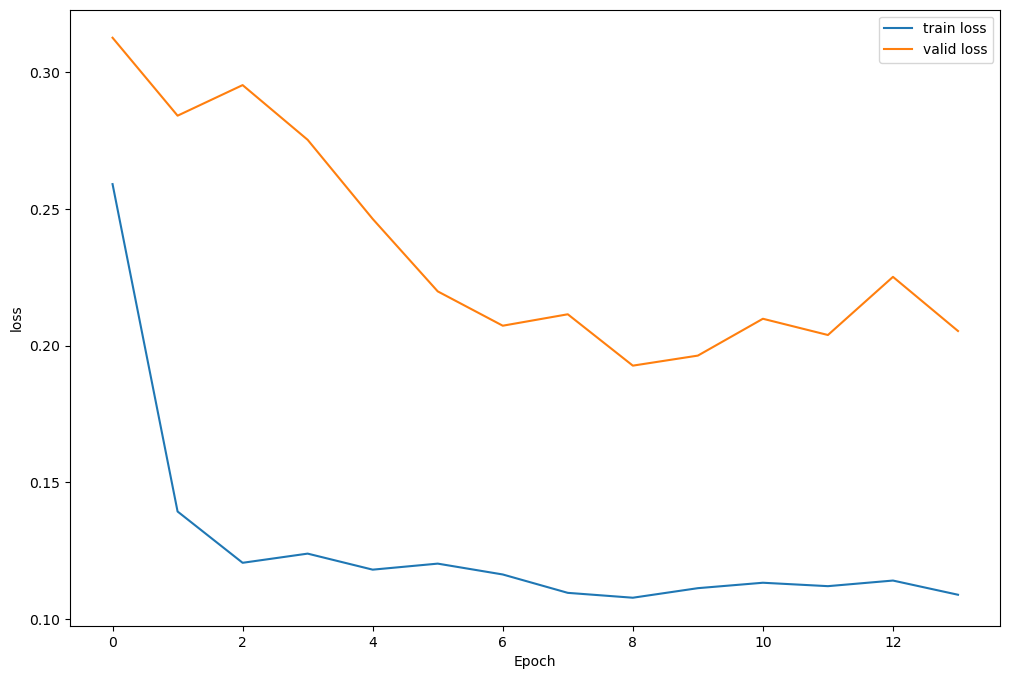

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

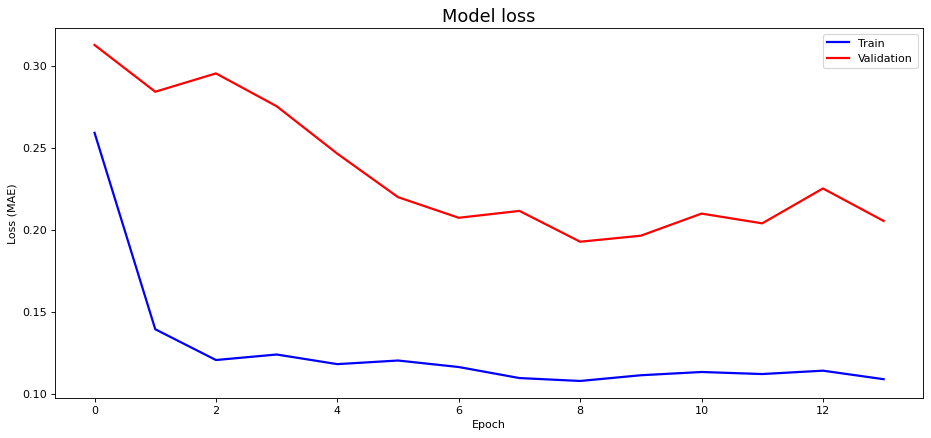

In [58]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history.history['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(history.history['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [69]:
print(valid_x_predictions.shape)
print(x_valid_final_scaled.shape)
print(y_valid.shape)

(151036, 30, 11)
(151036, 30, 11)
(122477,)


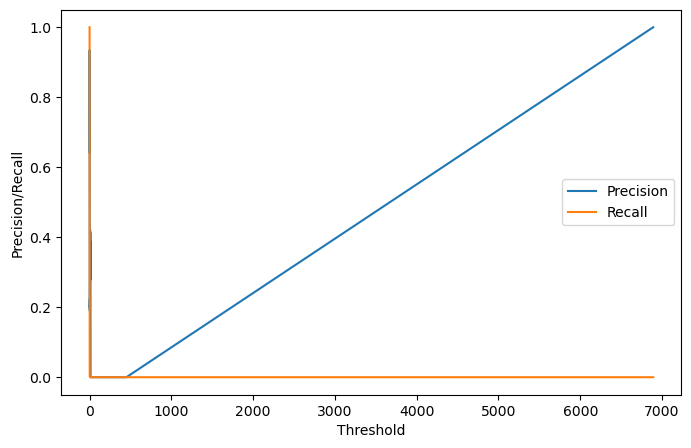

In [68]:
from sklearn import metrics

valid_x_predictions = lstm_ae.predict(x_valid_final_scaled)
mse = np.mean(np.power(flatten(x_valid_final_scaled) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 
                         'True_class':list(y_valid_final)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [70]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.9213284270343286 , recall:  0.9213284270343286
threshold:  0.5413416095263993


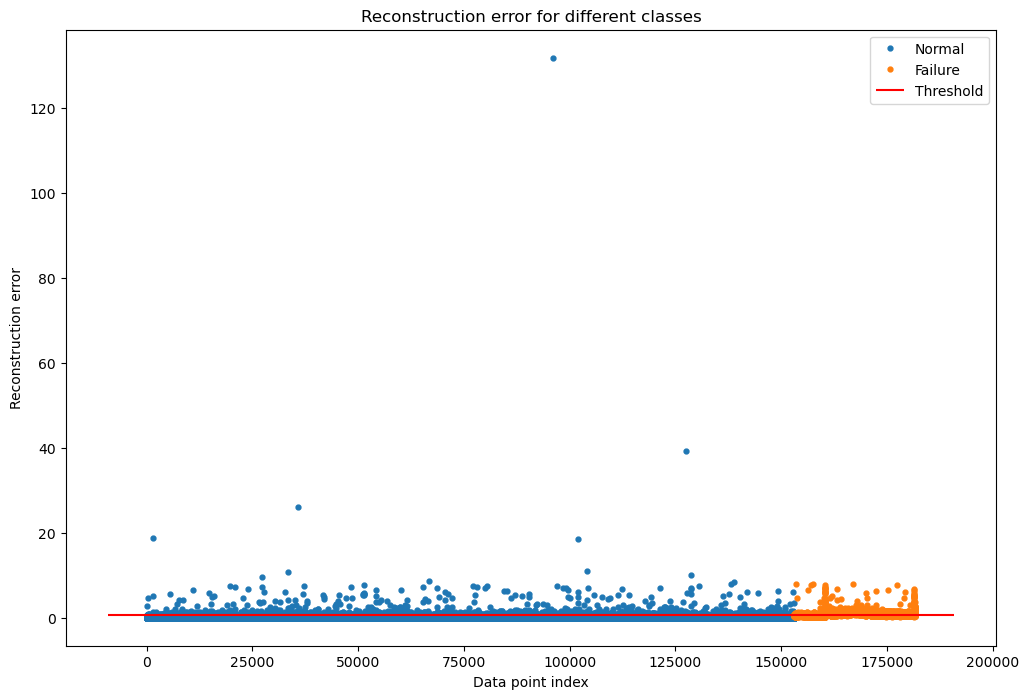

In [71]:
test_x_predictions = lstm_ae.predict(x_test_final_scaled)
mse = np.mean(np.power(flatten(x_test_final_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test_final.tolist()})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

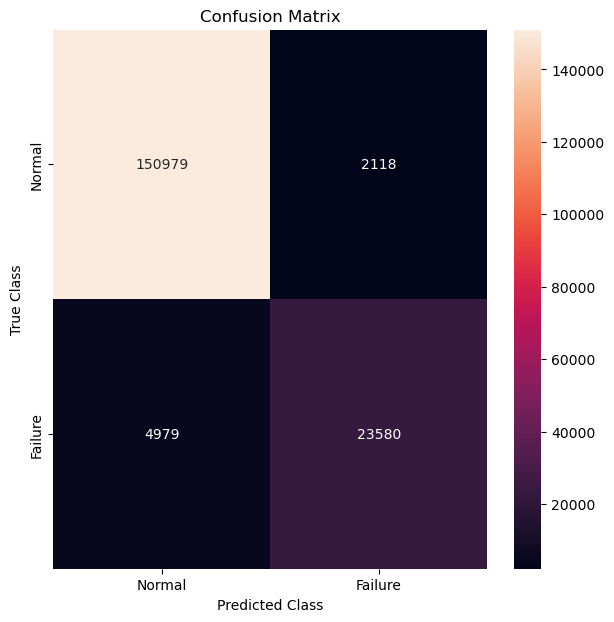

In [72]:
import seaborn as sns

# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

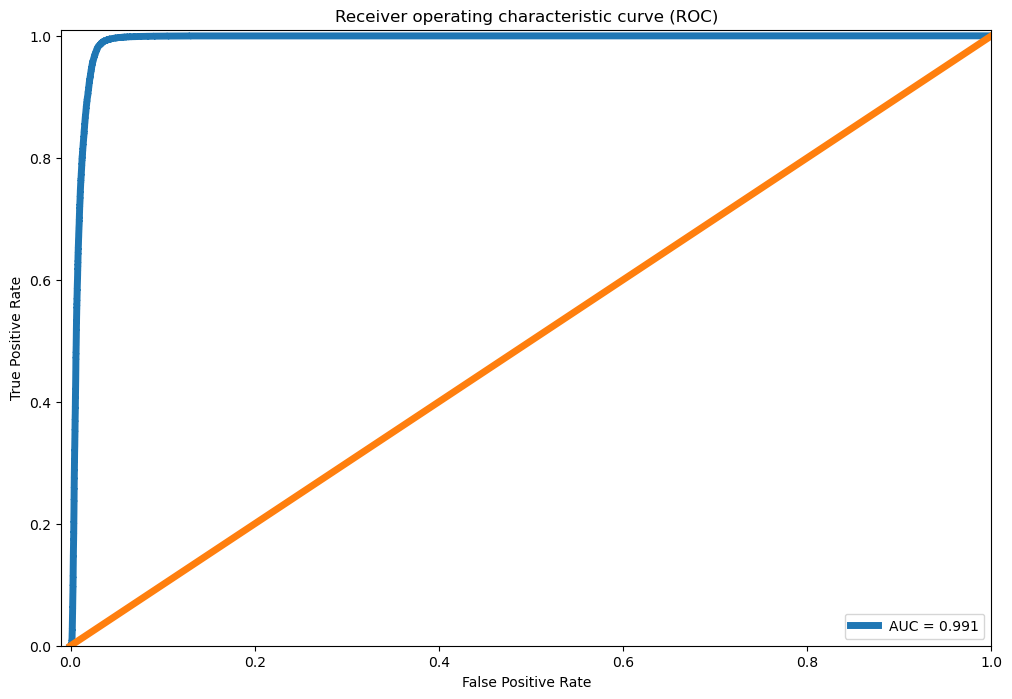

In [73]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(len(x_train_y0))
print(len(x_train_y1))
print(len(x_valid_y0))
print(len(x_valid_y1))
print(len(x_test))
# print(len(x_test_y0))
print(len(x_test_y1))

In [ ]:
from collections import Counter
Counter(y_valid)

---

In [5]:
from collections import Counter
Counter(sand_data['y'])

Counter({0: 772633, 1: 50059})

In [6]:
sign = lambda x: (1, -1)[x < 0]
def curve_shift(df, shift_by):
	vector = sand_data['y'].copy()
	for s in range(abs(shift_by)):
		tmp = vector.shift(sign(shift_by))
		tmp = tmp.fillna(0)
		vector += tmp
	labelcol = 'y'
	# Add vector to the df
	df.insert(loc=0, column=labelcol+'tmp', value=vector)

	# Remove the rows with labelcol == 1.
	df = df.drop(df[df[labelcol] == 1].index)

	# Drop labelcol and rename the tmp col as labelcol
	df = df.drop(labelcol, axis=1)
	df = df.rename(columns={labelcol+'tmp': labelcol})

	# Make the labelcol binary
	df.loc[df[labelcol] > 0, labelcol] = 1

	return df

In [7]:
shifted_df = curve_shift(sand_data, shift_by=-170000)
shifted_df.head()

y  Time  Q_liq, BPD  P_in, psi  P_out, psi  Horizon DP  Vertical DP  \
0  0.0     1    2593.381     -6.010      20.168      -0.178        0.548   
1  0.0     2    2597.466     -6.014      19.121      -0.165        0.526   
2  0.0     3    2598.315     -6.013      19.462      -0.164        0.512   
3  0.0     4    2594.207     -6.013      19.441      -0.159        0.539   
4  0.0     5    2593.730     -6.014      17.851      -0.158        0.515   

   Acoustic  Motor temp  Vib,motor  Vib, out  Vib, middle  Winding_temp  
0     0.243      25.245      0.042     0.029        0.023        30.141  
1     0.243      25.247      0.042     0.029        0.023        29.400  
2     0.243      25.249      0.041     0.029        0.023        29.745  
3     0.243      25.248      0.042     0.029        0.023        30.159  
4     0.244      25.246      0.041     0.029        0.023        30.066

In [8]:
shifted_df

y    Time  Q_liq, BPD  P_in, psi  P_out, psi  Horizon DP  \
0       0.0       1    2593.381     -6.010      20.168      -0.178   
1       0.0       2    2597.466     -6.014      19.121      -0.165   
2       0.0       3    2598.315     -6.013      19.462      -0.164   
3       0.0       4    2594.207     -6.013      19.441      -0.159   
4       0.0       5    2593.730     -6.014      17.851      -0.158   
...     ...     ...         ...        ...         ...         ...   
772628  1.0  772629    1428.258     -0.145       6.079      -0.087   
772629  1.0  772630    1431.859      0.063       5.716      -0.079   
772630  1.0  772631    1412.790     -0.077       5.735      -0.112   
772631  1.0  772632    1374.021      0.359       4.810      -0.166   
772632  1.0  772633    1328.130      0.565       4.857      -0.212   

        Vertical DP  Acoustic  Motor temp  Vib,motor  Vib, out  Vib, middle  \
0             0.548     0.243      25.245      0.042     0.029        0.023   
1             0.526     0.243      25.247      0.042     0.029        0.023   
2             0.512     0.243      25.249      0.041     0.029        0.023   
3             0.539     0.243      25.248      0.042     0.029        0.023   
4             0.515     0.244      25.246      0.041     0.029        0.023   
...             ...       ...         ...        ...       ...          ...   
772628        1.439     0.247      40.678      0.044     0.044        0.025   
772629        1.438     0.247      40.680      0.060     0.044        0.026   
772630        1.440     0.247      40.680      0.051     0.045        0.025   
772631        1.462     0.247      40.679      0.031     0.045        0.026   
772632        1.479     0.247      40.575      0.029     0.045        0.025   

        Winding_temp  
0             30.141  
1             29.400  
2             29.745  
3             30.159  
4             30.066  
...              ...  
772628        52.367  
772629        52.421  
772630        51.981  
772631        51.974  
772632        52.106  

[772633 rows x 13 columns]

In [9]:
# x, y
#input_x = shifted_df.drop('y', axis=1)
input_x = shifted_df.drop(['Time', 'y'], axis = 1).values
input_y = shifted_df['y'].values

n_features = input_x.shape[1]

In [10]:
n_features

11

In [11]:
input_x

array([[ 2.593381e+03, -6.010000e+00,  2.016800e+01, ...,  2.900000e-02,
         2.300000e-02,  3.014100e+01],
       [ 2.597466e+03, -6.014000e+00,  1.912100e+01, ...,  2.900000e-02,
         2.300000e-02,  2.940000e+01],
       [ 2.598315e+03, -6.013000e+00,  1.946200e+01, ...,  2.900000e-02,
         2.300000e-02,  2.974500e+01],
       ...,
       [ 1.412790e+03, -7.700000e-02,  5.735000e+00, ...,  4.500000e-02,
         2.500000e-02,  5.198100e+01],
       [ 1.374021e+03,  3.590000e-01,  4.810000e+00, ...,  4.500000e-02,
         2.600000e-02,  5.197400e+01],
       [ 1.328130e+03,  5.650000e-01,  4.857000e+00, ...,  4.500000e-02,
         2.500000e-02,  5.210600e+01]])

In [12]:
def temporalize(X, y, timesteps):
	output_X = []
	output_y = []
	for i in range(len(X) - timesteps - 1):
		t = []
		for j in range(1, timesteps + 1):
			# Gather the past records upto the lookback period
			t.append(X[[(i + j + 1)], :])
		output_X.append(t)
		output_y.append(y[i + timesteps + 1])
	return np.squeeze(np.array(output_X)), np.array(output_y)
timesteps = 5

# Temporalize
x, y = temporalize(input_x, input_y, timesteps)
print(x.shape) # (772602, 30, 16)

(772627, 5, 11)


In [13]:
input_x.shape

(772633, 11)

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train, valid, and test 
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = seed)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state = seed)

print(len(x_train))  # 11691
print(len(x_valid))  # 2923
print(len(x_test))   # 3654

In [ ]:
# For training the autoencoder, split 0 / 1
x_train_y0 = x_train[y_train == 0]
x_train_y1 = x_train[y_train == 1]

x_valid_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]
x_test_y0 = x_test[y_test == 0]
x_test_y1 = x_test[y_test == 1]

In [34]:
print(len(x_test_y1))

34011


In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X
scaler = RobustScaler().fit(flatten(x_train_y0))

x_train_y0_scaled = scale(x_train_y0, scaler)
x_valid_scaled = scale(x_valid, scaler)
x_valid_y0_scaled = scale(x_valid_y0, scaler)
x_test_scaled = scale(x_test, scaler)

In [17]:
from tensorflow.keras import Model, models, layers, optimizers, regularizers

epochs = 300
batch = 32
lr = 0.001
# 학습률은 0.00001 부터 10씩 곱해가면서 하고 배치사이즈는 32가 이상적인 숫자라함. 이에 대한 근거를 대던지, 나중에
# 그리드 서칭을 하던지 해야할듯.
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(16, activation='relu', input_shape=(timesteps, n_features), return_sequences=True)) # what is n_feature ?
lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=False))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
#lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(8, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
#lstm_ae.add(layers.LSTM(128, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 16)             1792      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 8)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 8)              544       
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 16)             1600      
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 11)             187       
Total params: 4,923
Trainable params: 4,923
Non-trainable params: 0
______________________________________________________

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# compile
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
# fit
history = lstm_ae.fit(x_train_y0_scaled, x_train_y0_scaled,
                     epochs=epochs, batch_size=batch, callbacks = callbacks,
                     validation_data=(x_valid_y0_scaled, x_valid_y0_scaled))

Epoch 1/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0681 - val_loss: 0.0352
Epoch 2/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0439 - val_loss: 0.0326
Epoch 3/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0423 - val_loss: 0.0338
Epoch 4/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0454 - val_loss: 0.0321
Epoch 5/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0414 - val_loss: 0.0319
Epoch 6/300
12052/12052 [==============================] - 39s 3ms/step - loss: 0.0421 - val_loss: 0.0309
Epoch 7/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0398 - val_loss: 0.0304
Epoch 8/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0393 - val_loss: 0.0315
Epoch 9/300
12052/12052 [==============================] - 38s 3ms/step - loss: 0.0406 - val_loss: 0.0304
Epoch 10/300
12052/12052 [====================

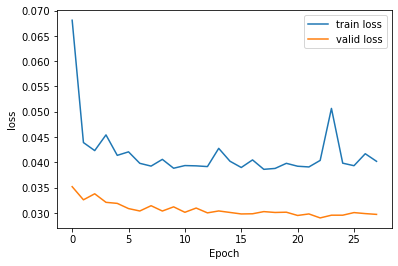

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

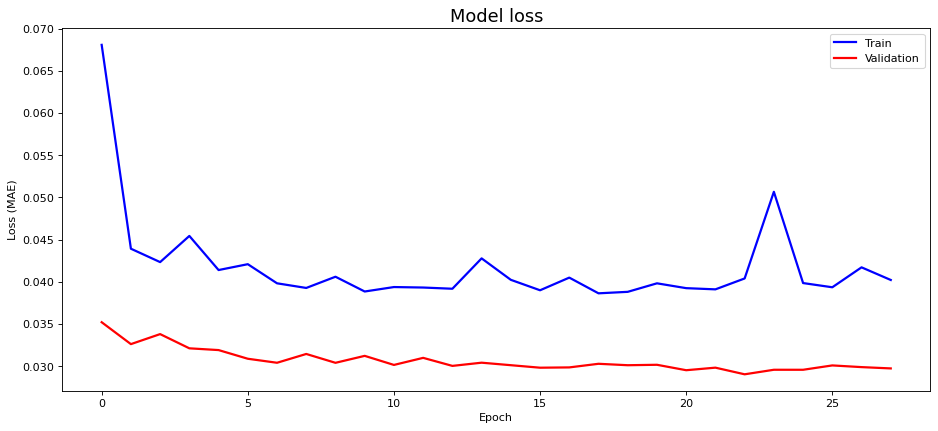

In [20]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history.history['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(history.history['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

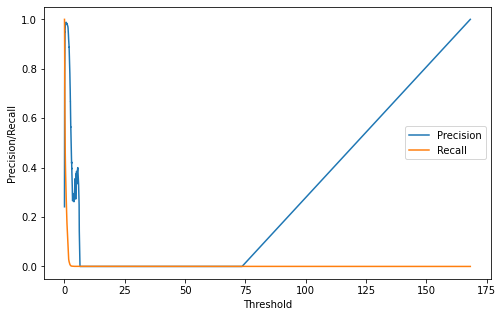

In [21]:
from sklearn import metrics

valid_x_predictions = lstm_ae.predict(x_valid_scaled)
mse = np.mean(np.power(flatten(x_valid_scaled) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error':mse, 
                         'True_class':list(y_valid)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [22]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.7967949898692208 , recall:  0.7967949898692208
threshold:  0.09419194238893454


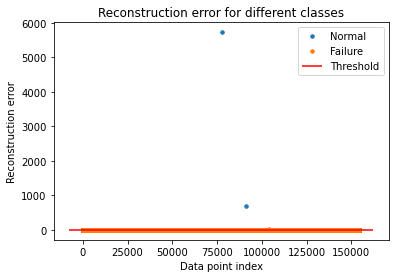

In [23]:
test_x_predictions = lstm_ae.predict(x_test_scaled)
mse = np.mean(np.power(flatten(x_test_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test.tolist()})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

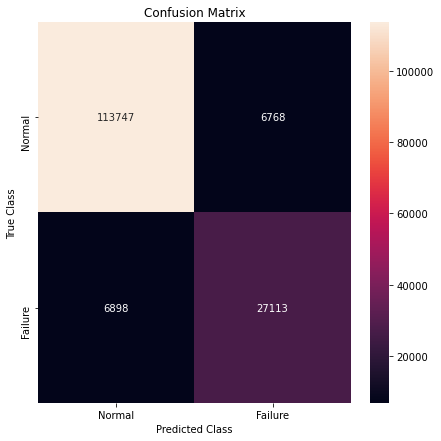

In [24]:
import seaborn as sns

# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

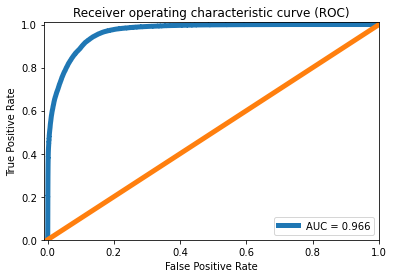

In [25]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [52]:
pred_y[-5:]  # [0, 0, 1, 0, 0]

[0, 0, 0, 0, 0]

In [3]:
# 1st sp_data = sp[['Date', 'Pin, psi', 'Pdis, psi', 'L_sep, in', 'P_sep, psi', 'Acoustic', 'T_m_suf', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs', 
#               'T_bearing', 'T_winding', 'label']]
sand_data = sand[['Source.Name', 'Q_liq, BPD', 'P_in, psi', 'P_out, psi', 'T_fiber1, C', 'T_fiber2, C', 'DP_fiber', 
                  'Horizon DP','Vertical DP', 'Acoustic', 'Motor temp', 'Vib,motor', 'Vib, out', 
               'Gas_Temp', 'Vib, middle', 'Fluid_temp', 'Winding_temp']]
sand_data


Source.Name  Q_liq, BPD  P_in, psi  P_out, psi  \
0            07182022_sand test    2593.381     -6.010      20.168   
1            07182022_sand test    2597.466     -6.014      19.121   
2            07182022_sand test    2598.315     -6.013      19.462   
3            07182022_sand test    2594.207     -6.013      19.441   
4            07182022_sand test    2593.730     -6.014      17.851   
...                         ...         ...        ...         ...   
822687  09302022_sand test_1506    1161.851      0.506       5.598   
822688  09302022_sand test_1506    1173.274      0.501       5.714   
822689  09302022_sand test_1506    1179.460      0.637       5.312   
822690  09302022_sand test_1506    1175.660      0.498       5.118   
822691  09302022_sand test_1506    1159.356      0.926       4.487   

        T_fiber1, C  T_fiber2, C  DP_fiber  Horizon DP  Vertical DP  Acoustic  \
0            24.065       23.964     0.003      -0.178        0.548     0.243   
1            24.065       23.968     0.000      -0.165        0.526     0.243   
2            24.069       23.968     0.004      -0.164        0.512     0.243   
3            24.066       23.969     0.002      -0.159        0.539     0.243   
4            24.075       23.976     0.002      -0.158        0.515     0.244   
...             ...          ...       ...         ...          ...       ...   
822687       24.364       24.394     0.002      -0.617        0.029     0.247   
822688       24.373       24.391    -0.001      -0.639        0.099     0.247   
822689       24.362       24.389     0.009      -0.659        0.181     0.247   
822690       24.362       24.394     0.003      -0.676        0.282     0.247   
822691       24.358       24.398     0.005      -0.753        0.498     0.247   

        Motor temp  Vib,motor  Vib, out  Gas_Temp  Vib, middle  Fluid_temp  \
0           25.245      0.042     0.029    18.410        0.023      19.455   
1           25.247      0.042     0.029    18.409        0.023      19.458   
2           25.249      0.041     0.029    18.409        0.023      19.556   
3           25.248      0.042     0.029    18.407        0.023      19.511   
4           25.246      0.041     0.029    18.412        0.023      19.453   
...            ...        ...       ...       ...          ...         ...   
822687      22.634      0.049     0.031     6.443        0.021      20.344   
822688      22.634      0.049     0.031     9.582        0.020      20.355   
822689      22.632      0.049     0.029     0.028        0.021      20.345   
822690      22.635      0.048     0.031     9.474        0.020      20.347   
822691      22.635      0.049     0.031     0.005        0.020      20.341   

        Winding_temp  
0             30.141  
1             29.400  
2             29.745  
3             30.159  
4             30.066  
...              ...  
822687        23.741  
822688        23.843  
822689        23.553  
822690        23.868  
822691        23.496  

[822692 rows x 17 columns]

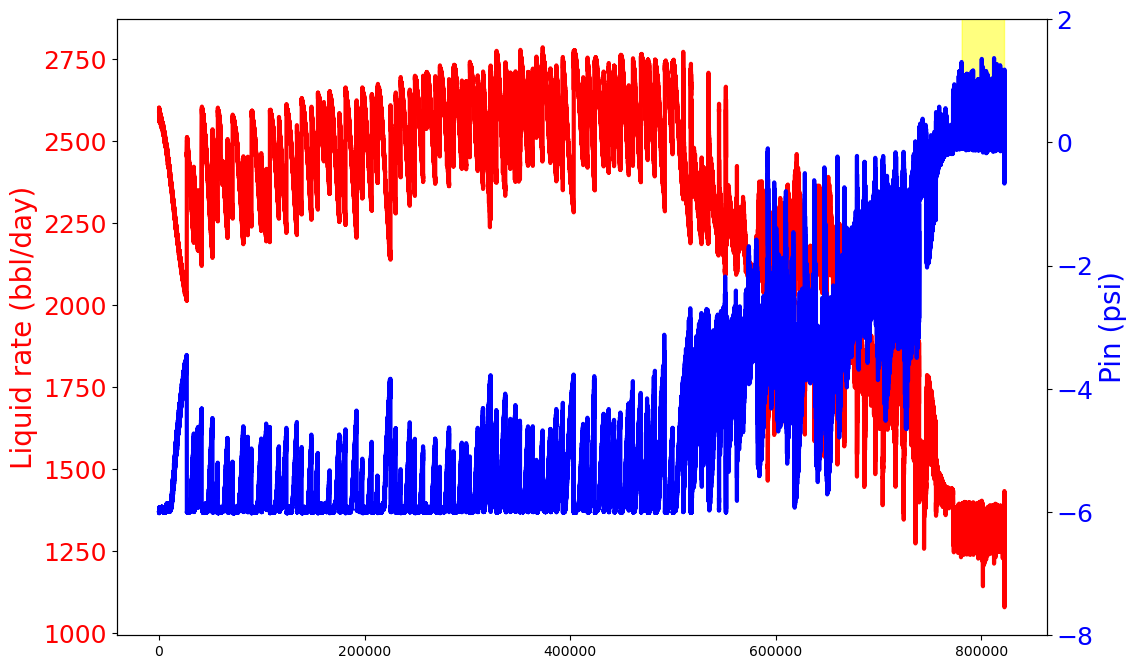

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Time']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['P_in, psi']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Pin (psi)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
ax2.set_ylim([-8, 2])



# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])

plt.fill_between(x[781557:], y[781557:], color = 'yellow',alpha = .5)
plt.show()




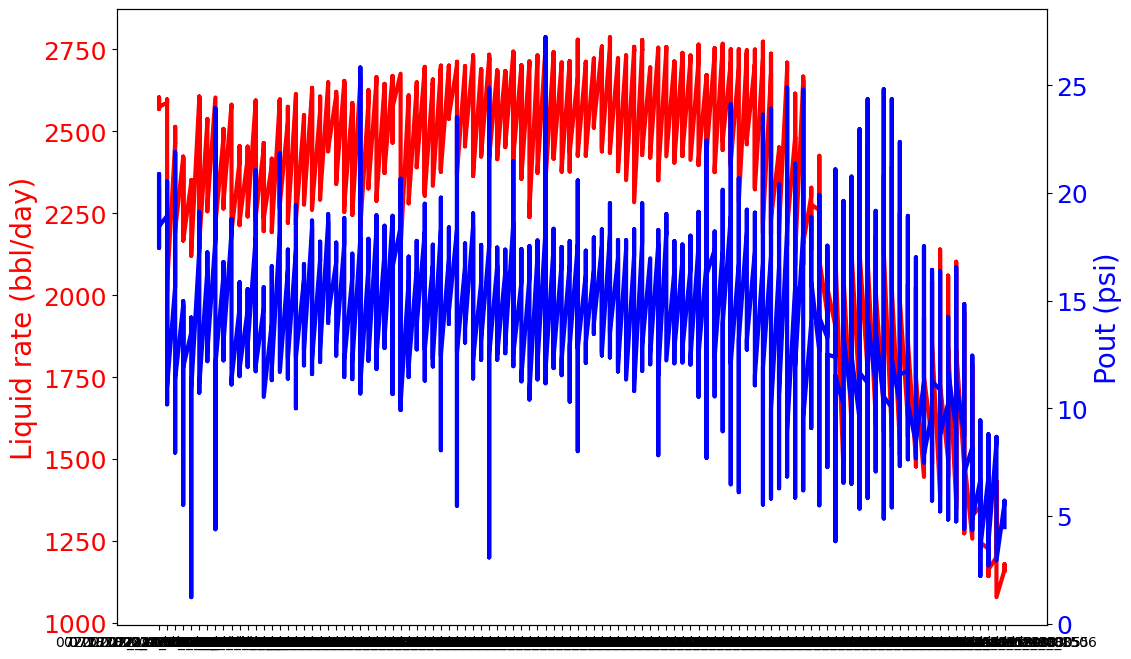

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['P_out, psi']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Pout (psi)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18,labelcolor = "blue")
#ax2.set_ylim([0, 60])



# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




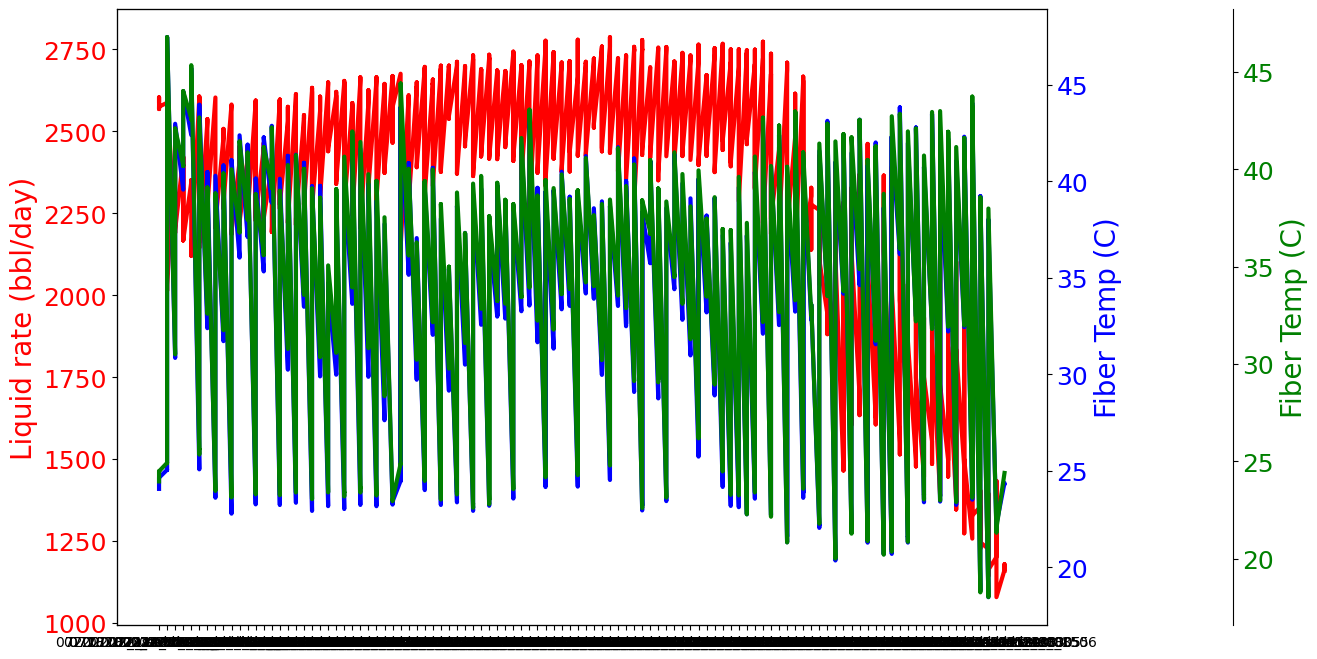

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['T_fiber1, C']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Fiber Temp (C)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18,labelcolor = "blue")
#ax2.set_ylim([0, 700])

y3 = sand_data['T_fiber2, C']
ax3 = ax1.twinx()
ax3.plot(x, y3, color = 'green', linewidth = 3)
ax3.set_ylabel('Fiber Temp (C)', fontsize = 20, color = 'green')
ax3.tick_params(axis = 'y', labelsize = 18,labelcolor = 'green')
ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




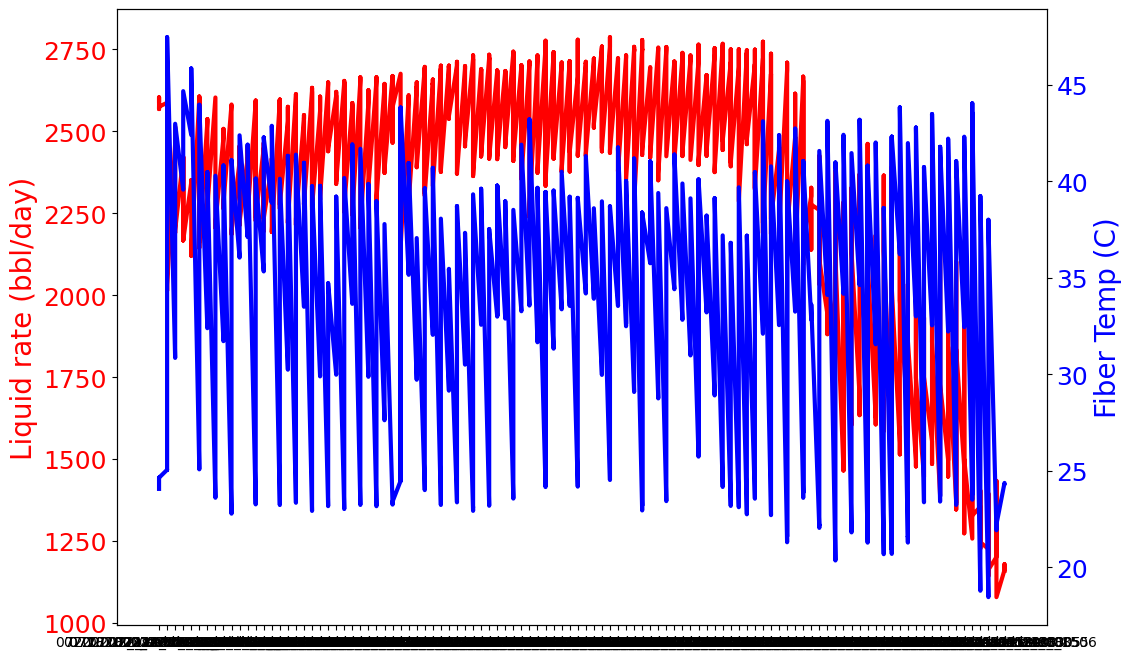

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['T_fiber1, C']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Fiber Temp (C)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18,labelcolor = "blue")
#ax2.set_ylim([0, 700])

# y3 = sand_data['T_fiber2, C']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green', linewidth = 3)
# ax3.set_ylabel('Fiber Temp (C)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelsize = 18,labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




### fiber temperature 1,2 는 하나로 하는게 좋을듯. 둘의 추세가 너무 유사함
#### 두번째가 없앤 버전임

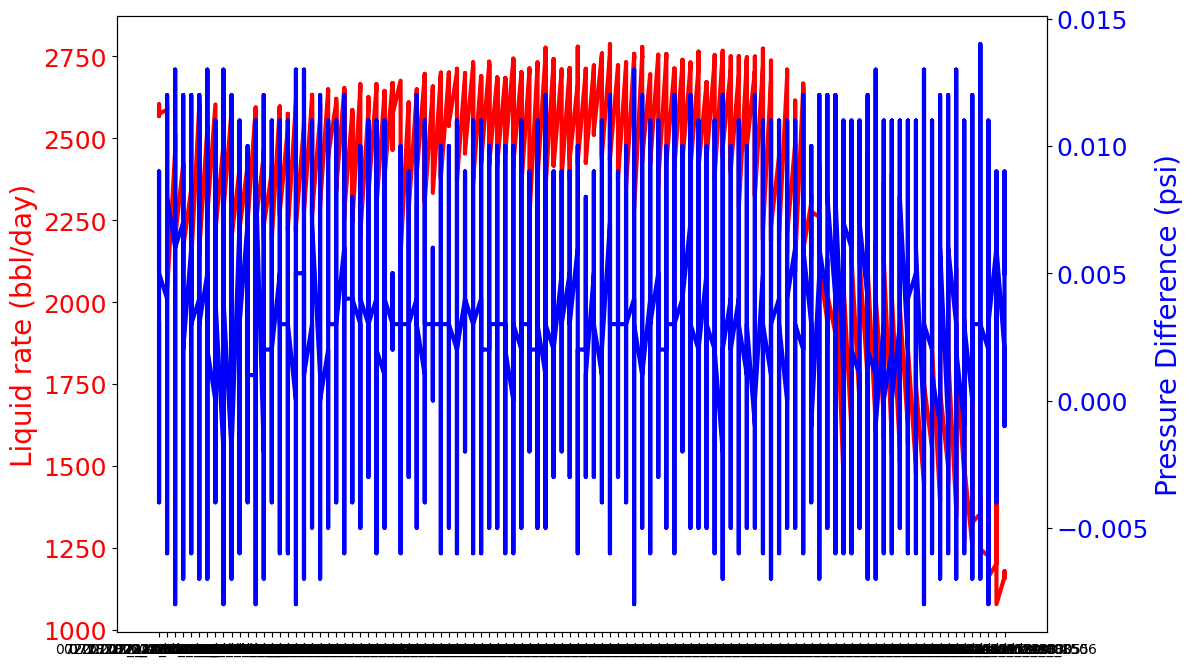

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['DP_fiber']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Pressure Difference (psi)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

# y3 = sand_data['T_fiber2, C']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green')
# ax3.set_ylabel('Fiber Temp (C)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




### 그래프 해석 방법을 봐야될듯..? 그게 안되면 쓸모없는 데이터가 될듯

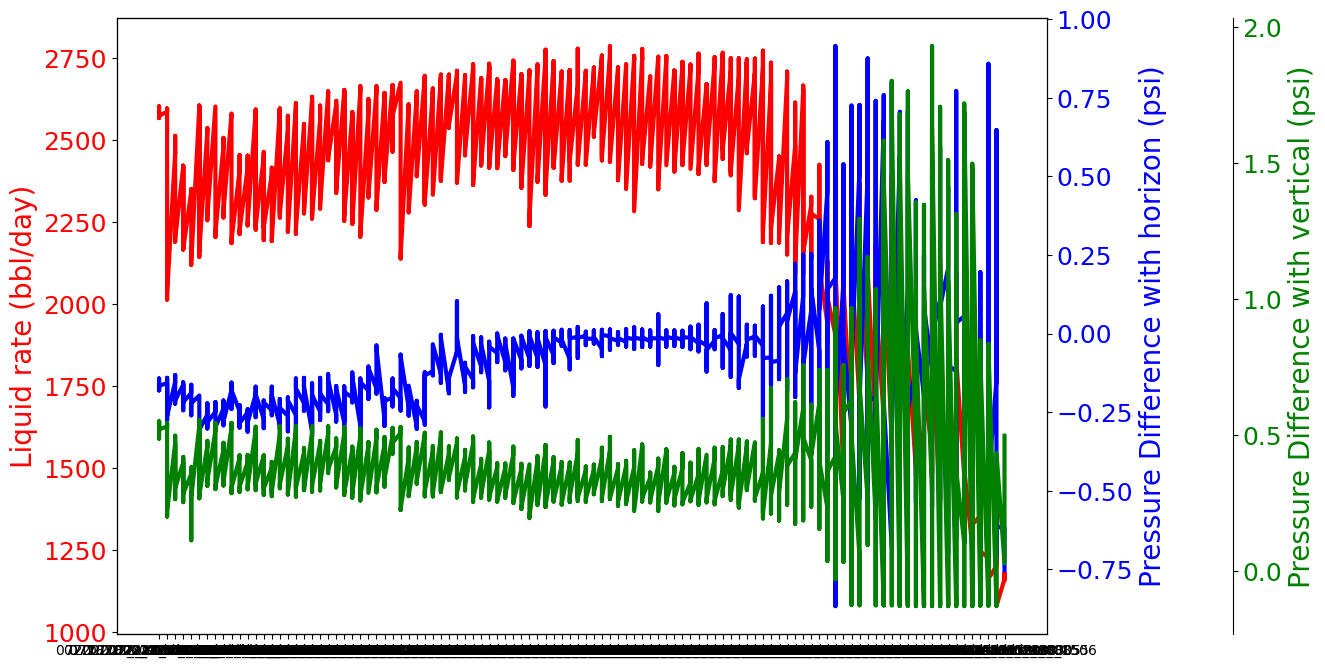

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Horizon DP']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Pressure Difference with horizon (psi)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

y3 = sand_data['Vertical DP']
ax3 = ax1.twinx()
ax3.plot(x, y3, color = 'green', linewidth = 3)
ax3.set_ylabel('Pressure Difference with vertical (psi)', fontsize = 20, color = 'green')
ax3.tick_params(axis = 'y', labelsize =18, labelcolor = 'green')
ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Acoustic']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Acoustic', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

# y3 = sand_data['Motor temp']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green', linewidth = 3)
# ax3.set_ylabel('Motor Temp (C)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




### 1005 에 1.244 - 1.516 - 0.968 로 3포인트 높아졌음
### 엑셀에서는 828107행

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Motor temp']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Motor temperature (C)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

# y3 = sand_data['Motor temp']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green', linewidth = 3)
# ax3.set_ylabel('Motor Temp (C)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Vib,motor']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Vibration of Motor (G)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 0.14])

y3 = sand_data['Vib, out']
ax3 = ax1.twinx()
ax3.plot(x, y3, color = 'green', linewidth = 3)
ax3.set_ylabel('Vibration of out (G)', fontsize = 20, color = 'green')
ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
ax3.spines["right"].set_position(("axes", 1.2))
#ax3.set_ylim([0, 0.1])

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




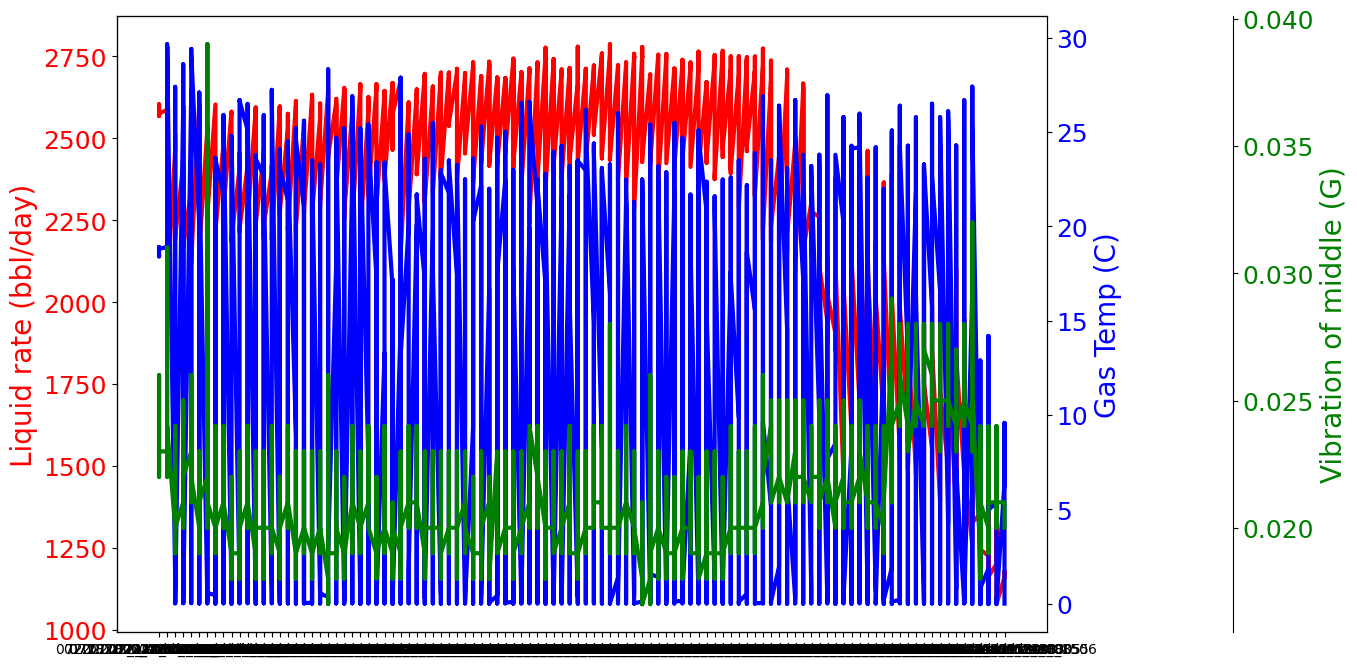

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Gas_Temp']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Gas Temp (C)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

y3 = sand_data['Vib, middle']
ax3 = ax1.twinx()
ax3.plot(x, y3, color = 'green', linewidth = 3)
ax3.set_ylabel('Vibration of middle (G)', fontsize = 20, color = 'green')
ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




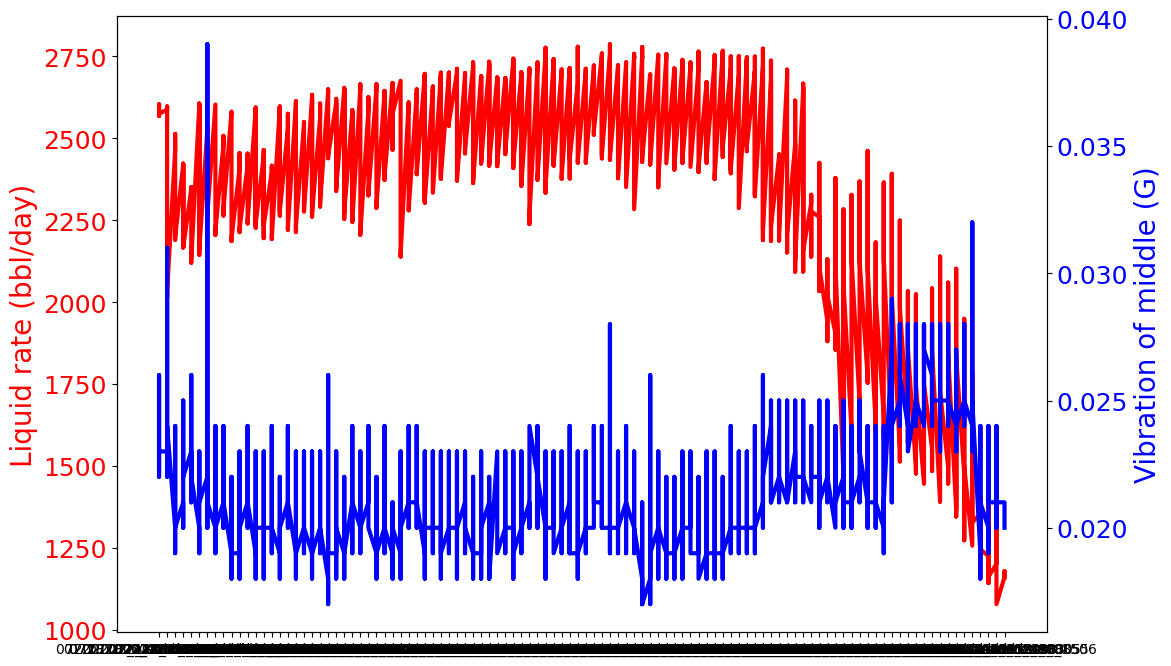

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Vib, middle']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Vibration of middle (G)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
#ax2.set_ylim([0, 700])

# y3 = sand_data['Vib, middle']
# ax3 = ax1.twinx()
# ax3.plot(x, y3, color = 'green', linewidth = 3)
# ax3.set_ylabel('Vibration of middle (G)', fontsize = 20, color = 'green')
# ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
# ax3.spines["right"].set_position(("axes", 1.2))

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




### Gas Temp to remove.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12,8)


x = sand_data['Source.Name']
#xlabels = sp_data['Data'].apply(lambda x: x[5:]).to_list()
y = sand_data['Q_liq, BPD']

fig, ax1 = plt.subplots()
ax1.plot(x, y, color = "red", linewidth = 3)
ax1.tick_params(axis = 'y', labelsize = 18, labelcolor = "red")
ax1.set_ylabel('Liquid rate (bbl/day)', fontsize = 20, color = 'red')
#ax1.set_ylim([0, 14])
# ax1.set_xticklabels(labels = ['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'], rotation =90)



y2 = sand_data['Fluid_temp']
ax2 = ax1.twinx()
ax2.plot(x, y2, color = "blue", linewidth = 3)
ax2.set_ylabel('Fluid Temp (C)', fontsize = 20, color = 'blue')
ax2.tick_params(axis = 'y', labelsize = 18, labelcolor = "blue")
ax2.set_ylim([0, 80])

y3 = sand_data['Winding_temp']
ax3 = ax1.twinx()
ax3.plot(x, y3, color = 'green', linewidth = 3)
ax3.set_ylabel('Winding Temp (C)', fontsize = 20, color = 'green')
ax3.tick_params(axis = 'y', labelsize = 18, labelcolor = 'green')
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylim([0, 80])

# plt.xticks(['2021-03-19','2021-03-29','2021-04-18','2021-04-27','2021-05-04','2021-05-18','2021-05-25','2021-06-02',
#             '2021-06-17', '2021-08-24','2021-09-21','2021-09-27','2021-10-04', '2021-10-11','2021-10-31','2021-11-09',
#             '2021-11-16','2021-11-22','2021-11-29','2021-12-06','2021-12-12','2021-12-19','2022-01-01', '2022-01-09',
#             '2022-01-16','2022-01-23', '2022-01-29', '2022-02-02'])


plt.show()




### Fluid Temperature 도 제외..?

In [52]:
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
# 1st f_data = sp_data[['Pin, psi', 'Pdis, psi', 'Acoustic', 'T_m_suf', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs', 'T_bearing', 'T_winding']]
# f_data = sp_data[['Q_l, BPD', 'Pin, psi', 'Pdis, psi', 'Acoustic', 'T_m_suf',  'V_m gmrs', 'T_winding']] # 'V_o, gmrs',
# f_data = sp_data[['Q_l, BPD', 'Pin, psi', 'Pdis, psi', 'L_sep, in', 'P_sep, psi', 'DP_h, psi', 
#                   'DP_v, psi', 'Acoustic', 'T_m_suf','V_o, gmrs', 'V_m gmrs', 'T_winding']] # 
# sand_data = sand[['Source.Name', 'Q_liq, BPD', 'P_in, psi', 'P_out, psi', 'T_fiber1, C', 'T_fiber2, C', 'DP_fiber', 
#                   'Horizon DP','Vertical DP', 'Acoustic', 'Motor temp', 'Vib,motor', 'Vib, out', 
#                'Gas_Temp', 'Vib, middle', 'Fluid_temp', 'Winding_temp']]         


f_data = sand_data[['Q_liq, BPD', 'P_in, psi', 'P_out, psi', 'T_fiber1, C', 'DP_fiber', 
                  'Horizon DP','Vertical DP', 'Acoustic', 'Motor temp', 'Vib,motor', 'Vib, out', 
               'Gas_Temp', 'Vib, middle', 'Fluid_temp', 'Winding_temp']] # ,
f_data.corr()

Q_liq, BPD  P_in, psi  P_out, psi  T_fiber1, C  DP_fiber  \
Q_liq, BPD      1.000000  -0.965780    0.873565    -0.185713  0.002147   
P_in, psi      -0.965780   1.000000   -0.856107     0.142428 -0.002287   
P_out, psi      0.873565  -0.856107    1.000000    -0.384604 -0.001337   
T_fiber1, C    -0.185713   0.142428   -0.384604     1.000000  0.028572   
DP_fiber        0.002147  -0.002287   -0.001337     0.028572  1.000000   
Horizon DP      0.087348   0.066051    0.024789    -0.035450 -0.000708   
Vertical DP    -0.279194   0.294257   -0.173497     0.225627  0.000618   
Acoustic        0.047594  -0.039457   -0.005538     0.148326 -0.011145   
Motor temp     -0.064577   0.015433   -0.262659     0.945353  0.028588   
Vib,motor      -0.191925   0.191379   -0.128199    -0.089155  0.005855   
Vib, out       -0.365668   0.330951   -0.410559     0.813882  0.043721   
Gas_Temp        0.076649  -0.096933    0.060351     0.197907  0.013290   
Vib, middle    -0.536878   0.534936   -0.353124     0.250561  0.024739   
Fluid_temp     -0.144108   0.153169   -0.361458     0.782997  0.005114   
Winding_temp   -0.032543  -0.014475   -0.240168     0.932714  0.023992   

              Horizon DP  Vertical DP  Acoustic  Motor temp  Vib,motor  \
Q_liq, BPD      0.087348    -0.279194  0.047594   -0.064577  -0.191925   
P_in, psi       0.066051     0.294257 -0.039457    0.015433   0.191379   
P_out, psi      0.024789    -0.173497 -0.005538   -0.262659  -0.128199   
T_fiber1, C    -0.035450     0.225627  0.148326    0.945353  -0.089155   
DP_fiber       -0.000708     0.000618 -0.011145    0.028588   0.005855   
Horizon DP      1.000000    -0.018557  0.059624   -0.082996   0.019167   
Vertical DP    -0.018557     1.000000  0.011718    0.164116  -0.199042   
Acoustic        0.059624     0.011718  1.000000    0.149501  -0.124002   
Motor temp     -0.082996     0.164116  0.149501    1.000000  -0.092097   
Vib,motor       0.019167    -0.199042 -0.124002   -0.092097   1.000000   
Vib, out       -0.018865     0.304283  0.014673    0.744626   0.067586   
Gas_Temp       -0.030969     0.032884 -0.004829    0.203996  -0.006539   
Vib, middle     0.063938     0.419064 -0.027790    0.184561   0.202981   
Fluid_temp      0.119694     0.251002  0.194891    0.737989  -0.170997   
Winding_temp   -0.065259     0.160694  0.157384    0.984343  -0.113084   

              Vib, out  Gas_Temp  Vib, middle  Fluid_temp  Winding_temp  
Q_liq, BPD   -0.365668  0.076649    -0.536878   -0.144108     -0.032543  
P_in, psi     0.330951 -0.096933     0.534936    0.153169     -0.014475  
P_out, psi   -0.410559  0.060351    -0.353124   -0.361458     -0.240168  
T_fiber1, C   0.813882  0.197907     0.250561    0.782997      0.932714  
DP_fiber      0.043721  0.013290     0.024739    0.005114      0.023992  
Horizon DP   -0.018865 -0.030969     0.063938    0.119694     -0.065259  
Vertical DP   0.304283  0.032884     0.419064    0.251002      0.160694  
Acoustic      0.014673 -0.004829    -0.027790    0.194891      0.157384  
Motor temp    0.744626  0.203996     0.184561    0.737989      0.984343  
Vib,motor     0.067586 -0.006539     0.202981   -0.170997     -0.113084  
Vib, out      1.000000  0.213506     0.575665    0.455927      0.688484  
Gas_Temp      0.213506  1.000000     0.115868    0.019781      0.199939  
Vib, middle   0.575665  0.115868     1.000000    0.011864      0.157942  
Fluid_temp    0.455927  0.019781     0.011864    1.000000      0.769005  
Winding_temp  0.688484  0.199939     0.157942    0.769005      1.000000

/var/folders/3g/t8ql49w96kbb76s54jtkfqtr0000gn/T/ipykernel_18800/2560438315.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(sand_data.corr(), dtype = np.bool)


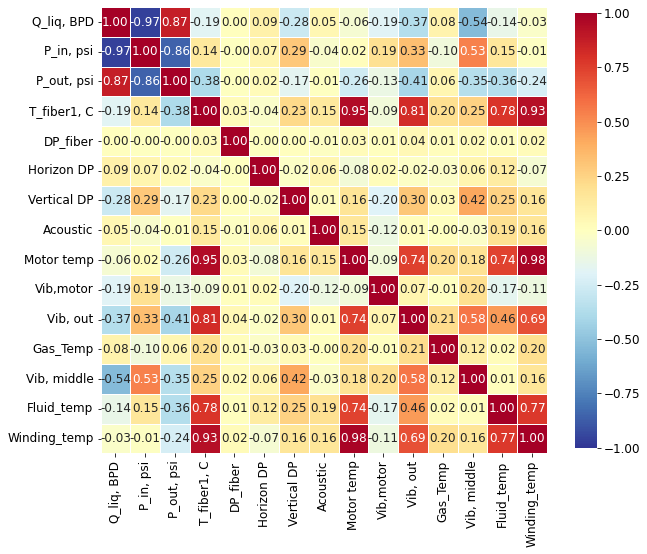

In [54]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,10))

mask = np.zeros_like(sand_data.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
#sns.heatmap(df, cmap = 'RdYlBu_r', annot = True, mask = mask, linewidths = .5, cbar_kws= {"shrink": .5}, vmin = -1, vmax = 1)
sns.heatmap(f_data.corr(), cmap = 'RdYlBu_r', annot = True, fmt = '.2f', annot_kws={'size' : 12}, square = True, 
            linewidths = 1, cbar_kws= {"shrink": .8}, vmin = -1, vmax = 1)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1st features = ['Pin, psi','Pdis, psi', 'Acoustic', 'T_m_suf', 'V_in, gmrs', 'V_o, gmrs','V_m gmrs','T_bearing', 'T_winding']
# features = ['Q_l, BPD', 'Pin, psi','Pdis, psi', 'L_sep, in', 'P_sep, psi', 'DP_h, psi', 
#             'DP_v, psi','Acoustic', 'T_m_suf', 'V_o, gmrs', 'V_m gmrs', 'T_winding'] # 'T_bearing'
            
features = ['Q_liq, BPD', 'P_in, psi', 'P_out, psi', 'T_fiber1, C', 'DP_fiber', 
                  'Horizon DP','Vertical DP', 'Acoustic', 'Motor temp', 'Vib,motor', 'Vib, out', 
               'Gas_Temp', 'Vib, middle', 'Fluid_temp', 'Winding_temp'] # 'T_bearing',
          
# Separating out the features
x = sand_data.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x = MinMaxScaler().fit_transform(x)
# x_df = pd.DataFrame(x)
# x_df.describe()
x_df = pd.DataFrame(x)
x_df.describe()


0              1              2              3   \
count  831266.000000  831266.000000  831266.000000  831266.000000   
mean        0.807950       0.193834       0.107210       0.551352   
std         0.154171       0.223377       0.021646       0.192233   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.754214       0.011317       0.099528       0.424472   
50%         0.854663       0.102851       0.110473       0.585208   
75%         0.916329       0.305226       0.121806       0.693203   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  831266.000000  831266.000000  831266.000000  831266.000000   
mean        0.492192       0.449446       0.283472       0.015781   
std         0.103025       0.058532       0.140485       0.002711   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.454545       0.401970       0.216334       0.014729   
50%         0.500000       0.457786       0.247934       0.015504   
75%         0.545455       0.492026       0.297035       0.016279   
max         1.000000       1.000000       1.000000       1.000000   

                  8              9              10             11  \
count  831266.000000  831266.000000  831266.000000  831266.000000   
mean        0.662837       0.098536       0.403178       0.387344   
std         0.152469       0.041310       0.149873       0.329919   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.601441       0.086449       0.285714       0.017928   
50%         0.697362       0.095794       0.400000       0.399663   
75%         0.761617       0.105140       0.485714       0.706655   
max         1.000000       1.000000       1.000000       1.000000   

                  12             13             14  
count  831266.000000  831266.000000  831266.000000  
mean        0.178086       0.653031       0.718584  
std         0.088198       0.225987       0.157717  
min         0.000000       0.000000       0.000000  
25%         0.136364       0.524818       0.660712  
50%         0.136364       0.709875       0.760092  
75%         0.227273       0.829423       0.823278  
max         1.000000       1.000000       1.000000

In [33]:
from sklearn.decomposition import PCA
b = sand_data['label']
pca2 = PCA(n_components=2)
pca2D = pca2.fit_transform(x)
principalDf = pd.DataFrame(data = pca2D, columns = ['principal component 1', 'principal component 2'])
principalDf
pca2.explained_variance_ratio_

KeyError: 'label'

In [ ]:
cumsum = np.cumsum(pca2.explained_variance_ratio_)
cumsum[1]

0.6280266983101939

No handles with labels found to put in legend.


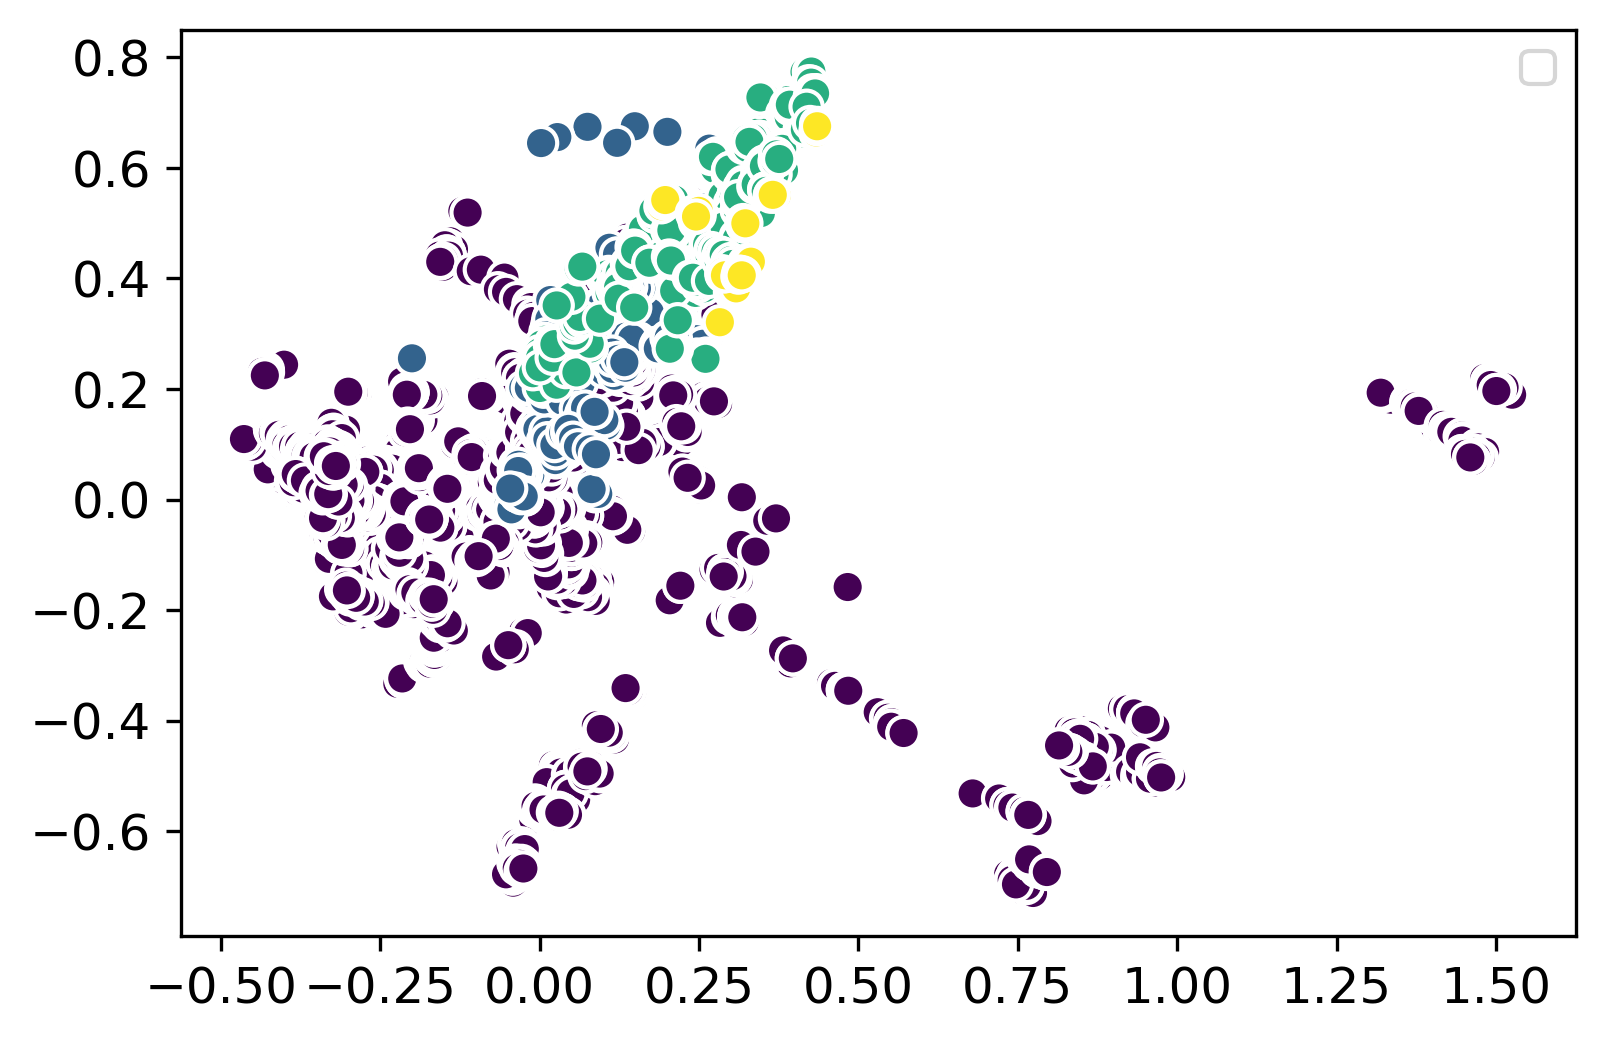

In [ ]:
pca2_label = np.c_[pca2D, b]
df2D = pd.DataFrame(pca2_label, columns = ['PC1', 'PC2', 'label'])
plt.figure(dpi=300)
plt.scatter(x = df2D['PC1'], y = df2D['PC2'], c = df2D['label'], s=60, edgecolor = 'white')
plt.legend(loc = 'best')

In [ ]:
principalDf

principal component 1  principal component 2
0                   1.421488               0.129653
1                   1.411630               0.136356
2                   1.411630               0.136356
3                   1.432828               0.124191
4                   1.432828               0.124191
...                      ...                    ...
11555               0.243422               0.516618
11556               0.243139               0.519444
11557               0.246305               0.516253
11558               0.249674               0.522275
11559               0.245269               0.512102

[11560 rows x 2 columns]

In [ ]:
pca3 = PCA(n_components=3)
pca3D = pca3.fit_transform(x)
principalDf = pd.DataFrame(data = pca3D, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf
pca3.explained_variance_ratio_
# plt.scatter(pca3D[:, 0], pca3D[:, 1], pca3D[:, 2])
pca3_label = np.c_[pca3D, b]
df3D = pd.DataFrame(pca3_label, columns = ['PC1', 'PC2', 'PC3', 'label'])
# plt.scatter(x = df3D['PC1'], y = df3D['PC2'], zs = df3D['PC3'], c = df3D['label'], s=60, edgecolor = 'white')
df3D
pca3.explained_variance_ratio_

array([0.43220086, 0.19582584, 0.13985384])

In [ ]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

7

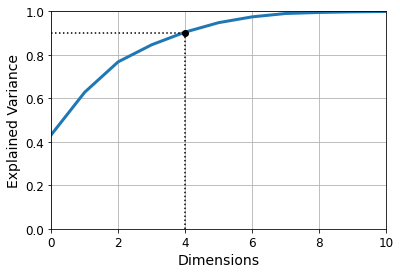

In [ ]:
# plt.plot(cumsum, linewidth=3)
# plt.plot(sizes, times_pca, "r-s", label="PCA")
# plt.xlabel("n_features")
# plt.ylabel("Training time")
# plt.legend(loc="upper left")
# plt.title("PCA and Randomized PCA time complexity ")
# plt.show()

# plt.figure(figsize=(10,10))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([4, 4], [0, 0.9], "k:")
plt.plot([0, 4], [0.9, 0.9], "k:")
plt.plot(4, 0.9, "ko")
# plt.plot([d, d], [0, 0.9], "k:")
# plt.plot([0, d], [0.9, 0.9], "k:")
#plt.plot(d, 0.9, "ko")
#plt.annotate("Elbow", xy=(5, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [ ]:
cumsum3 = np.cumsum(pca3.explained_variance_ratio_)
cumsum3

array([0.43220086, 0.6280267 , 0.76788054])

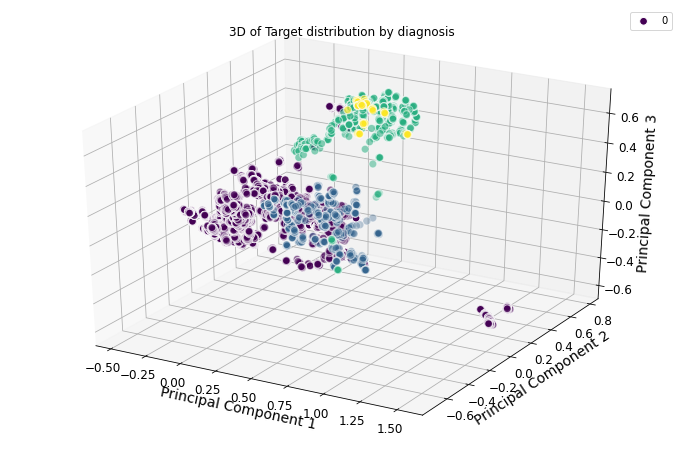

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ("darkorange", "gold", "lawngreen", "lightseagreen")
cmap = ListedColormap(colors[:len(np.unique(b))])
ax.scatter(xs = df3D['PC1'], ys = df3D['PC2'], zs = df3D['PC3'], c = df3D['label'], s=60, edgecolors='white')  
# #ff7f0e 주황/ #1f77b4 기본 파랑/ #2ca02c 초록/ #d62728 빨강/ #9467bd 보라/ #8c564b 브라운/ #e377c2 핑크/ #7f7f7f 회색/ #bcbd22 완두콩색?/ #17becf 시원한 바다색
ax.set_title('3D of Target distribution by diagnosis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(['0','1','2', '3'], loc = "best")
plt.show()
# 파랑12월 / 초록 1월 / 노랑 2월

---
- 2022.03.06 여기까지 하고, 이제 고장이 날 시기에 가까워진걸 labeling해서 색깔로 표시하는 코드에 집중

- 2020.03.10 Q_l 추가해서 진행

### 적절한 차원수 선택하고 도식화

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

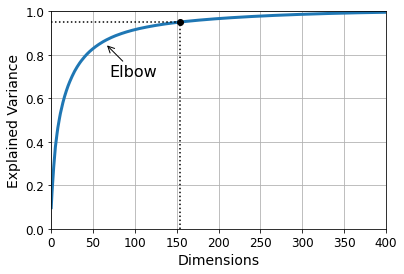

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9504367632276952

---

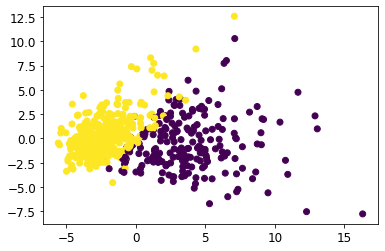

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

from sklearn.preprocessing import StandardScaler

x_ = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x_)

import pandas as pd
import numpy as np
pc_y = np.c_[pc,y]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','diagnosis'])
# df.to_csv("11.csv")

import matplotlib.pyplot as plt
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['diagnosis'])

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import pandas as pd


np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import os

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

axes = [-100, 100, -100, 100, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca2.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

### fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(pca2D[:, 0], pca2D[:, 1], "k+")
ax.plot(pca2D[:, 0], pca2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5,1.3,-1.2,1.2])
ax.grid(True)
save_fig("dataset_2d_plot")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


그림 저장 dataset_2d_plot


<Figure size 432x288 with 0 Axes>

In [ ]:
('/content/images/dim_reduction/dataset_2d_plot.png')

'/content/images/dim_reduction/dataset_2d_plot.png'

In [ ]:

y3 = sp_data['P_sep, psi']
ax3 = ax1.twiny()
ax3.plot(x, y3, color = "blue")
plt.show()

In [ ]:
y5 = sp_data['T_bearing']
ax5 = ax1.twinx()
ax5.plot(x, y5)

In [ ]:
y3 = sp_data['L_sep, in']
ax3 = ax1.twinx()
ax3.plot(x, y3)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['Pdis, psi','Pin, psi', 'Q_l, BPD', 'Q_g, lb/m', 'Acoustic', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs','T_m_suf','T_bearing']
# Separating out the features
x = sp_data.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values
# Standardizing the features
x



In [ ]:
sp_np = np.array(sp)
sp_np.shape

(15190, 26)

In [ ]:
mp

Source.Name  ...  T_winding
0                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.006
1                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.006
2                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.006
3                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.006
4                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.006
...                                                 ...  ...        ...
3207  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     52.517
3208  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     52.894
3209  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     52.814
3210  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     53.224
3211  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     53.318

[3212 rows x 25 columns]

In [ ]:
mp_data = mp[['Source.Name', 'Pdis, psi','Pin, psi', 'Q_l, BPD', 'Q_g, lb/m', 'Acoustic', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs','T_m_suf','T_bearing']]
mp_data
# RPM을 사용해서 Frequency로 정리하는게 도움이 될듯.
# 날짜도 다시 정리해야되나?
# flow rate가 변수로 들어가야되는지는 한번 공부해봐야될듯.
# Acoustic이 가지는 의미가 뭔지?


Source.Name  ...  T_bearing
0                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.007
1                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.007
2                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.007
3                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.007
4                2021_03_18_1966_RPM_MP_1190_BPD_0416pm  ...      0.007
...                                                 ...  ...        ...
3207  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     50.848
3208  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     50.847
3209  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     50.844
3210  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     50.843
3211  2021_08_20_3000_MP_1200BPD_450PSI_8LBPM-100_01...  ...     50.746

[3212 rows x 11 columns]

In [ ]:
sp_data = sp[['Pdis, psi','Pin, psi', 'Q_l, BPD', 'Q_g, lb/m', 'Acoustic', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs','T_m_suf','T_bearing']]
sp_data


Pdis, psi  Pin, psi  Q_l, BPD  ...  V_m gmrs  T_m_suf  T_bearing
0         17.381    -6.022  2607.835  ...     0.005   28.768     45.897
1         17.381    -6.022  2607.835  ...     0.006   28.768     46.000
2         17.304    -6.023  2612.207  ...     0.006   28.765     46.000
3         17.304    -6.023  2612.207  ...     0.005   28.765     46.002
4         17.482    -6.025  2612.454  ...     0.005   28.766     46.002
...          ...       ...       ...  ...       ...      ...        ...
14242    482.424     3.539   491.380  ...     0.009   23.110    197.586
14243    482.356     3.528   491.088  ...     0.009   23.113    197.591
14244    482.545     3.542   491.174  ...     0.009   23.114    197.588
14245    482.434     3.524   491.087  ...     0.009   23.113    197.589
14246    482.907     3.521   491.652  ...     0.010   23.112    197.587

[14247 rows x 10 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['Pdis, psi','Pin, psi', 'Q_l, BPD', 'Q_g, lb/m', 'Acoustic', 'V_in, gmrs', 'V_o, gmrs', 'V_m gmrs','T_m_suf','T_bearing']
# Separating out the features
x = sp_data.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values
# Standardizing the features
x

array([[ 1.738100e+01, -6.022000e+00,  2.607835e+03, ...,  5.000000e-03,
         2.876800e+01,  4.589700e+01],
       [ 1.738100e+01, -6.022000e+00,  2.607835e+03, ...,  6.000000e-03,
         2.876800e+01,  4.600000e+01],
       [ 1.730400e+01, -6.023000e+00,  2.612207e+03, ...,  6.000000e-03,
         2.876500e+01,  4.600000e+01],
       ...,
       [ 4.825450e+02,  3.542000e+00,  4.911740e+02, ...,  9.000000e-03,
         2.311400e+01,  1.975880e+02],
       [ 4.824340e+02,  3.524000e+00,  4.910870e+02, ...,  9.000000e-03,
         2.311300e+01,  1.975890e+02],
       [ 4.829070e+02,  3.521000e+00,  4.916520e+02, ...,  1.000000e-02,
         2.311200e+01,  1.975870e+02]])

In [ ]:
x = StandardScaler().fit_transform(x)
# x_df = pd.DataFrame(x)
# x_df.describe()
x_df = pd.DataFrame(x)
x_df.describe()

0             1  ...             8             9
count  1.424600e+04  1.424600e+04  ...  1.424600e+04  1.424600e+04
mean   1.251616e-15  6.144920e-16  ... -5.971793e-16 -1.492247e-16
std    1.000035e+00  1.000035e+00  ...  1.000035e+00  1.000035e+00
min   -1.587250e+00 -2.830700e+00  ... -4.333142e+00 -1.554039e+00
25%   -1.357639e+00 -1.839397e-01  ... -5.392089e-01 -4.641093e-01
50%    4.434793e-01  4.187542e-01  ...  3.406709e-01 -3.151732e-01
75%    8.317499e-01  6.268958e-01  ...  5.485826e-01  7.392528e-02
max    9.205413e-01  2.195598e+00  ...  2.625873e+00  3.847877e+00

[8 rows x 10 columns]

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2D = pca2.fit_transform(x)
principalDf = pd.DataFrame(data = pca2D, columns = ['principal component 1', 'principal component 2'])
principalDf

ValueError: ignored